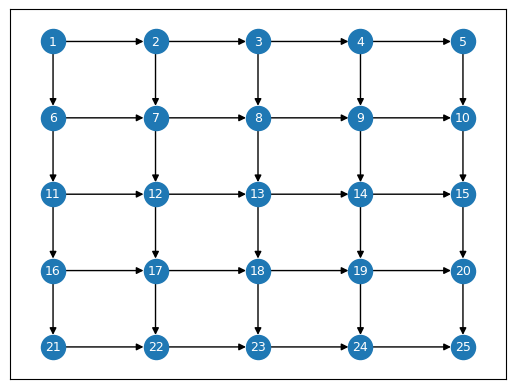

In [ ]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

In [1]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Generate 10000 OD matrix
out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, 'stats_10000_4.pkl')

nb_entries :  0
nb_entries :  1
nb_entries :  2
nb_entries :  3
nb_entries :  4
nb_entries :  5
nb_entries :  6
nb_entries :  7
nb_entries :  8
nb_entries :  9
nb_entries :  10
nb_entries :  11
nb_entries :  12
nb_entries :  13
nb_entries :  14
nb_entries :  15
nb_entries :  16
nb_entries :  17
nb_entries :  18
nb_entries :  19
nb_entries :  20
nb_entries :  21
nb_entries :  22
nb_entries :  23
nb_entries :  24
nb_entries :  25
nb_entries :  26
nb_entries :  27
nb_entries :  28
nb_entries :  29
nb_entries :  30
nb_entries :  31
nb_entries :  32
nb_entries :  33
nb_entries :  34
nb_entries :  35
nb_entries :  36
nb_entries :  37
nb_entries :  38
nb_entries :  39
nb_entries :  40
nb_entries :  41
nb_entries :  42
nb_entries :  43
nb_entries :  44
nb_entries :  45
nb_entries :  46
nb_entries :  47
nb_entries :  48
nb_entries :  49
nb_entries :  50
nb_entries :  51
nb_entries :  52
nb_entries :  53
nb_entries :  54
nb_entries :  55
nb_entries :  56
nb_entries :  57
nb_entries :  58
nb_entr

nb_entries :  728
nb_entries :  729
nb_entries :  730
nb_entries :  731
nb_entries :  732
nb_entries :  733
nb_entries :  734
nb_entries :  735
nb_entries :  736
nb_entries :  737
nb_entries :  738
nb_entries :  739
nb_entries :  740
nb_entries :  741
nb_entries :  742
nb_entries :  743
nb_entries :  744
nb_entries :  745
nb_entries :  746
nb_entries :  747
nb_entries :  748
nb_entries :  749
nb_entries :  750
nb_entries :  751
nb_entries :  752
nb_entries :  753
nb_entries :  754
nb_entries :  755
nb_entries :  756
nb_entries :  757
nb_entries :  758
nb_entries :  759
nb_entries :  760
nb_entries :  761
nb_entries :  762
nb_entries :  763
nb_entries :  764
nb_entries :  765
nb_entries :  766
nb_entries :  767
nb_entries :  768
nb_entries :  769
nb_entries :  770
nb_entries :  771
nb_entries :  772
nb_entries :  773
nb_entries :  774
nb_entries :  775
nb_entries :  776
nb_entries :  777
nb_entries :  778
nb_entries :  779
nb_entries :  780
nb_entries :  781
nb_entries :  782
nb_entries

nb_entries :  1419
nb_entries :  1420
nb_entries :  1421
nb_entries :  1422
nb_entries :  1423
nb_entries :  1424
nb_entries :  1425
nb_entries :  1426
nb_entries :  1427
nb_entries :  1428
nb_entries :  1429
nb_entries :  1430
nb_entries :  1431
nb_entries :  1432
nb_entries :  1433
nb_entries :  1434
nb_entries :  1435
nb_entries :  1436
nb_entries :  1437
nb_entries :  1438
nb_entries :  1439
nb_entries :  1440
nb_entries :  1441
nb_entries :  1442
nb_entries :  1443
nb_entries :  1444
nb_entries :  1445
nb_entries :  1446
nb_entries :  1447
nb_entries :  1448
nb_entries :  1449
nb_entries :  1450
nb_entries :  1451
nb_entries :  1452
nb_entries :  1453
nb_entries :  1454
nb_entries :  1455
nb_entries :  1456
nb_entries :  1457
nb_entries :  1458
nb_entries :  1459
nb_entries :  1460
nb_entries :  1461
nb_entries :  1462
nb_entries :  1463
nb_entries :  1464
nb_entries :  1465
nb_entries :  1466
nb_entries :  1467
nb_entries :  1468
nb_entries :  1469
nb_entries :  1470
nb_entries :

nb_entries :  2221
nb_entries :  2222
nb_entries :  2223
nb_entries :  2224
nb_entries :  2225
nb_entries :  2226
nb_entries :  2227
nb_entries :  2228
nb_entries :  2229
nb_entries :  2230
nb_entries :  2231
nb_entries :  2232
nb_entries :  2233
nb_entries :  2234
nb_entries :  2235
nb_entries :  2236
nb_entries :  2237
nb_entries :  2238
nb_entries :  2239
nb_entries :  2240
nb_entries :  2241
nb_entries :  2242
nb_entries :  2243
nb_entries :  2244
nb_entries :  2245
nb_entries :  2246
nb_entries :  2247
nb_entries :  2248
nb_entries :  2249
nb_entries :  2250
nb_entries :  2251
nb_entries :  2252
nb_entries :  2253
nb_entries :  2254
nb_entries :  2255
nb_entries :  2256
nb_entries :  2257
nb_entries :  2258
nb_entries :  2259
nb_entries :  2260
nb_entries :  2261
nb_entries :  2262
nb_entries :  2263
nb_entries :  2264
nb_entries :  2265
nb_entries :  2266
nb_entries :  2267
nb_entries :  2268
nb_entries :  2269
nb_entries :  2270
nb_entries :  2271
nb_entries :  2272
nb_entries :

nb_entries :  2971
nb_entries :  2972
nb_entries :  2973
nb_entries :  2974
nb_entries :  2975
nb_entries :  2976
nb_entries :  2977
nb_entries :  2978
nb_entries :  2979
nb_entries :  2980
nb_entries :  2981
nb_entries :  2982
nb_entries :  2983
nb_entries :  2984
nb_entries :  2985
nb_entries :  2986
nb_entries :  2987
nb_entries :  2988
nb_entries :  2989
nb_entries :  2990
nb_entries :  2991
nb_entries :  2992
nb_entries :  2993
nb_entries :  2994
nb_entries :  2995
nb_entries :  2996
nb_entries :  2997
nb_entries :  2998
nb_entries :  2999
nb_entries :  3000
nb_entries :  3001
nb_entries :  3002
nb_entries :  3003
nb_entries :  3004
nb_entries :  3005
nb_entries :  3006
nb_entries :  3007
nb_entries :  3008
nb_entries :  3009
nb_entries :  3010
nb_entries :  3011
nb_entries :  3012
nb_entries :  3013
nb_entries :  3014
nb_entries :  3015
nb_entries :  3016
nb_entries :  3017
nb_entries :  3018
nb_entries :  3019
nb_entries :  3020
nb_entries :  3021
nb_entries :  3022
nb_entries :

nb_entries :  3746
nb_entries :  3747
nb_entries :  3748
nb_entries :  3749
nb_entries :  3750
nb_entries :  3751
nb_entries :  3752
nb_entries :  3753
nb_entries :  3754
nb_entries :  3755
nb_entries :  3756
nb_entries :  3757
nb_entries :  3758
nb_entries :  3759
nb_entries :  3760
nb_entries :  3761
nb_entries :  3762
nb_entries :  3763
nb_entries :  3764
nb_entries :  3765
nb_entries :  3766
nb_entries :  3767
nb_entries :  3768
nb_entries :  3769
nb_entries :  3770
nb_entries :  3771
nb_entries :  3772
nb_entries :  3773
nb_entries :  3774
nb_entries :  3775
nb_entries :  3776
nb_entries :  3777
nb_entries :  3778
nb_entries :  3779
nb_entries :  3780
nb_entries :  3781
nb_entries :  3782
nb_entries :  3783
nb_entries :  3784
nb_entries :  3785
nb_entries :  3786
nb_entries :  3787
nb_entries :  3788
nb_entries :  3789
nb_entries :  3790
nb_entries :  3791
nb_entries :  3792
nb_entries :  3793
nb_entries :  3794
nb_entries :  3795
nb_entries :  3796
nb_entries :  3797
nb_entries :

nb_entries :  4188
nb_entries :  4189
nb_entries :  4190
nb_entries :  4191
nb_entries :  4192
nb_entries :  4193
nb_entries :  4194
nb_entries :  4195
nb_entries :  4196
nb_entries :  4197
nb_entries :  4198
nb_entries :  4199
nb_entries :  4200
nb_entries :  4201
nb_entries :  4202
nb_entries :  4203
nb_entries :  4204
nb_entries :  4205
nb_entries :  4206
nb_entries :  4207
nb_entries :  4208
nb_entries :  4209
nb_entries :  4210
nb_entries :  4211
nb_entries :  4212
nb_entries :  4213
nb_entries :  4214
nb_entries :  4215
nb_entries :  4216
nb_entries :  4217
nb_entries :  4218
nb_entries :  4219
nb_entries :  4220
nb_entries :  4221
nb_entries :  4222
nb_entries :  4223
nb_entries :  4224
nb_entries :  4225
nb_entries :  4226
nb_entries :  4227
nb_entries :  4228
nb_entries :  4229
nb_entries :  4230
nb_entries :  4231
nb_entries :  4232
nb_entries :  4233
nb_entries :  4234
nb_entries :  4235
nb_entries :  4236
nb_entries :  4237
nb_entries :  4238
nb_entries :  4239
nb_entries :

nb_entries :  5000
nb_entries :  5001
nb_entries :  5002
nb_entries :  5003
nb_entries :  5004
nb_entries :  5005
nb_entries :  5006
nb_entries :  5007
nb_entries :  5008
nb_entries :  5009
nb_entries :  5010
nb_entries :  5011
nb_entries :  5012
nb_entries :  5013
nb_entries :  5014
nb_entries :  5015
nb_entries :  5016
nb_entries :  5017
nb_entries :  5018
nb_entries :  5019
nb_entries :  5020
nb_entries :  5021
nb_entries :  5022
nb_entries :  5023
nb_entries :  5024
nb_entries :  5025
nb_entries :  5026
nb_entries :  5027
nb_entries :  5028
nb_entries :  5029
nb_entries :  5030
nb_entries :  5031
nb_entries :  5032
nb_entries :  5033
nb_entries :  5034
nb_entries :  5035
nb_entries :  5036
nb_entries :  5037
nb_entries :  5038
nb_entries :  5039
nb_entries :  5040
nb_entries :  5041
nb_entries :  5042
nb_entries :  5043
nb_entries :  5044
nb_entries :  5045
nb_entries :  5046
nb_entries :  5047
nb_entries :  5048
nb_entries :  5049
nb_entries :  5050
nb_entries :  5051
nb_entries :

nb_entries :  5789
nb_entries :  5790
nb_entries :  5791
nb_entries :  5792
nb_entries :  5793
nb_entries :  5794
nb_entries :  5795
nb_entries :  5796
nb_entries :  5797
nb_entries :  5798
nb_entries :  5799
nb_entries :  5800
nb_entries :  5801
nb_entries :  5802
nb_entries :  5803
nb_entries :  5804
nb_entries :  5805
nb_entries :  5806
nb_entries :  5807
nb_entries :  5808
nb_entries :  5809
nb_entries :  5810
nb_entries :  5811
nb_entries :  5812
nb_entries :  5813
nb_entries :  5814
nb_entries :  5815
nb_entries :  5816
nb_entries :  5817
nb_entries :  5818
nb_entries :  5819
nb_entries :  5820
nb_entries :  5821
nb_entries :  5822
nb_entries :  5823
nb_entries :  5824
nb_entries :  5825
nb_entries :  5826
nb_entries :  5827
nb_entries :  5828
nb_entries :  5829
nb_entries :  5830
nb_entries :  5831
nb_entries :  5832
nb_entries :  5833
nb_entries :  5834
nb_entries :  5835
nb_entries :  5836
nb_entries :  5837
nb_entries :  5838
nb_entries :  5839
nb_entries :  5840
nb_entries :

nb_entries :  6229
nb_entries :  6230
nb_entries :  6231
nb_entries :  6232
nb_entries :  6233
nb_entries :  6234
nb_entries :  6235
nb_entries :  6236
nb_entries :  6237
nb_entries :  6238
nb_entries :  6239
nb_entries :  6240
nb_entries :  6241
nb_entries :  6242
nb_entries :  6243
nb_entries :  6244
nb_entries :  6245
nb_entries :  6246
nb_entries :  6247
nb_entries :  6248
nb_entries :  6249
nb_entries :  6250
nb_entries :  6251
nb_entries :  6252
nb_entries :  6253
nb_entries :  6254
nb_entries :  6255
nb_entries :  6256
nb_entries :  6257
nb_entries :  6258
nb_entries :  6259
nb_entries :  6260
nb_entries :  6261
nb_entries :  6262
nb_entries :  6263
nb_entries :  6264
nb_entries :  6265
nb_entries :  6266
nb_entries :  6267
nb_entries :  6268
nb_entries :  6269
nb_entries :  6270
nb_entries :  6271
nb_entries :  6272
nb_entries :  6273
nb_entries :  6274
nb_entries :  6275
nb_entries :  6276
nb_entries :  6277
nb_entries :  6278
nb_entries :  6279
nb_entries :  6280
nb_entries :

nb_entries :  7066
nb_entries :  7067
nb_entries :  7068
nb_entries :  7069
nb_entries :  7070
nb_entries :  7071
nb_entries :  7072
nb_entries :  7073
nb_entries :  7074
nb_entries :  7075
nb_entries :  7076
nb_entries :  7077
nb_entries :  7078
nb_entries :  7079
nb_entries :  7080
nb_entries :  7081
nb_entries :  7082
nb_entries :  7083
nb_entries :  7084
nb_entries :  7085
nb_entries :  7086
nb_entries :  7087
nb_entries :  7088
nb_entries :  7089
nb_entries :  7090
nb_entries :  7091
nb_entries :  7092
nb_entries :  7093
nb_entries :  7094
nb_entries :  7095
nb_entries :  7096
nb_entries :  7097
nb_entries :  7098
nb_entries :  7099
nb_entries :  7100
nb_entries :  7101
nb_entries :  7102
nb_entries :  7103
nb_entries :  7104
nb_entries :  7105
nb_entries :  7106
nb_entries :  7107
nb_entries :  7108
nb_entries :  7109
nb_entries :  7110
nb_entries :  7111
nb_entries :  7112
nb_entries :  7113
nb_entries :  7114
nb_entries :  7115
nb_entries :  7116
nb_entries :  7117
nb_entries :

nb_entries :  7504
nb_entries :  7505
nb_entries :  7506
nb_entries :  7507
nb_entries :  7508
nb_entries :  7509
nb_entries :  7510
nb_entries :  7511
nb_entries :  7512
nb_entries :  7513
nb_entries :  7514
nb_entries :  7515
nb_entries :  7516
nb_entries :  7517
nb_entries :  7518
nb_entries :  7519
nb_entries :  7520
nb_entries :  7521
nb_entries :  7522
nb_entries :  7523
nb_entries :  7524
nb_entries :  7525
nb_entries :  7526
nb_entries :  7527
nb_entries :  7528
nb_entries :  7529
nb_entries :  7530
nb_entries :  7531
nb_entries :  7532
nb_entries :  7533
nb_entries :  7534
nb_entries :  7535
nb_entries :  7536
nb_entries :  7537
nb_entries :  7538
nb_entries :  7539
nb_entries :  7540
nb_entries :  7541
nb_entries :  7542
nb_entries :  7543
nb_entries :  7544
nb_entries :  7545
nb_entries :  7546
nb_entries :  7547
nb_entries :  7548
nb_entries :  7549
nb_entries :  7550
nb_entries :  7551
nb_entries :  7552
nb_entries :  7553
nb_entries :  7554
nb_entries :  7555
nb_entries :

nb_entries :  7938
nb_entries :  7939
nb_entries :  7940
nb_entries :  7941
nb_entries :  7942
nb_entries :  7943
nb_entries :  7944
nb_entries :  7945
nb_entries :  7946
nb_entries :  7947
nb_entries :  7948
nb_entries :  7949
nb_entries :  7950
nb_entries :  7951
nb_entries :  7952
nb_entries :  7953
nb_entries :  7954
nb_entries :  7955
nb_entries :  7956
nb_entries :  7957
nb_entries :  7958
nb_entries :  7959
nb_entries :  7960
nb_entries :  7961
nb_entries :  7962
nb_entries :  7963
nb_entries :  7964
nb_entries :  7965
nb_entries :  7966
nb_entries :  7967
nb_entries :  7968
nb_entries :  7969
nb_entries :  7970
nb_entries :  7971
nb_entries :  7972
nb_entries :  7973
nb_entries :  7974
nb_entries :  7975
nb_entries :  7976
nb_entries :  7977
nb_entries :  7978
nb_entries :  7979
nb_entries :  7980
nb_entries :  7981
nb_entries :  7982
nb_entries :  7983
nb_entries :  7984
nb_entries :  7985
nb_entries :  7986
nb_entries :  7987
nb_entries :  7988
nb_entries :  7989
nb_entries :

nb_entries :  8377
nb_entries :  8378
nb_entries :  8379
nb_entries :  8380
nb_entries :  8381
nb_entries :  8382
nb_entries :  8383
nb_entries :  8384
nb_entries :  8385
nb_entries :  8386
nb_entries :  8387
nb_entries :  8388
nb_entries :  8389
nb_entries :  8390
nb_entries :  8391
nb_entries :  8392
nb_entries :  8393
nb_entries :  8394
nb_entries :  8395
nb_entries :  8396
nb_entries :  8397
nb_entries :  8398
nb_entries :  8399
nb_entries :  8400
nb_entries :  8401
nb_entries :  8402
nb_entries :  8403
nb_entries :  8404
nb_entries :  8405
nb_entries :  8406
nb_entries :  8407
nb_entries :  8408
nb_entries :  8409
nb_entries :  8410
nb_entries :  8411
nb_entries :  8412
nb_entries :  8413
nb_entries :  8414
nb_entries :  8415
nb_entries :  8416
nb_entries :  8417
nb_entries :  8418
nb_entries :  8419
nb_entries :  8420
nb_entries :  8421
nb_entries :  8422
nb_entries :  8423
nb_entries :  8424
nb_entries :  8425
nb_entries :  8426
nb_entries :  8427
nb_entries :  8428
nb_entries :

nb_entries :  9193
nb_entries :  9194
nb_entries :  9195
nb_entries :  9196
nb_entries :  9197
nb_entries :  9198
nb_entries :  9199
nb_entries :  9200
nb_entries :  9201
nb_entries :  9202
nb_entries :  9203
nb_entries :  9204
nb_entries :  9205
nb_entries :  9206
nb_entries :  9207
nb_entries :  9208
nb_entries :  9209
nb_entries :  9210
nb_entries :  9211
nb_entries :  9212
nb_entries :  9213
nb_entries :  9214
nb_entries :  9215
nb_entries :  9216
nb_entries :  9217
nb_entries :  9218
nb_entries :  9219
nb_entries :  9220
nb_entries :  9221
nb_entries :  9222
nb_entries :  9223
nb_entries :  9224
nb_entries :  9225
nb_entries :  9226
nb_entries :  9227
nb_entries :  9228
nb_entries :  9229
nb_entries :  9230
nb_entries :  9231
nb_entries :  9232
nb_entries :  9233
nb_entries :  9234
nb_entries :  9235
nb_entries :  9236
nb_entries :  9237
nb_entries :  9238
nb_entries :  9239
nb_entries :  9240
nb_entries :  9241
nb_entries :  9242
nb_entries :  9243
nb_entries :  9244
nb_entries :

## Fusion of files

In [16]:
import pickle

output4 = {}
for i in range(1, 5):
    with open(f"stats_10000_{i}.pkl", "rb") as file:
        output = pickle.load(file)
        file.close()
    output4 = fuse_stats(output4, output)

    S = 0
    for k,v in output.items() :
        S = S + len(v)
    print("-------", i, ":")
    print("Number of matrix: ", len(output))
    print("Number of OD pairs: ", S)


S = 0
for k,v in output4.items() :
    S = S + len(v)
print("-------Combined:")
print("Number of matrix: ", len(output4))
print("Number of OD pairs: ", S)

------- 1 :
Number of matrix:  385
Number of OD pairs:  10000
------- 2 :
Number of matrix:  385
Number of OD pairs:  10000
------- 3 :
Number of matrix:  385
Number of OD pairs:  10000
------- 4 :
Number of matrix:  385
Number of OD pairs:  10000
-------Combined:
Number of matrix:  385
Number of OD pairs:  40000


In [14]:
# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

## Flow network : Solving

This function extracts information of the network, including a set of 25 nodes and 80 links between nodes, capacity of each link, alpha, beta (of BPR function), link length

In [1]:
%run utils.py

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Network_5_5.tntp')
Network

,~,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,;,link_id
0,NaN,1,2,2000,40,0.6,0.15,4,60,0,0,;,0
1,NaN,2,1,2000,40,0.6,0.15,4,60,0,0,;,1
2,NaN,1,6,2000,40,0.6,0.15,4,60,0,0,;,2
3,NaN,6,1,2000,40,0.6,0.15,4,60,0,0,;,3
4,NaN,2,3,2000,40,0.6,0.15,4,60,0,0,;,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,23,22,2000,40,0.6,0.15,4,60,0,0,;,75
76,NaN,23,24,2000,40,0.6,0.15,4,60,0,0,;,76
77,NaN,24,23,2000,40,0.6,0.15,4,60,0,0,;,77
78,NaN,24,25,2000,40,0.6,0.15,4,60,0,0,;,78


In [ ]:
#  print(len(stats.values())) # 385 matrix (val), each matrix has difference number of sub-matrix,
# each sub-matrix has difference number of OD pairs
for val in stats.values() :
    # print(val[0]) # print matrix 1 
    for OD_matrix in val: 
        print(len(OD_matrix))
        # print(len(OD_matrix))
        print(OD_matrix.keys())

In [2]:
a_file = open('stats_40000_1.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

time = 0

# print(len(stats.values())) # 385 matrix (val), each matrix has difference number of sub-matrix,
# each sub-matrix has difference number of OD pairs
for val in stats.values() :
    for OD_matrix in val :
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status == 2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("Output/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

0
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-10
model solved in: 0.1673567295074463
1
model solved in: 0.14594268798828125
2
model solved in: 0.14400053024291992
3
model solved in: 0.1399998664855957
4
model solved in: 0.14254450798034668
5
model solved in: 0.14800095558166504
6
model solved in: 0.14007306098937988
7
model solved in: 0.14464402198791504
8
model solved in: 0.14273619651794434
9
model solved in: 0.14042234420776367
10
model solved in: 0.1400001049041748
11
model solved in: 0.14086699485778809
12
model solved in: 0.1400008201599121
13
model solved in: 0.1464371681213379
14
model solved in: 0.1400008201599121
15
model solved in: 0.140000581741333
16
model solved in: 0.1426093578338623
17
model solved in: 0.140000581741333
18
model solved in: 0.1400008201599121
19
model solved in: 0.1400010585784912
20
model solved in: 0.14400100708007812
21
model solved in: 0.14400005340576172
22
model solved in: 0.1400008201599121
23
model solv

model solved in: 0.13393211364746094
204
model solved in: 0.15093326568603516
205
model solved in: 0.1360006332397461
206
model solved in: 0.13497018814086914
207
model solved in: 0.1350407600402832
208
model solved in: 0.1349327564239502
209
model solved in: 0.13481974601745605
210
model solved in: 0.13174009323120117
211
model solved in: 0.1350874900817871
212
model solved in: 0.1347646713256836
213
model solved in: 0.13458633422851562
214
model solved in: 0.13431859016418457
215
model solved in: 0.1331949234008789
216
model solved in: 0.13672304153442383
217
model solved in: 0.13603973388671875
218
model solved in: 0.1433858871459961
219
model solved in: 0.13603448867797852
220
model solved in: 0.1333777904510498
221
model solved in: 0.13703298568725586
222
model solved in: 0.13700032234191895
223
model solved in: 0.13199949264526367
224
model solved in: 0.13399982452392578
225
model solved in: 0.13599610328674316
226
model solved in: 0.13500022888183594
227
model solved in: 0.15500

model solved in: 0.13499999046325684
406
model solved in: 0.14100027084350586
407
model solved in: 0.13500022888183594
408
model solved in: 0.14296936988830566
409
model solved in: 0.14899539947509766
410
model solved in: 0.13799428939819336
411
model solved in: 0.14062213897705078
412
model solved in: 0.1386559009552002
413
model solved in: 0.13337063789367676
414
model solved in: 0.14112186431884766
415
model solved in: 0.1424274444580078
416
model solved in: 0.15984725952148438
417
model solved in: 0.13940906524658203
418
model solved in: 0.21029901504516602
419
model solved in: 0.22950959205627441
420
model solved in: 0.25382184982299805
421
model solved in: 0.13706088066101074
422
model solved in: 0.136000394821167
423
model solved in: 0.13868308067321777
424
model solved in: 0.13244223594665527
425
model solved in: 0.14264154434204102
426
model solved in: 0.14735746383666992
427
model solved in: 0.25542593002319336
428
model solved in: 0.27697181701660156
429
model solved in: 0.1

model solved in: 0.14048528671264648
608
model solved in: 0.1412508487701416
609
model solved in: 0.13679146766662598
610
model solved in: 0.14269423484802246
611
model solved in: 0.14048027992248535
612
model solved in: 0.14992928504943848
613
model solved in: 0.13867640495300293
614
model solved in: 0.14040207862854004
615
model solved in: 0.13867402076721191
616
model solved in: 0.16229891777038574
617
model solved in: 0.13862037658691406
618
model solved in: 0.1331923007965088
619
model solved in: 0.13325238227844238
620
model solved in: 0.13066649436950684
621
model solved in: 0.13848090171813965
622
model solved in: 0.13270902633666992
623
model solved in: 0.13244915008544922
624
model solved in: 0.13065409660339355
625
model solved in: 0.1312732696533203
626
model solved in: 0.13369345664978027
627
model solved in: 0.13287997245788574
628
model solved in: 0.14541292190551758
629
model solved in: 0.13394713401794434
630
model solved in: 0.13466668128967285
631
model solved in: 0.

model solved in: 0.14499425888061523
810
model solved in: 0.14138484001159668
811
model solved in: 0.14858412742614746
812
model solved in: 0.1388096809387207
813
model solved in: 0.14084506034851074
814
model solved in: 0.14327573776245117
815
model solved in: 0.16061949729919434
816
model solved in: 0.1407618522644043
817
model solved in: 0.13988518714904785
818
model solved in: 0.1404566764831543
819
model solved in: 0.14012813568115234
820
model solved in: 0.13606882095336914
821
model solved in: 0.1365373134613037
822
model solved in: 0.13211512565612793
823
model solved in: 0.1361682415008545
824
model solved in: 0.1361067295074463
825
model solved in: 0.14416050910949707
826
model solved in: 0.13652396202087402
827
model solved in: 0.14017224311828613
828
model solved in: 0.1321268081665039
829
model solved in: 0.14012455940246582
830
model solved in: 0.15042424201965332
831
model solved in: 0.13611865043640137
832
model solved in: 0.1411125659942627
833
model solved in: 0.13970

model solved in: 0.1324462890625
1012
model solved in: 0.14485573768615723
1013
model solved in: 0.13510370254516602
1014
model solved in: 0.13469934463500977
1015
model solved in: 0.13646483421325684
1016
model solved in: 0.13644909858703613
1017
model solved in: 0.14261937141418457
1018
model solved in: 0.13286709785461426
1019
model solved in: 0.13789725303649902
1020
model solved in: 0.1348109245300293
1021
model solved in: 0.13661932945251465
1022
model solved in: 0.1548311710357666
1023
model solved in: 0.1382429599761963
1024
model solved in: 0.13718175888061523
1025
model solved in: 0.13450312614440918
1026
model solved in: 0.13242292404174805
1027
model solved in: 0.14841198921203613
1028
model solved in: 0.1350710391998291
1029
model solved in: 0.17599272727966309
1030
model solved in: 0.17105317115783691
1031
model solved in: 0.13903164863586426
1032
model solved in: 0.1400010585784912
1033
model solved in: 0.15603065490722656
1034
model solved in: 0.1529982089996338
1035
mo

model solved in: 0.13500046730041504
1209
model solved in: 0.14275693893432617
1210
model solved in: 0.1400001049041748
1211
model solved in: 0.136000394821167
1212
model solved in: 0.13892388343811035
1213
model solved in: 0.13991165161132812
1214
model solved in: 0.14034128189086914
1215
model solved in: 0.13414907455444336
1216
model solved in: 0.1366133689880371
1217
model solved in: 0.14255499839782715
1218
model solved in: 0.15796875953674316
1219
model solved in: 0.1420001983642578
1220
model solved in: 0.13996601104736328
1221
model solved in: 0.23108243942260742
1222
model solved in: 0.1380000114440918
1223
model solved in: 0.14100074768066406
1224
model solved in: 0.13599872589111328
1225
model solved in: 0.14599943161010742
1226
model solved in: 0.1549975872039795
1227
model solved in: 0.1439990997314453
1228
model solved in: 0.14099860191345215
1229
model solved in: 0.13899922370910645
1230
model solved in: 0.13599944114685059
1231
model solved in: 0.13700056076049805
1232


model solved in: 0.17003083229064941
1406
model solved in: 0.14888715744018555
1407
model solved in: 0.14400029182434082
1408
model solved in: 0.1419985294342041
1409
model solved in: 0.14200139045715332
1410
model solved in: 0.13899946212768555
1411
model solved in: 0.13700008392333984
1412
model solved in: 0.1459968090057373
1413
model solved in: 0.15303969383239746
1414
model solved in: 0.14600014686584473
1415
model solved in: 0.1420433521270752
1416
model solved in: 0.1569690704345703
1417
model solved in: 0.14799857139587402
1418
model solved in: 0.1409897804260254
1419
model solved in: 0.14014196395874023
1420
model solved in: 0.15864944458007812
1421
model solved in: 0.1604917049407959
1422
model solved in: 0.13599777221679688
1423
model solved in: 0.1370983123779297
1424
model solved in: 0.15289831161499023
1425
model solved in: 0.13520002365112305
1426
model solved in: 0.1399986743927002
1427
model solved in: 0.1360001564025879
1428
model solved in: 0.1380000114440918
1429
mo

model solved in: 0.14400053024291992
1603
model solved in: 0.136000394821167
1604
model solved in: 0.13200139999389648
1605
model solved in: 0.13200020790100098
1606
model solved in: 0.1400010585784912
1607
model solved in: 0.1360006332397461
1608
model solved in: 0.13200068473815918
1609
model solved in: 0.1360008716583252
1610
model solved in: 0.13200044631958008
1611
model solved in: 0.15468811988830566
1612
model solved in: 0.15686511993408203
1613
model solved in: 0.136000394821167
1614
model solved in: 0.1360006332397461
1615
model solved in: 0.136000394821167
1616
model solved in: 0.14400076866149902
1617
model solved in: 0.13199949264526367
1618
model solved in: 0.13200068473815918
1619
model solved in: 0.13200139999389648
1620
model solved in: 0.13657498359680176
1621
model solved in: 0.1359996795654297
1622
model solved in: 0.13399982452392578
1623
model solved in: 0.13400006294250488
1624
model solved in: 0.13499975204467773
1625
model solved in: 0.13499951362609863
1626
mod

model solved in: 0.1315479278564453
1800
model solved in: 0.13506627082824707
1801
model solved in: 0.1363980770111084
1802
model solved in: 0.13437581062316895
1803
model solved in: 0.13453125953674316
1804
model solved in: 0.13025450706481934
1805
model solved in: 0.1328263282775879
1806
model solved in: 0.13156723976135254
1807
model solved in: 0.13225626945495605
1808
model solved in: 0.13755369186401367
1809
model solved in: 0.13106203079223633
1810
model solved in: 0.13200020790100098
1811
model solved in: 0.13300061225891113
1812
model solved in: 0.1329975128173828
1813
model solved in: 0.13300013542175293
1814
model solved in: 0.133009672164917
1815
model solved in: 0.13399863243103027
1816
model solved in: 0.13299989700317383
1817
model solved in: 0.13299989700317383
1818
model solved in: 0.1340007781982422
1819
model solved in: 0.13746261596679688
1820
model solved in: 0.13654613494873047
1821
model solved in: 0.1360008716583252
1822
model solved in: 0.13200020790100098
1823


model solved in: 0.13136672973632812
1997
model solved in: 0.13247179985046387
1998
model solved in: 0.13200163841247559
1999
model solved in: 0.1312406063079834
2000
model solved in: 0.15277743339538574
2001
model solved in: 0.13236618041992188
2002
model solved in: 0.13199996948242188
2003
model solved in: 0.13291430473327637
2004
model solved in: 0.1331160068511963
2005
model solved in: 0.13200044631958008
2006
model solved in: 0.13701701164245605
2007
model solved in: 0.13200020790100098
2008
model solved in: 0.1344435214996338
2009
model solved in: 0.1348111629486084
2010
model solved in: 0.13266682624816895
2011
model solved in: 0.13212060928344727
2012
model solved in: 0.1324458122253418
2013
model solved in: 0.1365044116973877
2014
model solved in: 0.14854955673217773
2015
model solved in: 0.13048624992370605
2016
model solved in: 0.13200044631958008
2017
model solved in: 0.13200020790100098
2018
model solved in: 0.13500022888183594
2019
model solved in: 0.1314547061920166
2020

model solved in: 0.13199996948242188
2195
model solved in: 0.1514146327972412
2196
model solved in: 0.136000394821167
2197
model solved in: 0.1400003433227539
2198
model solved in: 0.1360001564025879
2199
model solved in: 0.13200044631958008
2200
model solved in: 0.1360006332397461
2201
model solved in: 0.13200044631958008
2202
model solved in: 0.13200116157531738
2203
model solved in: 0.1360006332397461
2204
model solved in: 0.1360008716583252
2205
model solved in: 0.13200020790100098
2206
model solved in: 0.1360011100769043
2207
model solved in: 0.1360011100769043
2208
model solved in: 0.136810302734375
2209
model solved in: 0.1390392780303955
2210
model solved in: 0.13599944114685059
2211
model solved in: 0.13499951362609863
2212
model solved in: 0.13499951362609863
2213
model solved in: 0.13400006294250488
2214
model solved in: 0.13899993896484375
2215
model solved in: 0.1360006332397461
2216
model solved in: 0.13499975204467773
2217
model solved in: 0.1340034008026123
2218
model s

model solved in: 0.13806366920471191
2393
model solved in: 0.1380903720855713
2394
model solved in: 0.13395404815673828
2395
model solved in: 0.15045452117919922
2396
model solved in: 0.13486671447753906
2397
model solved in: 0.13476014137268066
2398
model solved in: 0.1342763900756836
2399
model solved in: 0.13745737075805664
2400
model solved in: 0.1363990306854248
2401
model solved in: 0.1562943458557129
2402
model solved in: 0.13481521606445312
2403
model solved in: 0.13486218452453613
2404
model solved in: 0.14193105697631836
2405
model solved in: 0.13367342948913574
2406
model solved in: 0.13687396049499512
2407
model solved in: 0.13497281074523926
2408
model solved in: 0.13284921646118164
2409
model solved in: 0.13433194160461426
2410
model solved in: 0.13489770889282227
2411
model solved in: 0.13962173461914062
2412
model solved in: 0.140427827835083
2413
model solved in: 0.13659358024597168
2414
model solved in: 0.13549280166625977
2415
model solved in: 0.13513755798339844
241

model solved in: 0.13507461547851562
2590
model solved in: 0.153045654296875
2591
model solved in: 0.16275525093078613
2592
model solved in: 0.13196587562561035
2593
model solved in: 0.13617253303527832
2594
model solved in: 0.1584153175354004
2595
model solved in: 0.13152408599853516
2596
model solved in: 0.13035821914672852
2597
model solved in: 0.13649964332580566
2598
model solved in: 0.13450288772583008
2599
model solved in: 0.1304795742034912
2600
model solved in: 0.13181352615356445
2601
model solved in: 0.15996766090393066
2602
model solved in: 0.13499903678894043
2603
model solved in: 0.13200163841247559
2604
model solved in: 0.14499735832214355
2605
model solved in: 0.20566749572753906
2606
model solved in: 0.14298224449157715
2607
model solved in: 0.1602797508239746
2608
model solved in: 0.1380000114440918
2609
model solved in: 0.17503929138183594
2610
model solved in: 0.1360001564025879
2611
model solved in: 0.1379992961883545
2612
model solved in: 0.1399979591369629
2613
m

model solved in: 0.14818120002746582
2787
model solved in: 0.13299894332885742
2788
model solved in: 0.15439486503601074
2789
model solved in: 0.21899890899658203
2790
model solved in: 0.2598240375518799
2791
model solved in: 0.18572640419006348
2792
model solved in: 0.14046192169189453
2793
model solved in: 0.14925575256347656
2794
model solved in: 0.1404736042022705
2795
model solved in: 0.13899898529052734
2796
model solved in: 0.13999152183532715
2797
model solved in: 0.1448657512664795
2798
model solved in: 0.13240814208984375
2799
model solved in: 0.13439297676086426
2800
model solved in: 0.13545465469360352
2801
model solved in: 0.14220905303955078
2802
model solved in: 0.1474747657775879
2803
model solved in: 0.13060903549194336
2804
model solved in: 0.1327378749847412
2805
model solved in: 0.21417570114135742
2806
model solved in: 0.14410853385925293
2807
model solved in: 0.1464221477508545
2808
model solved in: 0.13639259338378906
2809
model solved in: 0.1409130096435547
2810

model solved in: 0.1399998664855957
2984
model solved in: 0.13999533653259277
2985
model solved in: 0.13299965858459473
2986
model solved in: 0.13200759887695312
2987
model solved in: 0.13199901580810547
2988
model solved in: 0.13299155235290527
2989
model solved in: 0.13299846649169922
2990
model solved in: 0.13458776473999023
2991
model solved in: 0.13285350799560547
2992
model solved in: 0.13461065292358398
2993
model solved in: 0.13301801681518555
2994
model solved in: 0.13450384140014648
2995
model solved in: 0.1565706729888916
2996
model solved in: 0.13699913024902344
2997
model solved in: 0.13499760627746582
2998
model solved in: 0.13499951362609863
2999
model solved in: 0.13700366020202637
3000
model solved in: 0.1349961757659912
3001
model solved in: 0.13758111000061035
3002
model solved in: 0.13911056518554688
3003
model solved in: 0.13687634468078613
3004
model solved in: 0.1346759796142578
3005
model solved in: 0.13461613655090332
3006
model solved in: 0.14049053192138672
3

model solved in: 0.1362476348876953
3181
model solved in: 0.13606524467468262
3182
model solved in: 0.13857221603393555
3183
model solved in: 0.1373434066772461
3184
model solved in: 0.13817763328552246
3185
model solved in: 0.1354048252105713
3186
model solved in: 0.146867036819458
3187
model solved in: 0.13924026489257812
3188
model solved in: 0.135117769241333
3189
model solved in: 0.1385819911956787
3190
model solved in: 0.1437845230102539
3191
model solved in: 0.1403520107269287
3192
model solved in: 0.13817429542541504
3193
model solved in: 0.136322021484375
3194
model solved in: 0.13825392723083496
3195
model solved in: 0.1323099136352539
3196
model solved in: 0.13651251792907715
3197
model solved in: 0.13488030433654785
3198
model solved in: 0.13862133026123047
3199
model solved in: 0.13506555557250977
3200
model solved in: 0.1355586051940918
3201
model solved in: 0.13698148727416992
3202
model solved in: 0.13683795928955078
3203
model solved in: 0.1380760669708252
3204
model s

model solved in: 0.14139580726623535
3378
model solved in: 0.13535284996032715
3379
model solved in: 0.1345357894897461
3380
model solved in: 0.1324329376220703
3381
model solved in: 0.1360006332397461
3382
model solved in: 0.13272619247436523
3383
model solved in: 0.13200020790100098
3384
model solved in: 0.13252925872802734
3385
model solved in: 0.14800119400024414
3386
model solved in: 0.1360001564025879
3387
model solved in: 0.1350088119506836
3388
model solved in: 0.13252997398376465
3389
model solved in: 0.1360006332397461
3390
model solved in: 0.14009356498718262
3391
model solved in: 0.13598179817199707
3392
model solved in: 0.136000394821167
3393
model solved in: 0.1360008716583252
3394
model solved in: 0.13451266288757324
3395
model solved in: 0.13199996948242188
3396
model solved in: 0.1360006332397461
3397
model solved in: 0.13687372207641602
3398
model solved in: 0.136000394821167
3399
model solved in: 0.1360008716583252
3400
model solved in: 0.13200163841247559
3401
model

model solved in: 0.13801932334899902
3576
model solved in: 0.15517926216125488
3577
model solved in: 0.13447237014770508
3578
model solved in: 0.1369493007659912
3579
model solved in: 0.13900089263916016
3580
model solved in: 0.1420001983642578
3581
model solved in: 0.1359996795654297
3582
model solved in: 0.13896608352661133
3583
model solved in: 0.13799738883972168
3584
model solved in: 0.14600849151611328
3585
model solved in: 0.1399693489074707
3586
model solved in: 0.1549665927886963
3587
model solved in: 0.14099955558776855
3588
model solved in: 0.1400001049041748
3589
model solved in: 0.13899970054626465
3590
model solved in: 0.13799810409545898
3591
model solved in: 0.13799738883972168
3592
model solved in: 0.13599944114685059
3593
model solved in: 0.1369953155517578
3594
model solved in: 0.13899993896484375
3595
model solved in: 0.14299941062927246
3596
model solved in: 0.1610400676727295
3597
model solved in: 0.13699984550476074
3598
model solved in: 0.14499926567077637
3599


model solved in: 0.13921093940734863
3773
model solved in: 0.13887596130371094
3774
model solved in: 0.15134024620056152
3775
model solved in: 0.14211773872375488
3776
model solved in: 0.14174199104309082
3777
model solved in: 0.13467836380004883
3778
model solved in: 0.13210082054138184
3779
model solved in: 0.13652849197387695
3780
model solved in: 0.13463640213012695
3781
model solved in: 0.13651275634765625
3782
model solved in: 0.1391763687133789
3783
model solved in: 0.13228964805603027
3784
model solved in: 0.13691115379333496
3785
model solved in: 0.1375102996826172
3786
model solved in: 0.13892102241516113
3787
model solved in: 0.14271283149719238
3788
model solved in: 0.14147639274597168
3789
model solved in: 0.13783025741577148
3790
model solved in: 0.13715076446533203
3791
model solved in: 0.14646553993225098
3792
model solved in: 0.14497661590576172
3793
model solved in: 0.1379845142364502
3794
model solved in: 0.14159893989562988
3795
model solved in: 0.13966774940490723


model solved in: 0.1694202423095703
3970
model solved in: 0.13919544219970703
3971
model solved in: 0.17032504081726074
3972
model solved in: 0.14586567878723145
3973
model solved in: 0.17400836944580078
3974
model solved in: 0.16447687149047852
3975
model solved in: 0.13560175895690918
3976
model solved in: 0.1424083709716797
3977
model solved in: 0.14559102058410645
3978
model solved in: 0.14241766929626465
3979
model solved in: 0.14807629585266113
3980
model solved in: 0.1387314796447754
3981
model solved in: 0.14507079124450684
3982
model solved in: 0.14249920845031738
3983
model solved in: 0.13854575157165527
3984
model solved in: 0.14029192924499512
3985
model solved in: 0.1350858211517334
3986
model solved in: 0.13363337516784668
3987
model solved in: 0.13288497924804688
3988
model solved in: 0.140031099319458
3989
model solved in: 0.13503813743591309
3990
model solved in: 0.13300013542175293
3991
model solved in: 0.13399982452392578
3992
model solved in: 0.1380019187927246
3993

model solved in: 0.13895964622497559
4167
model solved in: 0.1364424228668213
4168
model solved in: 0.13245582580566406
4169
model solved in: 0.140000581741333
4170
model solved in: 0.14100003242492676
4171
model solved in: 0.13499951362609863
4172
model solved in: 0.1379992961883545
4173
model solved in: 0.17299652099609375
4174
model solved in: 0.13499665260314941
4175
model solved in: 0.13499999046325684
4176
model solved in: 0.1340014934539795
4177
model solved in: 0.13400053977966309
4178
model solved in: 0.13300800323486328
4179
model solved in: 0.14300060272216797
4180
model solved in: 0.1569995880126953
4181
model solved in: 0.14484906196594238
4182
model solved in: 0.1519930362701416
4183
model solved in: 0.14799976348876953
4184
model solved in: 0.144883394241333
4185
model solved in: 0.19649052619934082
4186
model solved in: 0.14800119400024414
4187
model solved in: 0.14125943183898926
4188
model solved in: 0.14400100708007812
4189
model solved in: 0.139481782913208
4190
mod

model solved in: 0.1354832649230957
4364
model solved in: 0.140000581741333
4365
model solved in: 0.1400010585784912
4366
model solved in: 0.19014501571655273
4367
model solved in: 0.13640165328979492
4368
model solved in: 0.1355438232421875
4369
model solved in: 0.14011025428771973
4370
model solved in: 0.1360006332397461
4371
model solved in: 0.1380002498626709
4372
model solved in: 0.23499774932861328
4373
model solved in: 0.27001309394836426
4374
model solved in: 0.2219700813293457
4375
model solved in: 0.1400003433227539
4376
model solved in: 0.15203118324279785
4377
model solved in: 0.1380934715270996
4378
model solved in: 0.1339099407196045
4379
model solved in: 0.1360011100769043
4380
model solved in: 0.13199996948242188
4381
model solved in: 0.14866209030151367
4382
model solved in: 0.13200020790100098
4383
model solved in: 0.13289499282836914
4384
model solved in: 0.1361095905303955
4385
model solved in: 0.13653898239135742
4386
model solved in: 0.1360006332397461
4387
model 

model solved in: 0.14400100708007812
4562
model solved in: 0.13672924041748047
4563
model solved in: 0.13200044631958008
4564
model solved in: 0.140000581741333
4565
model solved in: 0.13199973106384277
4566
model solved in: 0.13200020790100098
4567
model solved in: 0.1363224983215332
4568
model solved in: 0.13985395431518555
4569
model solved in: 0.13200092315673828
4570
model solved in: 0.13200068473815918
4571
model solved in: 0.1360001564025879
4572
model solved in: 0.13681340217590332
4573
model solved in: 0.13477158546447754
4574
model solved in: 0.1400010585784912
4575
model solved in: 0.15600037574768066
4576
model solved in: 0.1360008716583252
4577
model solved in: 0.13430571556091309
4578
model solved in: 0.1360008716583252
4579
model solved in: 0.1380000114440918
4580
model solved in: 0.13515877723693848
4581
model solved in: 0.1380000114440918
4582
model solved in: 0.13869524002075195
4583
model solved in: 0.14062881469726562
4584
model solved in: 0.1380007266998291
4585
mo

model solved in: 0.13200044631958008
4759
model solved in: 0.13649535179138184
4760
model solved in: 0.13462328910827637
4761
model solved in: 0.13074064254760742
4762
model solved in: 0.1321108341217041
4763
model solved in: 0.1324613094329834
4764
model solved in: 0.13245368003845215
4765
model solved in: 0.1349329948425293
4766
model solved in: 0.13028478622436523
4767
model solved in: 0.12838149070739746
4768
model solved in: 0.13244986534118652
4769
model solved in: 0.13244986534118652
4770
model solved in: 0.13211655616760254
4771
model solved in: 0.1324608325958252
4772
model solved in: 0.136460542678833
4773
model solved in: 0.12843871116638184
4774
model solved in: 0.1324446201324463
4775
model solved in: 0.13212370872497559
4776
model solved in: 0.13247156143188477
4777
model solved in: 0.13431668281555176
4778
model solved in: 0.13652443885803223
4779
model solved in: 0.13640117645263672
4780
model solved in: 0.13200092315673828
4781
model solved in: 0.13300061225891113
4782

model solved in: 0.13199996948242188
4956
model solved in: 0.1360006332397461
4957
model solved in: 0.1359999179840088
4958
model solved in: 0.13254666328430176
4959
model solved in: 0.136000394821167
4960
model solved in: 0.1400010585784912
4961
model solved in: 0.136000394821167
4962
model solved in: 0.14021015167236328
4963
model solved in: 0.13643550872802734
4964
model solved in: 0.1360006332397461
4965
model solved in: 0.13321518898010254
4966
model solved in: 0.1359999179840088
4967
model solved in: 0.13900017738342285
4968
model solved in: 0.13899946212768555
4969
model solved in: 0.13899993896484375
4970
model solved in: 0.1529998779296875
4971
model solved in: 0.1379997730255127
4972
model solved in: 0.13699936866760254
4973
model solved in: 0.1379990577697754
4974
model solved in: 0.13899946212768555
4975
model solved in: 0.14800047874450684
4976
model solved in: 0.1379992961883545
4977
model solved in: 0.13896918296813965
4978
model solved in: 0.16099953651428223
4979
model

model solved in: 0.13469171524047852
5153
model solved in: 0.13199973106384277
5154
model solved in: 0.13327288627624512
5155
model solved in: 0.16923928260803223
5156
model solved in: 0.13175392150878906
5157
model solved in: 0.13548851013183594
5158
model solved in: 0.1321115493774414
5159
model solved in: 0.1360008716583252
5160
model solved in: 0.13217520713806152
5161
model solved in: 0.1379992961883545
5162
model solved in: 0.13699960708618164
5163
model solved in: 0.13400030136108398
5164
model solved in: 0.14099979400634766
5165
model solved in: 0.13299965858459473
5166
model solved in: 0.13399934768676758
5167
model solved in: 0.13399982452392578
5168
model solved in: 0.13699793815612793
5169
model solved in: 0.1360001564025879
5170
model solved in: 0.1360006332397461
5171
model solved in: 0.136000394821167
5172
model solved in: 0.136000394821167
5173
model solved in: 0.136000394821167
5174
model solved in: 0.13067626953125
5175
model solved in: 0.1360008716583252
5176
model s

model solved in: 0.13616466522216797
5350
model solved in: 0.14005732536315918
5351
model solved in: 0.13654160499572754
5352
model solved in: 0.14042091369628906
5353
model solved in: 0.13611459732055664
5354
model solved in: 0.13700485229492188
5355
model solved in: 0.15399909019470215
5356
model solved in: 0.13700032234191895
5357
model solved in: 0.1380012035369873
5358
model solved in: 0.13699960708618164
5359
model solved in: 0.13700032234191895
5360
model solved in: 0.13700008392333984
5361
model solved in: 0.13999056816101074
5362
model solved in: 0.1360006332397461
5363
model solved in: 0.154008150100708
5364
model solved in: 0.1549994945526123
5365
model solved in: 0.13811659812927246
5366
model solved in: 0.13899946212768555
5367
model solved in: 0.14399981498718262
5368
model solved in: 0.1380000114440918
5369
model solved in: 0.14001131057739258
5370
model solved in: 0.13900017738342285
5371
model solved in: 0.13799667358398438
5372
model solved in: 0.13499855995178223
537

model solved in: 0.1368389129638672
5547
model solved in: 0.13758158683776855
5548
model solved in: 0.1381065845489502
5549
model solved in: 0.13421154022216797
5550
model solved in: 0.1369767189025879
5551
model solved in: 0.1343851089477539
5552
model solved in: 0.13597893714904785
5553
model solved in: 0.13974356651306152
5554
model solved in: 0.13755559921264648
5555
model solved in: 0.13735294342041016
5556
model solved in: 0.1337130069732666
5557
model solved in: 0.13492107391357422
5558
model solved in: 0.1435716152191162
5559
model solved in: 0.1352999210357666
5560
model solved in: 0.13459157943725586
5561
model solved in: 0.1347954273223877
5562
model solved in: 0.1325550079345703
5563
model solved in: 0.13641667366027832
5564
model solved in: 0.1347193717956543
5565
model solved in: 0.13465666770935059
5566
model solved in: 0.1341719627380371
5567
model solved in: 0.13805198669433594
5568
model solved in: 0.134505033493042
5569
model solved in: 0.13608360290527344
5570
model

model solved in: 0.13456273078918457
5744
model solved in: 0.13934946060180664
5745
model solved in: 0.139085054397583
5746
model solved in: 0.15732336044311523
5747
model solved in: 0.13853812217712402
5748
model solved in: 0.13886618614196777
5749
model solved in: 0.13677358627319336
5750
model solved in: 0.14037442207336426
5751
model solved in: 0.13757038116455078
5752
model solved in: 0.14038586616516113
5753
model solved in: 0.13794326782226562
5754
model solved in: 0.13515591621398926
5755
model solved in: 0.13454198837280273
5756
model solved in: 0.13655471801757812
5757
model solved in: 0.13682150840759277
5758
model solved in: 0.13495683670043945
5759
model solved in: 0.13889241218566895
5760
model solved in: 0.13884973526000977
5761
model solved in: 0.14958786964416504
5762
model solved in: 0.1411113739013672
5763
model solved in: 0.1387767791748047
5764
model solved in: 0.13817930221557617
5765
model solved in: 0.13611054420471191
5766
model solved in: 0.13655996322631836
5

model solved in: 0.13647198677062988
5941
model solved in: 0.1586000919342041
5942
model solved in: 0.13245725631713867
5943
model solved in: 0.14104700088500977
5944
model solved in: 0.14277291297912598
5945
model solved in: 0.13642382621765137
5946
model solved in: 0.1399824619293213
5947
model solved in: 0.1370680332183838
5948
model solved in: 0.13640809059143066
5949
model solved in: 0.13641023635864258
5950
model solved in: 0.13686060905456543
5951
model solved in: 0.1501481533050537
5952
model solved in: 0.13612580299377441
5953
model solved in: 0.13899445533752441
5954
model solved in: 0.13700461387634277
5955
model solved in: 0.1379992961883545
5956
model solved in: 0.1380002498626709
5957
model solved in: 0.1399991512298584
5958
model solved in: 0.13699984550476074
5959
model solved in: 0.13300061225891113
5960
model solved in: 0.13499784469604492
5961
model solved in: 0.13399934768676758
5962
model solved in: 0.134660005569458
5963
model solved in: 0.13500142097473145
5964
m

model solved in: 0.1344161033630371
6138
model solved in: 0.13618040084838867
6139
model solved in: 0.1324620246887207
6140
model solved in: 0.13210415840148926
6141
model solved in: 0.13212275505065918
6142
model solved in: 0.13645124435424805
6143
model solved in: 0.14050507545471191
6144
model solved in: 0.1404116153717041
6145
model solved in: 0.13655614852905273
6146
model solved in: 0.13861823081970215
6147
model solved in: 0.13605451583862305
6148
model solved in: 0.13699817657470703
6149
model solved in: 0.1359999179840088
6150
model solved in: 0.13899993896484375
6151
model solved in: 0.1340007781982422
6152
model solved in: 0.1380000114440918
6153
model solved in: 0.13900089263916016
6154
model solved in: 0.13602709770202637
6155
model solved in: 0.1359996795654297
6156
model solved in: 0.1340017318725586
6157
model solved in: 0.13500046730041504
6158
model solved in: 0.13250088691711426
6159
model solved in: 0.1581869125366211
6160
model solved in: 0.1383836269378662
6161
mo

model solved in: 0.13606572151184082
6335
model solved in: 0.15376901626586914
6336
model solved in: 0.14012408256530762
6337
model solved in: 0.13794255256652832
6338
model solved in: 0.13950133323669434
6339
model solved in: 0.1360008716583252
6340
model solved in: 0.14099931716918945
6341
model solved in: 0.13900065422058105
6342
model solved in: 0.13496756553649902
6343
model solved in: 0.13599944114685059
6344
model solved in: 0.13500022888183594
6345
model solved in: 0.13599491119384766
6346
model solved in: 0.1380023956298828
6347
model solved in: 0.1370081901550293
6348
model solved in: 0.13500094413757324
6349
model solved in: 0.13703322410583496
6350
model solved in: 0.1360006332397461
6351
model solved in: 0.13698935508728027
6352
model solved in: 0.1439976692199707
6353
model solved in: 0.1561291217803955
6354
model solved in: 0.14814186096191406
6355
model solved in: 0.13854408264160156
6356
model solved in: 0.15468168258666992
6357
model solved in: 0.1325211524963379
6358

model solved in: 0.1360011100769043
6533
model solved in: 0.13300108909606934
6534
model solved in: 0.13499784469604492
6535
model solved in: 0.13499832153320312
6536
model solved in: 0.13299942016601562
6537
model solved in: 0.13299942016601562
6538
model solved in: 0.13803315162658691
6539
model solved in: 0.13399958610534668
6540
model solved in: 0.1340007781982422
6541
model solved in: 0.13499999046325684
6542
model solved in: 0.13300180435180664
6543
model solved in: 0.13399505615234375
6544
model solved in: 0.13399982452392578
6545
model solved in: 0.13300037384033203
6546
model solved in: 0.13399958610534668
6547
model solved in: 0.13432645797729492
6548
model solved in: 0.13200020790100098
6549
model solved in: 0.14800047874450684
6550
model solved in: 0.13462400436401367
6551
model solved in: 0.13665056228637695
6552
model solved in: 0.1360011100769043
6553
model solved in: 0.13635659217834473
6554
model solved in: 0.13135051727294922
6555
model solved in: 0.13861298561096191


model solved in: 0.13599419593811035
6730
model solved in: 0.13600587844848633
6731
model solved in: 0.13599920272827148
6732
model solved in: 0.1379995346069336
6733
model solved in: 0.13700032234191895
6734
model solved in: 0.136000394821167
6735
model solved in: 0.13599920272827148
6736
model solved in: 0.13499999046325684
6737
model solved in: 0.13499927520751953
6738
model solved in: 0.1379995346069336
6739
model solved in: 0.15768074989318848
6740
model solved in: 0.1384134292602539
6741
model solved in: 0.13473248481750488
6742
model solved in: 0.13460898399353027
6743
model solved in: 0.15944194793701172
6744
model solved in: 0.13460564613342285
6745
model solved in: 0.1363985538482666
6746
model solved in: 0.1360006332397461
6747
model solved in: 0.13649773597717285
6748
model solved in: 0.13200068473815918
6749
model solved in: 0.13200068473815918
6750
model solved in: 0.13200044631958008
6751
model solved in: 0.13267755508422852
6752
model solved in: 0.13288259506225586
6753

model solved in: 0.13594651222229004
6928
model solved in: 0.13488149642944336
6929
model solved in: 0.13544774055480957
6930
model solved in: 0.13280987739562988
6931
model solved in: 0.13394546508789062
6932
model solved in: 0.13503456115722656
6933
model solved in: 0.1348435878753662
6934
model solved in: 0.13243746757507324
6935
model solved in: 0.14185714721679688
6936
model solved in: 0.1358182430267334
6937
model solved in: 0.13488221168518066
6938
model solved in: 0.13414907455444336
6939
model solved in: 0.13596296310424805
6940
model solved in: 0.1538395881652832
6941
model solved in: 0.13642668724060059
6942
model solved in: 0.13731789588928223
6943
model solved in: 0.13834714889526367
6944
model solved in: 0.13688015937805176
6945
model solved in: 0.1346118450164795
6946
model solved in: 0.13706111907958984
6947
model solved in: 0.13415241241455078
6948
model solved in: 0.13488459587097168
6949
model solved in: 0.15472412109375
6950
model solved in: 0.1328575611114502
6951


model solved in: 0.1331768035888672
7125
model solved in: 0.14155101776123047
7126
model solved in: 0.13136792182922363
7127
model solved in: 0.13538599014282227
7128
model solved in: 0.13328790664672852
7129
model solved in: 0.14159560203552246
7130
model solved in: 0.14342856407165527
7131
model solved in: 0.1414031982421875
7132
model solved in: 0.13342761993408203
7133
model solved in: 0.1332542896270752
7134
model solved in: 0.13151907920837402
7135
model solved in: 0.1336681842803955
7136
model solved in: 0.1413743495941162
7137
model solved in: 0.1331779956817627
7138
model solved in: 0.13607072830200195
7139
model solved in: 0.1400003433227539
7140
model solved in: 0.1400008201599121
7141
model solved in: 0.14400053024291992
7142
model solved in: 0.140000581741333
7143
model solved in: 0.13688254356384277
7144
model solved in: 0.13982605934143066
7145
model solved in: 0.13894224166870117
7146
model solved in: 0.13864493370056152
7147
model solved in: 0.14147233963012695
7148
mo

model solved in: 0.1415243148803711
7322
model solved in: 0.14157915115356445
7323
model solved in: 0.13330817222595215
7324
model solved in: 0.14073467254638672
7325
model solved in: 0.13763165473937988
7326
model solved in: 0.1340639591217041
7327
model solved in: 0.1375589370727539
7328
model solved in: 0.13486218452453613
7329
model solved in: 0.13586783409118652
7330
model solved in: 0.13503503799438477
7331
model solved in: 0.14039397239685059
7332
model solved in: 0.13753128051757812
7333
model solved in: 0.14124703407287598
7334
model solved in: 0.1354200839996338
7335
model solved in: 0.13311171531677246
7336
model solved in: 0.1332073211669922
7337
model solved in: 0.1396772861480713
7338
model solved in: 0.13550734519958496
7339
model solved in: 0.13306832313537598
7340
model solved in: 0.1435234546661377
7341
model solved in: 0.14133167266845703
7342
model solved in: 0.1411895751953125
7343
model solved in: 0.14149165153503418
7344
model solved in: 0.13339972496032715
7345


model solved in: 0.1332540512084961
7519
model solved in: 0.14141297340393066
7520
model solved in: 0.14129972457885742
7521
model solved in: 0.13322877883911133
7522
model solved in: 0.1333785057067871
7523
model solved in: 0.13322854042053223
7524
model solved in: 0.13326621055603027
7525
model solved in: 0.12525033950805664
7526
model solved in: 0.1331784725189209
7527
model solved in: 0.13322186470031738
7528
model solved in: 0.13339900970458984
7529
model solved in: 0.13328814506530762
7530
model solved in: 0.15378499031066895
7531
model solved in: 0.13309979438781738
7532
model solved in: 0.14146780967712402
7533
model solved in: 0.15160679817199707
7534
model solved in: 0.13326668739318848
7535
model solved in: 0.13458251953125
7536
model solved in: 0.13483762741088867
7537
model solved in: 0.13075804710388184
7538
model solved in: 0.13871979713439941
7539
model solved in: 0.13716840744018555
7540
model solved in: 0.13775014877319336
7541
model solved in: 0.13581633567810059
754

model solved in: 0.16401314735412598
7716
model solved in: 0.13535761833190918
7717
model solved in: 0.13533568382263184
7718
model solved in: 0.15337491035461426
7719
model solved in: 0.14340639114379883
7720
model solved in: 0.13328289985656738
7721
model solved in: 0.14334964752197266
7722
model solved in: 0.14353394508361816
7723
model solved in: 0.13536882400512695
7724
model solved in: 0.14124107360839844
7725
model solved in: 0.13544607162475586
7726
model solved in: 0.14172744750976562
7727
model solved in: 0.14307332038879395
7728
model solved in: 0.13368773460388184
7729
model solved in: 0.1329479217529297
7730
model solved in: 0.13325047492980957
7731
model solved in: 0.13334012031555176
7732
model solved in: 0.1414198875427246
7733
model solved in: 0.13720059394836426
7734
model solved in: 0.13596606254577637
7735
model solved in: 0.13705968856811523
7736
model solved in: 0.1415262222290039
7737
model solved in: 0.13593244552612305
7738
model solved in: 0.13240623474121094


model solved in: 0.13300657272338867
7913
model solved in: 0.13528156280517578
7914
model solved in: 0.1332871913909912
7915
model solved in: 0.14335179328918457
7916
model solved in: 0.14549875259399414
7917
model solved in: 0.13527989387512207
7918
model solved in: 0.1374192237854004
7919
model solved in: 0.1353621482849121
7920
model solved in: 0.13830828666687012
7921
model solved in: 0.13536357879638672
7922
model solved in: 0.14031410217285156
7923
model solved in: 0.1454310417175293
7924
model solved in: 0.13541936874389648
7925
model solved in: 0.1353774070739746
7926
model solved in: 0.13343453407287598
7927
model solved in: 0.13132357597351074
7928
model solved in: 0.13323593139648438
7929
model solved in: 0.1313948631286621
7930
model solved in: 0.1316220760345459
7931
model solved in: 0.13321781158447266
7932
model solved in: 0.13308095932006836
7933
model solved in: 0.13352012634277344
7934
model solved in: 0.13500595092773438
7935
model solved in: 0.1500101089477539
7936


model solved in: 0.13699984550476074
8110
model solved in: 0.13899970054626465
8111
model solved in: 0.1360001564025879
8112
model solved in: 0.136000394821167
8113
model solved in: 0.1400008201599121
8114
model solved in: 0.136000394821167
8115
model solved in: 0.1360001564025879
8116
model solved in: 0.13699936866760254
8117
model solved in: 0.13700008392333984
8118
model solved in: 0.1379988193511963
8119
model solved in: 0.1379995346069336
8120
model solved in: 0.13699984550476074
8121
model solved in: 0.13900017738342285
8122
model solved in: 0.13700175285339355
8123
model solved in: 0.13699960708618164
8124
model solved in: 0.1359999179840088
8125
model solved in: 0.1419994831085205
8126
model solved in: 0.14130496978759766
8127
model solved in: 0.13943076133728027
8128
model solved in: 0.1434943675994873
8129
model solved in: 0.13321518898010254
8130
model solved in: 0.14354968070983887
8131
model solved in: 0.13143587112426758
8132
model solved in: 0.1516432762145996
8133
model

model solved in: 0.13518095016479492
8307
model solved in: 0.1379997730255127
8308
model solved in: 0.13700580596923828
8309
model solved in: 0.1530008316040039
8310
model solved in: 0.1380007266998291
8311
model solved in: 0.1380016803741455
8312
model solved in: 0.14000201225280762
8313
model solved in: 0.1360006332397461
8314
model solved in: 0.13700103759765625
8315
model solved in: 0.13899779319763184
8316
model solved in: 0.13320255279541016
8317
model solved in: 0.13321948051452637
8318
model solved in: 0.14129924774169922
8319
model solved in: 0.143416166305542
8320
model solved in: 0.13314485549926758
8321
model solved in: 0.1433086395263672
8322
model solved in: 0.13547849655151367
8323
model solved in: 0.1434025764465332
8324
model solved in: 0.14136695861816406
8325
model solved in: 0.1412944793701172
8326
model solved in: 0.13321828842163086
8327
model solved in: 0.13521790504455566
8328
model solved in: 0.14133143424987793
8329
model solved in: 0.14006590843200684
8330
mo

model solved in: 0.14088034629821777
8505
model solved in: 0.13442301750183105
8506
model solved in: 0.1403806209564209
8507
model solved in: 0.1423196792602539
8508
model solved in: 0.15539073944091797
8509
model solved in: 0.13760638236999512
8510
model solved in: 0.14032697677612305
8511
model solved in: 0.13528037071228027
8512
model solved in: 0.14316582679748535
8513
model solved in: 0.13969755172729492
8514
model solved in: 0.133012056350708
8515
model solved in: 0.13524198532104492
8516
model solved in: 0.14271140098571777
8517
model solved in: 0.14118552207946777
8518
model solved in: 0.13342714309692383
8519
model solved in: 0.14157557487487793
8520
model solved in: 0.13348007202148438
8521
model solved in: 0.14155220985412598
8522
model solved in: 0.15151715278625488
8523
model solved in: 0.1413877010345459
8524
model solved in: 0.14307284355163574
8525
model solved in: 0.13160300254821777
8526
model solved in: 0.16375112533569336
8527
model solved in: 0.13507890701293945
85

model solved in: 0.13330912590026855
8702
model solved in: 0.14142489433288574
8703
model solved in: 0.13373279571533203
8704
model solved in: 0.13329744338989258
8705
model solved in: 0.13534951210021973
8706
model solved in: 0.13322019577026367
8707
model solved in: 0.14344549179077148
8708
model solved in: 0.15601158142089844
8709
model solved in: 0.1417691707611084
8710
model solved in: 0.1431429386138916
8711
model solved in: 0.15240907669067383
8712
model solved in: 0.13322091102600098
8713
model solved in: 0.13381552696228027
8714
model solved in: 0.14313817024230957
8715
model solved in: 0.160628080368042
8716
model solved in: 0.15227174758911133
8717
model solved in: 0.13370990753173828
8718
model solved in: 0.14143753051757812
8719
model solved in: 0.13329577445983887
8720
model solved in: 0.14137792587280273
8721
model solved in: 0.14171314239501953
8722
model solved in: 0.14174437522888184
8723
model solved in: 0.1332378387451172
8724
model solved in: 0.13161778450012207
87

model solved in: 0.14005088806152344
8899
model solved in: 0.14535975456237793
8900
model solved in: 0.1351792812347412
8901
model solved in: 0.1385037899017334
8902
model solved in: 0.13843631744384766
8903
model solved in: 0.1353471279144287
8904
model solved in: 0.14031267166137695
8905
model solved in: 0.13753509521484375
8906
model solved in: 0.1389939785003662
8907
model solved in: 0.13699960708618164
8908
model solved in: 0.1380016803741455
8909
model solved in: 0.13799691200256348
8910
model solved in: 0.13804364204406738
8911
model solved in: 0.13797688484191895
8912
model solved in: 0.1360006332397461
8913
model solved in: 0.1370527744293213
8914
model solved in: 0.13700032234191895
8915
model solved in: 0.14504051208496094
8916
model solved in: 0.13799834251403809
8917
model solved in: 0.13332748413085938
8918
model solved in: 0.13326382637023926
8919
model solved in: 0.13317489624023438
8920
model solved in: 0.1354045867919922
8921
model solved in: 0.14121294021606445
8922


model solved in: 0.13316679000854492
9096
model solved in: 0.13317489624023438
9097
model solved in: 0.13323044776916504
9098
model solved in: 0.1331770420074463
9099
model solved in: 0.1332719326019287
9100
model solved in: 0.1336524486541748
9101
model solved in: 0.14362382888793945
9102
model solved in: 0.14136385917663574
9103
model solved in: 0.13535213470458984
9104
model solved in: 0.1435699462890625
9105
model solved in: 0.13325190544128418
9106
model solved in: 0.13530874252319336
9107
model solved in: 0.13331079483032227
9108
model solved in: 0.1331486701965332
9109
model solved in: 0.13311266899108887
9110
model solved in: 0.1415088176727295
9111
model solved in: 0.14338898658752441
9112
model solved in: 0.13313031196594238
9113
model solved in: 0.13367033004760742
9114
model solved in: 0.1304302215576172
9115
model solved in: 0.13717150688171387
9116
model solved in: 0.1346120834350586
9117
model solved in: 0.1397087574005127
9118
model solved in: 0.13460707664489746
9119
m

model solved in: 0.14139175415039062
9293
model solved in: 0.1332540512084961
9294
model solved in: 0.13762998580932617
9295
model solved in: 0.1323106288909912
9296
model solved in: 0.13967442512512207
9297
model solved in: 0.15543389320373535
9298
model solved in: 0.14342665672302246
9299
model solved in: 0.13733983039855957
9300
model solved in: 0.1403675079345703
9301
model solved in: 0.13536596298217773
9302
model solved in: 0.1434018611907959
9303
model solved in: 0.1415262222290039
9304
model solved in: 0.14332866668701172
9305
model solved in: 0.14142656326293945
9306
model solved in: 0.14162302017211914
9307
model solved in: 0.14150261878967285
9308
model solved in: 0.14155030250549316
9309
model solved in: 0.1414775848388672
9310
model solved in: 0.14345645904541016
9311
model solved in: 0.1537494659423828
9312
model solved in: 0.13317441940307617
9313
model solved in: 0.1332089900970459
9314
model solved in: 0.14176225662231445
9315
model solved in: 0.14352846145629883
9316


model solved in: 0.14349985122680664
9490
model solved in: 0.16396570205688477
9491
model solved in: 0.1433405876159668
9492
model solved in: 0.13370633125305176
9493
model solved in: 0.14036941528320312
9494
model solved in: 0.1353926658630371
9495
model solved in: 0.1353771686553955
9496
model solved in: 0.13735556602478027
9497
model solved in: 0.1354818344116211
9498
model solved in: 0.13733935356140137
9499
model solved in: 0.13353824615478516
9500
model solved in: 0.13917779922485352
9501
model solved in: 0.14575576782226562
9502
model solved in: 0.14345383644104004
9503
model solved in: 0.14351201057434082
9504
model solved in: 0.14063262939453125
9505
model solved in: 0.14030098915100098
9506
model solved in: 0.13638043403625488
9507
model solved in: 0.13862085342407227
9508
model solved in: 0.14998793601989746
9509
model solved in: 0.13899993896484375
9510
model solved in: 0.14000153541564941
9511
model solved in: 0.1399977207183838
9512
model solved in: 0.1379997730255127
951

model solved in: 0.14566922187805176
9687
model solved in: 0.14140009880065918
9688
model solved in: 0.13158583641052246
9689
model solved in: 0.14149880409240723
9690
model solved in: 0.14160585403442383
9691
model solved in: 0.1412510871887207
9692
model solved in: 0.13863873481750488
9693
model solved in: 0.136000394821167
9694
model solved in: 0.1364738941192627
9695
model solved in: 0.15200042724609375
9696
model solved in: 0.13677549362182617
9697
model solved in: 0.14054346084594727
9698
model solved in: 0.13927340507507324
9699
model solved in: 0.140000581741333
9700
model solved in: 0.14231276512145996
9701
model solved in: 0.1400003433227539
9702
model solved in: 0.14333605766296387
9703
model solved in: 0.1334381103515625
9704
model solved in: 0.14340829849243164
9705
model solved in: 0.1316080093383789
9706
model solved in: 0.1397242546081543
9707
model solved in: 0.14151620864868164
9708
model solved in: 0.13522768020629883
9709
model solved in: 0.13899993896484375
9710
mo

model solved in: 0.14316940307617188
9884
model solved in: 0.13324499130249023
9885
model solved in: 0.14181900024414062
9886
model solved in: 0.1313028335571289
9887
model solved in: 0.14343476295471191
9888
model solved in: 0.13328814506530762
9889
model solved in: 0.15024852752685547
9890
model solved in: 0.14045000076293945
9891
model solved in: 0.15468478202819824
9892
model solved in: 0.14266371726989746
9893
model solved in: 0.14031124114990234
9894
model solved in: 0.14046406745910645
9895
model solved in: 0.13420629501342773
9896
model solved in: 0.1403641700744629
9897
model solved in: 0.17442893981933594
9898
model solved in: 0.13518619537353516
9899
model solved in: 0.1417069435119629
9900
model solved in: 0.14334797859191895
9901
model solved in: 0.14341115951538086
9902
model solved in: 0.13544583320617676
9903
model solved in: 0.1434192657470703
9904
model solved in: 0.13700056076049805
9905
model solved in: 0.1399998664855957
9906
model solved in: 0.14099955558776855
99

model solved in: 0.1415388584136963
10079
model solved in: 0.14144325256347656
10080
model solved in: 0.14150214195251465
10081
model solved in: 0.14158177375793457
10082
model solved in: 0.13953232765197754
10083
model solved in: 0.14150452613830566
10084
model solved in: 0.1417858600616455
10085
model solved in: 0.1332097053527832
10086
model solved in: 0.14148545265197754
10087
model solved in: 0.13301587104797363
10088
model solved in: 0.13147616386413574
10089
model solved in: 0.13961219787597656
10090
model solved in: 0.14031767845153809
10091
model solved in: 0.13532209396362305
10092
model solved in: 0.13721132278442383
10093
model solved in: 0.14027667045593262
10094
model solved in: 0.1367785930633545
10095
model solved in: 0.13537383079528809
10096
model solved in: 0.14036035537719727
10097
model solved in: 0.1403794288635254
10098
model solved in: 0.14032673835754395
10099
model solved in: 0.14641141891479492
10100
model solved in: 0.14179086685180664
10101
model solved in:

model solved in: 0.15363812446594238
10271
model solved in: 0.13529300689697266
10272
model solved in: 0.13739395141601562
10273
model solved in: 0.13906311988830566
10274
model solved in: 0.14010024070739746
10275
model solved in: 0.13769102096557617
10276
model solved in: 0.13579130172729492
10277
model solved in: 0.13393855094909668
10278
model solved in: 0.1397850513458252
10279
model solved in: 0.14000153541564941
10280
model solved in: 0.14300251007080078
10281
model solved in: 0.13999724388122559
10282
model solved in: 0.14200067520141602
10283
model solved in: 0.13900232315063477
10284
model solved in: 0.14811444282531738
10285
model solved in: 0.13900399208068848
10286
model solved in: 0.14100241661071777
10287
model solved in: 0.14300107955932617
10288
model solved in: 0.14097070693969727
10289
model solved in: 0.1419999599456787
10290
model solved in: 0.13900208473205566
10291
model solved in: 0.14099907875061035
10292
model solved in: 0.13699793815612793
10293
model solved 

model solved in: 0.13799810409545898
10463
model solved in: 0.1380000114440918
10464
model solved in: 0.13700032234191895
10465
model solved in: 0.1379997730255127
10466
model solved in: 0.1379995346069336
10467
model solved in: 0.1360001564025879
10468
model solved in: 0.13399982452392578
10469
model solved in: 0.14800024032592773
10470
model solved in: 0.13399982452392578
10471
model solved in: 0.13199877738952637
10472
model solved in: 0.13333463668823242
10473
model solved in: 0.139542818069458
10474
model solved in: 0.1370389461517334
10475
model solved in: 0.13399958610534668
10476
model solved in: 0.1359999179840088
10477
model solved in: 0.13399958610534668
10478
model solved in: 0.13499951362609863
10479
model solved in: 0.13499760627746582
10480
model solved in: 0.1380138397216797
10481
model solved in: 0.13499975204467773
10482
model solved in: 0.13400030136108398
10483
model solved in: 0.13599920272827148
10484
model solved in: 0.14136028289794922
10485
model solved in: 0.1

model solved in: 0.13817715644836426
10655
model solved in: 0.1419517993927002
10656
model solved in: 0.13577675819396973
10657
model solved in: 0.142059326171875
10658
model solved in: 0.13839459419250488
10659
model solved in: 0.13266730308532715
10660
model solved in: 0.13893890380859375
10661
model solved in: 0.13666343688964844
10662
model solved in: 0.13510656356811523
10663
model solved in: 0.14351892471313477
10664
model solved in: 0.1387166976928711
10665
model solved in: 0.13334202766418457
10666
model solved in: 0.14121627807617188
10667
model solved in: 0.1329801082611084
10668
model solved in: 0.15589666366577148
10669
model solved in: 0.13750815391540527
10670
model solved in: 0.15626072883605957
10671
model solved in: 0.15948009490966797
10672
model solved in: 0.13521265983581543
10673
model solved in: 0.1386275291442871
10674
model solved in: 0.1383500099182129
10675
model solved in: 0.13501214981079102
10676
model solved in: 0.1420435905456543
10677
model solved in: 0.

model solved in: 0.14557242393493652
10848
model solved in: 0.14354562759399414
10849
model solved in: 0.13328075408935547
10850
model solved in: 0.1331796646118164
10851
model solved in: 0.13321566581726074
10852
model solved in: 0.13307571411132812
10853
model solved in: 0.1412951946258545
10854
model solved in: 0.14556360244750977
10855
model solved in: 0.14316415786743164
10856
model solved in: 0.13536810874938965
10857
model solved in: 0.1494617462158203
10858
model solved in: 0.13860774040222168
10859
model solved in: 0.13692092895507812
10860
model solved in: 0.13714218139648438
10861
model solved in: 0.14163613319396973
10862
model solved in: 0.13993453979492188
10863
model solved in: 0.1423966884613037
10864
model solved in: 0.1383974552154541
10865
model solved in: 0.13854169845581055
10866
model solved in: 0.15771031379699707
10867
model solved in: 0.1417524814605713
10868
model solved in: 0.13364672660827637
10869
model solved in: 0.14353156089782715
10870
model solved in: 

model solved in: 0.14552736282348633
11040
model solved in: 0.14233779907226562
11041
model solved in: 0.1449756622314453
11042
model solved in: 0.14156079292297363
11043
model solved in: 0.13799619674682617
11044
model solved in: 0.13900160789489746
11045
model solved in: 0.13799810409545898
11046
model solved in: 0.13499975204467773
11047
model solved in: 0.1400001049041748
11048
model solved in: 0.1340024471282959
11049
model solved in: 0.13499999046325684
11050
model solved in: 0.13399982452392578
11051
model solved in: 0.13309311866760254
11052
model solved in: 0.13140273094177246
11053
model solved in: 0.13399052619934082
11054
model solved in: 0.13700175285339355
11055
model solved in: 0.1339893341064453
11056
model solved in: 0.13500142097473145
11057
model solved in: 0.1339869499206543
11058
model solved in: 0.13299942016601562
11059
model solved in: 0.13399934768676758
11060
model solved in: 0.13500022888183594
11061
model solved in: 0.14139914512634277
11062
model solved in:

model solved in: 0.14179062843322754
11232
model solved in: 0.13899970054626465
11233
model solved in: 0.13900017738342285
11234
model solved in: 0.14499974250793457
11235
model solved in: 0.15803050994873047
11236
model solved in: 0.1379997730255127
11237
model solved in: 0.1540079116821289
11238
model solved in: 0.14100003242492676
11239
model solved in: 0.13500022888183594
11240
model solved in: 0.13499951362609863
11241
model solved in: 0.13499784469604492
11242
model solved in: 0.13276171684265137
11243
model solved in: 0.13678860664367676
11244
model solved in: 0.1385788917541504
11245
model solved in: 0.14151406288146973
11246
model solved in: 0.13312315940856934
11247
model solved in: 0.13303375244140625
11248
model solved in: 0.1331787109375
11249
model solved in: 0.13162899017333984
11250
model solved in: 0.14126849174499512
11251
model solved in: 0.13163447380065918
11252
model solved in: 0.13324379920959473
11253
model solved in: 0.133347749710083
11254
model solved in: 0.1

model solved in: 0.1379992961883545
11424
model solved in: 0.1379997730255127
11425
model solved in: 0.13799762725830078
11426
model solved in: 0.13899922370910645
11427
model solved in: 0.13800358772277832
11428
model solved in: 0.14499998092651367
11429
model solved in: 0.13899946212768555
11430
model solved in: 0.13800406455993652
11431
model solved in: 0.1379995346069336
11432
model solved in: 0.13709378242492676
11433
model solved in: 0.13448643684387207
11434
model solved in: 0.14012598991394043
11435
model solved in: 0.1399996280670166
11436
model solved in: 0.13800048828125
11437
model solved in: 0.1379997730255127
11438
model solved in: 0.1380000114440918
11439
model solved in: 0.13599944114685059
11440
model solved in: 0.13849663734436035
11441
model solved in: 0.13533926010131836
11442
model solved in: 0.14542603492736816
11443
model solved in: 0.14270734786987305
11444
model solved in: 0.1332108974456787
11445
model solved in: 0.13337135314941406
11446
model solved in: 0.13

model solved in: 0.13452625274658203
11617
model solved in: 0.13200139999389648
11618
model solved in: 0.134033203125
11619
model solved in: 0.13700032234191895
11620
model solved in: 0.13299942016601562
11621
model solved in: 0.13500022888183594
11622
model solved in: 0.13299965858459473
11623
model solved in: 0.13399910926818848
11624
model solved in: 0.13399982452392578
11625
model solved in: 0.13399648666381836
11626
model solved in: 0.1331956386566162
11627
model solved in: 0.13158440589904785
11628
model solved in: 0.13164544105529785
11629
model solved in: 0.13164901733398438
11630
model solved in: 0.13324522972106934
11631
model solved in: 0.1414201259613037
11632
model solved in: 0.13324832916259766
11633
model solved in: 0.13326001167297363
11634
model solved in: 0.13323760032653809
11635
model solved in: 0.1330127716064453
11636
model solved in: 0.13135623931884766
11637
model solved in: 0.1331799030303955
11638
model solved in: 0.1413438320159912
11639
model solved in: 0.13

model solved in: 0.1410508155822754
11809
model solved in: 0.1434006690979004
11810
model solved in: 0.1333787441253662
11811
model solved in: 0.1435396671295166
11812
model solved in: 0.1398923397064209
11813
model solved in: 0.1379086971282959
11814
model solved in: 0.13748717308044434
11815
model solved in: 0.14174246788024902
11816
model solved in: 0.14005398750305176
11817
model solved in: 0.14205074310302734
11818
model solved in: 0.14052271842956543
11819
model solved in: 0.1360182762145996
11820
model solved in: 0.14353084564208984
11821
model solved in: 0.14329934120178223
11822
model solved in: 0.14133334159851074
11823
model solved in: 0.14325928688049316
11824
model solved in: 0.1434309482574463
11825
model solved in: 0.13311529159545898
11826
model solved in: 0.1433255672454834
11827
model solved in: 0.13537383079528809
11828
model solved in: 0.14131736755371094
11829
model solved in: 0.13521265983581543
11830
model solved in: 0.14125847816467285
11831
model solved in: 0.1

model solved in: 0.14123153686523438
12001
model solved in: 0.14384841918945312
12002
model solved in: 0.14333629608154297
12003
model solved in: 0.14345884323120117
12004
model solved in: 0.13529205322265625
12005
model solved in: 0.13319730758666992
12006
model solved in: 0.13310003280639648
12007
model solved in: 0.1332416534423828
12008
model solved in: 0.13323545455932617
12009
model solved in: 0.13535332679748535
12010
model solved in: 0.13536620140075684
12011
model solved in: 0.13363003730773926
12012
model solved in: 0.12979555130004883
12013
model solved in: 0.14342665672302246
12014
model solved in: 0.14348483085632324
12015
model solved in: 0.16397333145141602
12016
model solved in: 0.13900113105773926
12017
model solved in: 0.1399998664855957
12018
model solved in: 0.13699913024902344
12019
model solved in: 0.1399996280670166
12020
model solved in: 0.13904047012329102
12021
model solved in: 0.136002779006958
12022
model solved in: 0.13900542259216309
12023
model solved in:

model solved in: 0.1313469409942627
12193
model solved in: 0.13314008712768555
12194
model solved in: 0.14158034324645996
12195
model solved in: 0.1314380168914795
12196
model solved in: 0.13166499137878418
12197
model solved in: 0.13318991661071777
12198
model solved in: 0.13399720191955566
12199
model solved in: 0.13300013542175293
12200
model solved in: 0.13499999046325684
12201
model solved in: 0.13703036308288574
12202
model solved in: 0.13599944114685059
12203
model solved in: 0.1359999179840088
12204
model solved in: 0.13300013542175293
12205
model solved in: 0.1340014934539795
12206
model solved in: 0.1340014934539795
12207
model solved in: 0.13500046730041504
12208
model solved in: 0.13599944114685059
12209
model solved in: 0.1364133358001709
12210
model solved in: 0.13541245460510254
12211
model solved in: 0.13342499732971191
12212
model solved in: 0.1332535743713379
12213
model solved in: 0.13313627243041992
12214
model solved in: 0.13328933715820312
12215
model solved in: 0

model solved in: 0.13598942756652832
12386
model solved in: 0.14099884033203125
12387
model solved in: 0.1380002498626709
12388
model solved in: 0.1370086669921875
12389
model solved in: 0.1419987678527832
12390
model solved in: 0.1400132179260254
12391
model solved in: 0.1400601863861084
12392
model solved in: 0.14147734642028809
12393
model solved in: 0.1421973705291748
12394
model solved in: 0.14182209968566895
12395
model solved in: 0.13529086112976074
12396
model solved in: 0.1537182331085205
12397
model solved in: 0.1355133056640625
12398
model solved in: 0.13316941261291504
12399
model solved in: 0.14339971542358398
12400
model solved in: 0.14149069786071777
12401
model solved in: 0.13524317741394043
12402
model solved in: 0.13324618339538574
12403
model solved in: 0.13176703453063965
12404
model solved in: 0.135298490524292
12405
model solved in: 0.14174342155456543
12406
model solved in: 0.15188312530517578
12407
model solved in: 0.14217543601989746
12408
model solved in: 0.14

model solved in: 0.13900041580200195
12579
model solved in: 0.13899707794189453
12580
model solved in: 0.1380007266998291
12581
model solved in: 0.13900160789489746
12582
model solved in: 0.13700127601623535
12583
model solved in: 0.13700175285339355
12584
model solved in: 0.1400012969970703
12585
model solved in: 0.14899873733520508
12586
model solved in: 0.1380019187927246
12587
model solved in: 0.13910293579101562
12588
model solved in: 0.13484692573547363
12589
model solved in: 0.13537120819091797
12590
model solved in: 0.14144015312194824
12591
model solved in: 0.1353297233581543
12592
model solved in: 0.13544797897338867
12593
model solved in: 0.13315296173095703
12594
model solved in: 0.14356374740600586
12595
model solved in: 0.13311147689819336
12596
model solved in: 0.17418861389160156
12597
model solved in: 0.13521814346313477
12598
model solved in: 0.14339327812194824
12599
model solved in: 0.14355182647705078
12600
model solved in: 0.14132261276245117
12601
model solved in

model solved in: 0.16203999519348145
12771
model solved in: 0.14128947257995605
12772
model solved in: 0.13311457633972168
12773
model solved in: 0.1412520408630371
12774
model solved in: 0.1412956714630127
12775
model solved in: 0.14316558837890625
12776
model solved in: 0.14121437072753906
12777
model solved in: 0.14328956604003906
12778
model solved in: 0.14129114151000977
12779
model solved in: 0.13324546813964844
12780
model solved in: 0.1412982940673828
12781
model solved in: 0.13313627243041992
12782
model solved in: 0.13310694694519043
12783
model solved in: 0.1353588104248047
12784
model solved in: 0.1352710723876953
12785
model solved in: 0.13700556755065918
12786
model solved in: 0.13700151443481445
12787
model solved in: 0.13803339004516602
12788
model solved in: 0.1380002498626709
12789
model solved in: 0.1390383243560791
12790
model solved in: 0.13800692558288574
12791
model solved in: 0.1399991512298584
12792
model solved in: 0.1399703025817871
12793
model solved in: 0.1

model solved in: 0.14335274696350098
12963
model solved in: 0.14343595504760742
12964
model solved in: 0.16407299041748047
12965
model solved in: 0.1409590244293213
12966
model solved in: 0.14122343063354492
12967
model solved in: 0.14357995986938477
12968
model solved in: 0.1353740692138672
12969
model solved in: 0.15163636207580566
12970
model solved in: 0.13134980201721191
12971
model solved in: 0.1412971019744873
12972
model solved in: 0.14146995544433594
12973
model solved in: 0.14216899871826172
12974
model solved in: 0.13350701332092285
12975
model solved in: 0.14341378211975098
12976
model solved in: 0.13323760032653809
12977
model solved in: 0.13318538665771484
12978
model solved in: 0.13518166542053223
12979
model solved in: 0.13315486907958984
12980
model solved in: 0.1332709789276123
12981
model solved in: 0.1408536434173584
12982
model solved in: 0.13299965858459473
12983
model solved in: 0.13400030136108398
12984
model solved in: 0.14007973670959473
12985
model solved in:

model solved in: 0.13310551643371582
13155
model solved in: 0.13339757919311523
13156
model solved in: 0.13429594039916992
13157
model solved in: 0.1331796646118164
13158
model solved in: 0.14342355728149414
13159
model solved in: 0.13308429718017578
13160
model solved in: 0.13310599327087402
13161
model solved in: 0.13310647010803223
13162
model solved in: 0.13541078567504883
13163
model solved in: 0.133894681930542
13164
model solved in: 0.1379413604736328
13165
model solved in: 0.13245224952697754
13166
model solved in: 0.13161039352416992
13167
model solved in: 0.1348423957824707
13168
model solved in: 0.1354062557220459
13169
model solved in: 0.13281726837158203
13170
model solved in: 0.15653562545776367
13171
model solved in: 0.13472270965576172
13172
model solved in: 0.13519835472106934
13173
model solved in: 0.1354520320892334
13174
model solved in: 0.13422369956970215
13175
model solved in: 0.13499093055725098
13176
model solved in: 0.16211342811584473
13177
model solved in: 0

model solved in: 0.13326239585876465
13347
model solved in: 0.13136720657348633
13348
model solved in: 0.13364553451538086
13349
model solved in: 0.1332247257232666
13350
model solved in: 0.14075088500976562
13351
model solved in: 0.13158559799194336
13352
model solved in: 0.13306260108947754
13353
model solved in: 0.1331624984741211
13354
model solved in: 0.13143610954284668
13355
model solved in: 0.13950705528259277
13356
model solved in: 0.13142800331115723
13357
model solved in: 0.13950610160827637
13358
model solved in: 0.13142013549804688
13359
model solved in: 0.13347434997558594
13360
model solved in: 0.13499975204467773
13361
model solved in: 0.1340017318725586
13362
model solved in: 0.1360011100769043
13363
model solved in: 0.15800118446350098
13364
model solved in: 0.13800048828125
13365
model solved in: 0.13699698448181152
13366
model solved in: 0.13500142097473145
13367
model solved in: 0.1360311508178711
13368
model solved in: 0.14600229263305664
13369
model solved in: 0.

model solved in: 0.13299942016601562
13539
model solved in: 0.13399863243103027
13540
model solved in: 0.13399958610534668
13541
model solved in: 0.13400006294250488
13542
model solved in: 0.13503098487854004
13543
model solved in: 0.13299202919006348
13544
model solved in: 0.1380009651184082
13545
model solved in: 0.1380007266998291
13546
model solved in: 0.1323082447052002
13547
model solved in: 0.1382434368133545
13548
model solved in: 0.1322779655456543
13549
model solved in: 0.13831377029418945
13550
model solved in: 0.1331789493560791
13551
model solved in: 0.13942694664001465
13552
model solved in: 0.1415548324584961
13553
model solved in: 0.13308143615722656
13554
model solved in: 0.13320183753967285
13555
model solved in: 0.13315057754516602
13556
model solved in: 0.14151644706726074
13557
model solved in: 0.13137149810791016
13558
model solved in: 0.13312530517578125
13559
model solved in: 0.13469290733337402
13560
model solved in: 0.13315248489379883
13561
model solved in: 0

model solved in: 0.13300180435180664
13732
model solved in: 0.13300180435180664
13733
model solved in: 0.1340007781982422
13734
model solved in: 0.1399974822998047
13735
model solved in: 0.13599348068237305
13736
model solved in: 0.13980555534362793
13737
model solved in: 0.13277339935302734
13738
model solved in: 0.13460803031921387
13739
model solved in: 0.13211369514465332
13740
model solved in: 0.13285565376281738
13741
model solved in: 0.14321208000183105
13742
model solved in: 0.1354382038116455
13743
model solved in: 0.13312840461730957
13744
model solved in: 0.13529396057128906
13745
model solved in: 0.13304924964904785
13746
model solved in: 0.13312077522277832
13747
model solved in: 0.13317465782165527
13748
model solved in: 0.13311553001403809
13749
model solved in: 0.1353588104248047
13750
model solved in: 0.13318586349487305
13751
model solved in: 0.13319921493530273
13752
model solved in: 0.13310694694519043
13753
model solved in: 0.1331322193145752
13754
model solved in:

model solved in: 0.13699936866760254
13924
model solved in: 0.13899970054626465
13925
model solved in: 0.1379997730255127
13926
model solved in: 0.13599014282226562
13927
model solved in: 0.13699960708618164
13928
model solved in: 0.1379995346069336
13929
model solved in: 0.1379995346069336
13930
model solved in: 0.1379997730255127
13931
model solved in: 0.14028573036193848
13932
model solved in: 0.1353609561920166
13933
model solved in: 0.13730525970458984
13934
model solved in: 0.14033198356628418
13935
model solved in: 0.14037156105041504
13936
model solved in: 0.14753413200378418
13937
model solved in: 0.14334917068481445
13938
model solved in: 0.1394951343536377
13939
model solved in: 0.14124679565429688
13940
model solved in: 0.13353204727172852
13941
model solved in: 0.14159321784973145
13942
model solved in: 0.14337754249572754
13943
model solved in: 0.13537931442260742
13944
model solved in: 0.13302206993103027
13945
model solved in: 0.13321828842163086
13946
model solved in: 

model solved in: 0.13400006294250488
14117
model solved in: 0.13700008392333984
14118
model solved in: 0.13500094413757324
14119
model solved in: 0.13800883293151855
14120
model solved in: 0.13300037384033203
14121
model solved in: 0.136000394821167
14122
model solved in: 0.13199996948242188
14123
model solved in: 0.1359999179840088
14124
model solved in: 0.1400003433227539
14125
model solved in: 0.1360013484954834
14126
model solved in: 0.15199923515319824
14127
model solved in: 0.1360008716583252
14128
model solved in: 0.1314697265625
14129
model solved in: 0.13340973854064941
14130
model solved in: 0.14137840270996094
14131
model solved in: 0.13140153884887695
14132
model solved in: 0.13140130043029785
14133
model solved in: 0.14139056205749512
14134
model solved in: 0.13944268226623535
14135
model solved in: 0.15166401863098145
14136
model solved in: 0.1331188678741455
14137
model solved in: 0.1337742805480957
14138
model solved in: 0.1394517421722412
14139
model solved in: 0.14338

model solved in: 0.1400008201599121
14310
model solved in: 0.15196490287780762
14311
model solved in: 0.1379992961883545
14312
model solved in: 0.13696885108947754
14313
model solved in: 0.13800954818725586
14314
model solved in: 0.13899874687194824
14315
model solved in: 0.1340198516845703
14316
model solved in: 0.14111042022705078
14317
model solved in: 0.13926959037780762
14318
model solved in: 0.13941287994384766
14319
model solved in: 0.13990139961242676
14320
model solved in: 0.13828086853027344
14321
model solved in: 0.13604283332824707
14322
model solved in: 0.1413276195526123
14323
model solved in: 0.1331026554107666
14324
model solved in: 0.14353108406066895
14325
model solved in: 0.14146208763122559
14326
model solved in: 0.1332089900970459
14327
model solved in: 0.1333158016204834
14328
model solved in: 0.14338183403015137
14329
model solved in: 0.1333315372467041
14330
model solved in: 0.13313984870910645
14331
model solved in: 0.13312482833862305
14332
model solved in: 0.

model solved in: 0.13309288024902344
14502
model solved in: 0.13312649726867676
14503
model solved in: 0.14342045783996582
14504
model solved in: 0.1433265209197998
14505
model solved in: 0.13530826568603516
14506
model solved in: 0.13325977325439453
14507
model solved in: 0.13516879081726074
14508
model solved in: 0.13323521614074707
14509
model solved in: 0.1338346004486084
14510
model solved in: 0.13322210311889648
14511
model solved in: 0.1354074478149414
14512
model solved in: 0.13312363624572754
14513
model solved in: 0.13318777084350586
14514
model solved in: 0.13327836990356445
14515
model solved in: 0.1330738067626953
14516
model solved in: 0.13326525688171387
14517
model solved in: 0.1331181526184082
14518
model solved in: 0.14344048500061035
14519
model solved in: 0.13550496101379395
14520
model solved in: 0.1434926986694336
14521
model solved in: 0.14351797103881836
14522
model solved in: 0.14334893226623535
14523
model solved in: 0.14331650733947754
14524
model solved in: 

model solved in: 0.13312339782714844
14694
model solved in: 0.13323235511779785
14695
model solved in: 0.13303470611572266
14696
model solved in: 0.13100981712341309
14697
model solved in: 0.13313817977905273
14698
model solved in: 0.13166284561157227
14699
model solved in: 0.13543462753295898
14700
model solved in: 0.13317251205444336
14701
model solved in: 0.13331985473632812
14702
model solved in: 0.13160157203674316
14703
model solved in: 0.1450192928314209
14704
model solved in: 0.1330411434173584
14705
model solved in: 0.13991618156433105
14706
model solved in: 0.13634943962097168
14707
model solved in: 0.13491368293762207
14708
model solved in: 0.13040399551391602
14709
model solved in: 0.13538289070129395
14710
model solved in: 0.13332843780517578
14711
model solved in: 0.13477802276611328
14712
model solved in: 0.13888907432556152
14713
model solved in: 0.13738012313842773
14714
model solved in: 0.13752293586730957
14715
model solved in: 0.13965106010437012
14716
model solved 

model solved in: 0.14370155334472656
14886
model solved in: 0.13322925567626953
14887
model solved in: 0.13524508476257324
14888
model solved in: 0.14336514472961426
14889
model solved in: 0.14195632934570312
14890
model solved in: 0.14353537559509277
14891
model solved in: 0.1430957317352295
14892
model solved in: 0.14114022254943848
14893
model solved in: 0.14344382286071777
14894
model solved in: 0.13306260108947754
14895
model solved in: 0.13532161712646484
14896
model solved in: 0.13363194465637207
14897
model solved in: 0.14327573776245117
14898
model solved in: 0.14175868034362793
14899
model solved in: 0.14351320266723633
14900
model solved in: 0.14357423782348633
14901
model solved in: 0.14365506172180176
14902
model solved in: 0.1413114070892334
14903
model solved in: 0.13536977767944336
14904
model solved in: 0.14026784896850586
14905
model solved in: 0.13700079917907715
14906
model solved in: 0.1400012969970703
14907
model solved in: 0.13699936866760254
14908
model solved i

model solved in: 0.131483793258667
15078
model solved in: 0.13312792778015137
15079
model solved in: 0.1332993507385254
15080
model solved in: 0.13324642181396484
15081
model solved in: 0.13312649726867676
15082
model solved in: 0.1414356231689453
15083
model solved in: 0.14170050621032715
15084
model solved in: 0.1387031078338623
15085
model solved in: 0.1360340118408203
15086
model solved in: 0.13615703582763672
15087
model solved in: 0.13200092315673828
15088
model solved in: 0.13822650909423828
15089
model solved in: 0.13643956184387207
15090
model solved in: 0.13822484016418457
15091
model solved in: 0.13687348365783691
15092
model solved in: 0.13466238975524902
15093
model solved in: 0.13476228713989258
15094
model solved in: 0.13512849807739258
15095
model solved in: 0.13322854042053223
15096
model solved in: 0.13332247734069824
15097
model solved in: 0.13961482048034668
15098
model solved in: 0.13311123847961426
15099
model solved in: 0.1314868927001953
15100
model solved in: 0

model solved in: 0.14180326461791992
15270
model solved in: 0.1329340934753418
15271
model solved in: 0.15377163887023926
15272
model solved in: 0.13317322731018066
15273
model solved in: 0.13334274291992188
15274
model solved in: 0.13338685035705566
15275
model solved in: 0.13315105438232422
15276
model solved in: 0.13321661949157715
15277
model solved in: 0.13318586349487305
15278
model solved in: 0.13106870651245117
15279
model solved in: 0.12512707710266113
15280
model solved in: 0.1332845687866211
15281
model solved in: 0.13315749168395996
15282
model solved in: 0.13321471214294434
15283
model solved in: 0.1330711841583252
15284
model solved in: 0.1332566738128662
15285
model solved in: 0.13311338424682617
15286
model solved in: 0.1330704689025879
15287
model solved in: 0.14137005805969238
15288
model solved in: 0.13296222686767578
15289
model solved in: 0.13568997383117676
15290
model solved in: 0.13245654106140137
15291
model solved in: 0.13435792922973633
15292
model solved in:

model solved in: 0.13899755477905273
15462
model solved in: 0.13399982452392578
15463
model solved in: 0.13299965858459473
15464
model solved in: 0.13300418853759766
15465
model solved in: 0.13300108909606934
15466
model solved in: 0.13700103759765625
15467
model solved in: 0.14300274848937988
15468
model solved in: 0.14500021934509277
15469
model solved in: 0.1331768035888672
15470
model solved in: 0.13327383995056152
15471
model solved in: 0.13374805450439453
15472
model solved in: 0.14162397384643555
15473
model solved in: 0.13537359237670898
15474
model solved in: 0.13511133193969727
15475
model solved in: 0.134995698928833
15476
model solved in: 0.13501429557800293
15477
model solved in: 0.13299989700317383
15478
model solved in: 0.13400006294250488
15479
model solved in: 0.15700006484985352
15480
model solved in: 0.13599467277526855
15481
model solved in: 0.13402915000915527
15482
model solved in: 0.13600516319274902
15483
model solved in: 0.13399672508239746
15484
model solved i

model solved in: 0.1399993896484375
15654
model solved in: 0.1399998664855957
15655
model solved in: 0.1419999599456787
15656
model solved in: 0.1379997730255127
15657
model solved in: 0.1430509090423584
15658
model solved in: 0.1399998664855957
15659
model solved in: 0.13999128341674805
15660
model solved in: 0.1399991512298584
15661
model solved in: 0.1400010585784912
15662
model solved in: 0.1380007266998291
15663
model solved in: 0.14099955558776855
15664
model solved in: 0.13900017738342285
15665
model solved in: 0.13899827003479004
15666
model solved in: 0.13900017738342285
15667
model solved in: 0.140000581741333
15668
model solved in: 0.14127326011657715
15669
model solved in: 0.14353060722351074
15670
model solved in: 0.1435844898223877
15671
model solved in: 0.1436767578125
15672
model solved in: 0.143357515335083
15673
model solved in: 0.1415543556213379
15674
model solved in: 0.14100337028503418
15675
model solved in: 0.13899970054626465
15676
model solved in: 0.13999938964

model solved in: 0.13799715042114258
15847
model solved in: 0.13699889183044434
15848
model solved in: 0.13800692558288574
15849
model solved in: 0.1380009651184082
15850
model solved in: 0.1380314826965332
15851
model solved in: 0.13999605178833008
15852
model solved in: 0.14499711990356445
15853
model solved in: 0.13899779319763184
15854
model solved in: 0.13811826705932617
15855
model solved in: 0.1385807991027832
15856
model solved in: 0.16600608825683594
15857
model solved in: 0.13510417938232422
15858
model solved in: 0.1375293731689453
15859
model solved in: 0.1381392478942871
15860
model solved in: 0.14026832580566406
15861
model solved in: 0.1349637508392334
15862
model solved in: 0.13970541954040527
15863
model solved in: 0.16732311248779297
15864
model solved in: 0.14311742782592773
15865
model solved in: 0.14047741889953613
15866
model solved in: 0.14074134826660156
15867
model solved in: 0.13373064994812012
15868
model solved in: 0.1353902816772461
15869
model solved in: 0

model solved in: 0.14345335960388184
16039
model solved in: 0.1351149082183838
16040
model solved in: 0.14110159873962402
16041
model solved in: 0.14040708541870117
16042
model solved in: 0.1364128589630127
16043
model solved in: 0.13874077796936035
16044
model solved in: 0.14671850204467773
16045
model solved in: 0.1365070343017578
16046
model solved in: 0.13422513008117676
16047
model solved in: 0.13860297203063965
16048
model solved in: 0.13251113891601562
16049
model solved in: 0.13240957260131836
16050
model solved in: 0.13245630264282227
16051
model solved in: 0.13414621353149414
16052
model solved in: 0.1340022087097168
16053
model solved in: 0.13400006294250488
16054
model solved in: 0.13300013542175293
16055
model solved in: 0.13399910926818848
16056
model solved in: 0.13300061225891113
16057
model solved in: 0.15400004386901855
16058
model solved in: 0.13199758529663086
16059
model solved in: 0.134002685546875
16060
model solved in: 0.1320021152496338
16061
model solved in: 0

model solved in: 0.13268232345581055
16231
model solved in: 0.13564395904541016
16232
model solved in: 0.13948845863342285
16233
model solved in: 0.13536715507507324
16234
model solved in: 0.13743042945861816
16235
model solved in: 0.14299893379211426
16236
model solved in: 0.13900136947631836
16237
model solved in: 0.13699936866760254
16238
model solved in: 0.13500142097473145
16239
model solved in: 0.13700366020202637
16240
model solved in: 0.13699769973754883
16241
model solved in: 0.13499999046325684
16242
model solved in: 0.1380007266998291
16243
model solved in: 0.1380305290222168
16244
model solved in: 0.13800573348999023
16245
model solved in: 0.13999104499816895
16246
model solved in: 0.13525748252868652
16247
model solved in: 0.14346766471862793
16248
model solved in: 0.14340543746948242
16249
model solved in: 0.14120006561279297
16250
model solved in: 0.14330387115478516
16251
model solved in: 0.13500356674194336
16252
model solved in: 0.13319849967956543
16253
model solved 

model solved in: 0.1349945068359375
16423
model solved in: 0.13499975204467773
16424
model solved in: 0.1360023021697998
16425
model solved in: 0.16300106048583984
16426
model solved in: 0.1359996795654297
16427
model solved in: 0.13599753379821777
16428
model solved in: 0.13500165939331055
16429
model solved in: 0.1399986743927002
16430
model solved in: 0.13462567329406738
16431
model solved in: 0.1386699676513672
16432
model solved in: 0.13457202911376953
16433
model solved in: 0.13464951515197754
16434
model solved in: 0.136519193649292
16435
model solved in: 0.13246583938598633
16436
model solved in: 0.13463521003723145
16437
model solved in: 0.1367964744567871
16438
model solved in: 0.15285253524780273
16439
model solved in: 0.14123129844665527
16440
model solved in: 0.13158202171325684
16441
model solved in: 0.1332380771636963
16442
model solved in: 0.13335537910461426
16443
model solved in: 0.1333174705505371
16444
model solved in: 0.13317060470581055
16445
model solved in: 0.13

model solved in: 0.13536596298217773
16615
model solved in: 0.13406801223754883
16616
model solved in: 0.1353776454925537
16617
model solved in: 0.16175317764282227
16618
model solved in: 0.1330859661102295
16619
model solved in: 0.133209228515625
16620
model solved in: 0.1333160400390625
16621
model solved in: 0.17422795295715332
16622
model solved in: 0.13517165184020996
16623
model solved in: 0.1413562297821045
16624
model solved in: 0.13527560234069824
16625
model solved in: 0.16597938537597656
16626
model solved in: 0.14140796661376953
16627
model solved in: 0.1353135108947754
16628
model solved in: 0.15367555618286133
16629
model solved in: 0.13525009155273438
16630
model solved in: 0.13315296173095703
16631
model solved in: 0.13323521614074707
16632
model solved in: 0.13316559791564941
16633
model solved in: 0.14148664474487305
16634
model solved in: 0.1360013484954834
16635
model solved in: 0.13699984550476074
16636
model solved in: 0.13700222969055176
16637
model solved in: 0.

model solved in: 0.13313746452331543
16807
model solved in: 0.1433393955230713
16808
model solved in: 0.13317227363586426
16809
model solved in: 0.13312363624572754
16810
model solved in: 0.13326764106750488
16811
model solved in: 0.13332128524780273
16812
model solved in: 0.13694310188293457
16813
model solved in: 0.136305570602417
16814
model solved in: 0.13848495483398438
16815
model solved in: 0.1383199691772461
16816
model solved in: 0.1369922161102295
16817
model solved in: 0.1359996795654297
16818
model solved in: 0.1380002498626709
16819
model solved in: 0.1379995346069336
16820
model solved in: 0.1359996795654297
16821
model solved in: 0.13343501091003418
16822
model solved in: 0.13306593894958496
16823
model solved in: 0.13366031646728516
16824
model solved in: 0.15599775314331055
16825
model solved in: 0.13699984550476074
16826
model solved in: 0.13799047470092773
16827
model solved in: 0.1379997730255127
16828
model solved in: 0.13703083992004395
16829
model solved in: 0.13

model solved in: 0.15388011932373047
16999
model solved in: 0.13346219062805176
17000
model solved in: 0.13937664031982422
17001
model solved in: 0.13532280921936035
17002
model solved in: 0.14176368713378906
17003
model solved in: 0.13323760032653809
17004
model solved in: 0.14965462684631348
17005
model solved in: 0.13500046730041504
17006
model solved in: 0.1399996280670166
17007
model solved in: 0.13499951362609863
17008
model solved in: 0.13499999046325684
17009
model solved in: 0.13510656356811523
17010
model solved in: 0.13699960708618164
17011
model solved in: 0.134033203125
17012
model solved in: 0.13500022888183594
17013
model solved in: 0.14700007438659668
17014
model solved in: 0.13243651390075684
17015
model solved in: 0.13199996948242188
17016
model solved in: 0.13545536994934082
17017
model solved in: 0.1357100009918213
17018
model solved in: 0.13543486595153809
17019
model solved in: 0.1346745491027832
17020
model solved in: 0.13200092315673828
17021
model solved in: 0.

model solved in: 0.13528013229370117
17191
model solved in: 0.14291024208068848
17192
model solved in: 0.1404712200164795
17193
model solved in: 0.13842010498046875
17194
model solved in: 0.13459420204162598
17195
model solved in: 0.13869976997375488
17196
model solved in: 0.13482069969177246
17197
model solved in: 0.13475990295410156
17198
model solved in: 0.13244867324829102
17199
model solved in: 0.1333000659942627
17200
model solved in: 0.13320636749267578
17201
model solved in: 0.13322114944458008
17202
model solved in: 0.1340043544769287
17203
model solved in: 0.13499975204467773
17204
model solved in: 0.1360013484954834
17205
model solved in: 0.13599920272827148
17206
model solved in: 0.13600444793701172
17207
model solved in: 0.1359999179840088
17208
model solved in: 0.13700151443481445
17209
model solved in: 0.13500046730041504
17210
model solved in: 0.13258814811706543
17211
model solved in: 0.1351149082183838
17212
model solved in: 0.1741335391998291
17213
model solved in: 0

model solved in: 0.13899993896484375
17384
model solved in: 0.1379997730255127
17385
model solved in: 0.1399996280670166
17386
model solved in: 0.13699936866760254
17387
model solved in: 0.14026141166687012
17388
model solved in: 0.14144349098205566
17389
model solved in: 0.13150691986083984
17390
model solved in: 0.13350915908813477
17391
model solved in: 0.1434001922607422
17392
model solved in: 0.13127565383911133
17393
model solved in: 0.15279316902160645
17394
model solved in: 0.13599777221679688
17395
model solved in: 0.1345047950744629
17396
model solved in: 0.1359996795654297
17397
model solved in: 0.13900017738342285
17398
model solved in: 0.13699960708618164
17399
model solved in: 0.13599514961242676
17400
model solved in: 0.13699936866760254
17401
model solved in: 0.14102911949157715
17402
model solved in: 0.13540983200073242
17403
model solved in: 0.14153766632080078
17404
model solved in: 0.14149093627929688
17405
model solved in: 0.14344453811645508
17406
model solved in:

model solved in: 0.14348411560058594
17577
model solved in: 0.14344286918640137
17578
model solved in: 0.14336204528808594
17579
model solved in: 0.13524389266967773
17580
model solved in: 0.14109444618225098
17581
model solved in: 0.13147783279418945
17582
model solved in: 0.14154815673828125
17583
model solved in: 0.1394519805908203
17584
model solved in: 0.1412031650543213
17585
model solved in: 0.13243699073791504
17586
model solved in: 0.1400008201599121
17587
model solved in: 0.14400029182434082
17588
model solved in: 0.1360006332397461
17589
model solved in: 0.1359999179840088
17590
model solved in: 0.1400003433227539
17591
model solved in: 0.13511967658996582
17592
model solved in: 0.1406877040863037
17593
model solved in: 0.1360006332397461
17594
model solved in: 0.135206937789917
17595
model solved in: 0.14160895347595215
17596
model solved in: 0.13316059112548828
17597
model solved in: 0.13348031044006348
17598
model solved in: 0.14142894744873047
17599
model solved in: 0.14

model solved in: 0.1341691017150879
17769
model solved in: 0.13245868682861328
17770
model solved in: 0.13283109664916992
17771
model solved in: 0.1432943344116211
17772
model solved in: 0.13317465782165527
17773
model solved in: 0.13161921501159668
17774
model solved in: 0.1332228183746338
17775
model solved in: 0.1331167221069336
17776
model solved in: 0.13313913345336914
17777
model solved in: 0.1359996795654297
17778
model solved in: 0.1359999179840088
17779
model solved in: 0.13499951362609863
17780
model solved in: 0.1360018253326416
17781
model solved in: 0.13500022888183594
17782
model solved in: 0.15800166130065918
17783
model solved in: 0.14496755599975586
17784
model solved in: 0.15196776390075684
17785
model solved in: 0.1360020637512207
17786
model solved in: 0.13668179512023926
17787
model solved in: 0.1380596160888672
17788
model solved in: 0.14446043968200684
17789
model solved in: 0.13700294494628906
17790
model solved in: 0.14082670211791992
17791
model solved in: 0.1

model solved in: 0.13303422927856445
17962
model solved in: 0.1348717212677002
17963
model solved in: 0.1333937644958496
17964
model solved in: 0.14134550094604492
17965
model solved in: 0.14355111122131348
17966
model solved in: 0.1330885887145996
17967
model solved in: 0.14561867713928223
17968
model solved in: 0.13530993461608887
17969
model solved in: 0.13531231880187988
17970
model solved in: 0.1434788703918457
17971
model solved in: 0.13326597213745117
17972
model solved in: 0.14127254486083984
17973
model solved in: 0.1332378387451172
17974
model solved in: 0.1434345245361328
17975
model solved in: 0.13324594497680664
17976
model solved in: 0.1331338882446289
17977
model solved in: 0.13540911674499512
17978
model solved in: 0.13165974617004395
17979
model solved in: 0.13546013832092285
17980
model solved in: 0.14332222938537598
17981
model solved in: 0.1353905200958252
17982
model solved in: 0.13528704643249512
17983
model solved in: 0.13509297370910645
17984
model solved in: 0.

model solved in: 0.1332080364227295
18155
model solved in: 0.1334242820739746
18156
model solved in: 0.1353302001953125
18157
model solved in: 0.1250898838043213
18158
model solved in: 0.1331329345703125
18159
model solved in: 0.14112448692321777
18160
model solved in: 0.14099931716918945
18161
model solved in: 0.13170409202575684
18162
model solved in: 0.13511085510253906
18163
model solved in: 0.1331787109375
18164
model solved in: 0.14139080047607422
18165
model solved in: 0.14333772659301758
18166
model solved in: 0.14140558242797852
18167
model solved in: 0.13518714904785156
18168
model solved in: 0.13303875923156738
18169
model solved in: 0.1640622615814209
18170
model solved in: 0.13530468940734863
18171
model solved in: 0.14144611358642578
18172
model solved in: 0.13322782516479492
18173
model solved in: 0.1660299301147461
18174
model solved in: 0.13158154487609863
18175
model solved in: 0.13979411125183105
18176
model solved in: 0.13323259353637695
18177
model solved in: 0.133

model solved in: 0.13537907600402832
18347
model solved in: 0.14125895500183105
18348
model solved in: 0.1413578987121582
18349
model solved in: 0.13334178924560547
18350
model solved in: 0.14119911193847656
18351
model solved in: 0.143263578414917
18352
model solved in: 0.13317632675170898
18353
model solved in: 0.14169883728027344
18354
model solved in: 0.135406494140625
18355
model solved in: 0.13299179077148438
18356
model solved in: 0.13368535041809082
18357
model solved in: 0.14355254173278809
18358
model solved in: 0.14125490188598633
18359
model solved in: 0.13365912437438965
18360
model solved in: 0.13318276405334473
18361
model solved in: 0.14331316947937012
18362
model solved in: 0.14120268821716309
18363
model solved in: 0.13901185989379883
18364
model solved in: 0.1367642879486084
18365
model solved in: 0.1375124454498291
18366
model solved in: 0.1365184783935547
18367
model solved in: 0.13646531105041504
18368
model solved in: 0.13690757751464844
18369
model solved in: 0.

model solved in: 0.133192777633667
18540
model solved in: 0.13329458236694336
18541
model solved in: 0.13146257400512695
18542
model solved in: 0.13313746452331543
18543
model solved in: 0.1332700252532959
18544
model solved in: 0.13329076766967773
18545
model solved in: 0.13322687149047852
18546
model solved in: 0.13317584991455078
18547
model solved in: 0.12506866455078125
18548
model solved in: 0.13045406341552734
18549
model solved in: 0.1304183006286621
18550
model solved in: 0.1325066089630127
18551
model solved in: 0.14262795448303223
18552
model solved in: 0.1375131607055664
18553
model solved in: 0.15255284309387207
18554
model solved in: 0.1576850414276123
18555
model solved in: 0.1331937313079834
18556
model solved in: 0.13039851188659668
18557
model solved in: 0.13337159156799316
18558
model solved in: 0.13332128524780273
18559
model solved in: 0.13319945335388184
18560
model solved in: 0.1333019733428955
18561
model solved in: 0.13100028038024902
18562
model solved in: 0.1

model solved in: 0.14081573486328125
18733
model solved in: 0.140000581741333
18734
model solved in: 0.1359999179840088
18735
model solved in: 0.1380023956298828
18736
model solved in: 0.13699936866760254
18737
model solved in: 0.1400001049041748
18738
model solved in: 0.14400005340576172
18739
model solved in: 0.1359999179840088
18740
model solved in: 0.13799667358398438
18741
model solved in: 0.13800048828125
18742
model solved in: 0.13144445419311523
18743
model solved in: 0.13323473930358887
18744
model solved in: 0.14356541633605957
18745
model solved in: 0.14347386360168457
18746
model solved in: 0.14142298698425293
18747
model solved in: 0.1763448715209961
18748
model solved in: 0.13521623611450195
18749
model solved in: 0.13948750495910645
18750
model solved in: 0.1434767246246338
18751
model solved in: 0.13970685005187988
18752
model solved in: 0.14207983016967773
18753
model solved in: 0.14341306686401367
18754
model solved in: 0.1331040859222412
18755
model solved in: 0.1434

model solved in: 0.13500022888183594
18925
model solved in: 0.13899946212768555
18926
model solved in: 0.13899993896484375
18927
model solved in: 0.13315200805664062
18928
model solved in: 0.14129638671875
18929
model solved in: 0.13325214385986328
18930
model solved in: 0.13334131240844727
18931
model solved in: 0.1334831714630127
18932
model solved in: 0.1330556869506836
18933
model solved in: 0.13517260551452637
18934
model solved in: 0.13327860832214355
18935
model solved in: 0.14125800132751465
18936
model solved in: 0.14137673377990723
18937
model solved in: 0.1352996826171875
18938
model solved in: 0.14148950576782227
18939
model solved in: 0.13157081604003906
18940
model solved in: 0.15321803092956543
18941
model solved in: 0.1398310661315918
18942
model solved in: 0.14031362533569336
18943
model solved in: 0.13965868949890137
18944
model solved in: 0.1380753517150879
18945
model solved in: 0.1303565502166748
18946
model solved in: 0.1353003978729248
18947
model solved in: 0.13

model solved in: 0.15161466598510742
19118
model solved in: 0.13340163230895996
19119
model solved in: 0.14307951927185059
19120
model solved in: 0.14338350296020508
19121
model solved in: 0.14351320266723633
19122
model solved in: 0.13143229484558105
19123
model solved in: 0.13135862350463867
19124
model solved in: 0.14145898818969727
19125
model solved in: 0.14148187637329102
19126
model solved in: 0.13136935234069824
19127
model solved in: 0.14118313789367676
19128
model solved in: 0.13125944137573242
19129
model solved in: 0.1331326961517334
19130
model solved in: 0.14147591590881348
19131
model solved in: 0.14148736000061035
19132
model solved in: 0.1314563751220703
19133
model solved in: 0.1314382553100586
19134
model solved in: 0.13143396377563477
19135
model solved in: 0.13942933082580566
19136
model solved in: 0.13949298858642578
19137
model solved in: 0.1316077709197998
19138
model solved in: 0.13300251960754395
19139
model solved in: 0.13141822814941406
19140
model solved in

model solved in: 0.14464998245239258
19310
model solved in: 0.13986635208129883
19311
model solved in: 0.14009737968444824
19312
model solved in: 0.1376781463623047
19313
model solved in: 0.1393132209777832
19314
model solved in: 0.15270447731018066
19315
model solved in: 0.14024066925048828
19316
model solved in: 0.14037871360778809
19317
model solved in: 0.14046859741210938
19318
model solved in: 0.13329172134399414
19319
model solved in: 0.14322161674499512
19320
model solved in: 0.13371825218200684
19321
model solved in: 0.14346885681152344
19322
model solved in: 0.1691892147064209
19323
model solved in: 0.13531804084777832
19324
model solved in: 0.13542890548706055
19325
model solved in: 0.13301324844360352
19326
model solved in: 0.1329970359802246
19327
model solved in: 0.13373804092407227
19328
model solved in: 0.13327622413635254
19329
model solved in: 0.13312530517578125
19330
model solved in: 0.133284330368042
19331
model solved in: 0.13328051567077637
19332
model solved in: 

model solved in: 0.137589693069458
19503
model solved in: 0.13537096977233887
19504
model solved in: 0.13658738136291504
19505
model solved in: 0.13710546493530273
19506
model solved in: 0.1376485824584961
19507
model solved in: 0.13541865348815918
19508
model solved in: 0.15163803100585938
19509
model solved in: 0.131638765335083
19510
model solved in: 0.13359498977661133
19511
model solved in: 0.1412818431854248
19512
model solved in: 0.13518619537353516
19513
model solved in: 0.1514575481414795
19514
model solved in: 0.13947248458862305
19515
model solved in: 0.14181041717529297
19516
model solved in: 0.14345717430114746
19517
model solved in: 0.1412951946258545
19518
model solved in: 0.13328027725219727
19519
model solved in: 0.13323044776916504
19520
model solved in: 0.14116787910461426
19521
model solved in: 0.13318395614624023
19522
model solved in: 0.13368487358093262
19523
model solved in: 0.14178943634033203
19524
model solved in: 0.14348411560058594
19525
model solved in: 0.

model solved in: 0.14348101615905762
19695
model solved in: 0.14176034927368164
19696
model solved in: 0.13348841667175293
19697
model solved in: 0.13521194458007812
19698
model solved in: 0.13187313079833984
19699
model solved in: 0.1316537857055664
19700
model solved in: 0.1316211223602295
19701
model solved in: 0.14183688163757324
19702
model solved in: 0.13324570655822754
19703
model solved in: 0.13321852684020996
19704
model solved in: 0.14354681968688965
19705
model solved in: 0.14263582229614258
19706
model solved in: 0.14412164688110352
19707
model solved in: 0.1361064910888672
19708
model solved in: 0.140000581741333
19709
model solved in: 0.13844943046569824
19710
model solved in: 0.13639593124389648
19711
model solved in: 0.14006662368774414
19712
model solved in: 0.14038681983947754
19713
model solved in: 0.14139509201049805
19714
model solved in: 0.1512289047241211
19715
model solved in: 0.14330720901489258
19716
model solved in: 0.13323521614074707
19717
model solved in: 

model solved in: 0.1434800624847412
19887
model solved in: 0.14143967628479004
19888
model solved in: 0.1413264274597168
19889
model solved in: 0.13340973854064941
19890
model solved in: 0.13329672813415527
19891
model solved in: 0.13332033157348633
19892
model solved in: 0.142075777053833
19893
model solved in: 0.14336276054382324
19894
model solved in: 0.1332387924194336
19895
model solved in: 0.14158415794372559
19896
model solved in: 0.14339566230773926
19897
model solved in: 0.13523483276367188
19898
model solved in: 0.1435248851776123
19899
model solved in: 0.14133691787719727
19900
model solved in: 0.14339613914489746
19901
model solved in: 0.14453887939453125
19902
model solved in: 0.14271140098571777
19903
model solved in: 0.13892030715942383
19904
model solved in: 0.1400010585784912
19905
model solved in: 0.140000581741333
19906
model solved in: 0.1400003433227539
19907
model solved in: 0.1360001564025879
19908
model solved in: 0.1399993896484375
19909
model solved in: 0.1403

model solved in: 0.13799786567687988
20080
model solved in: 0.1379997730255127
20081
model solved in: 0.13899946212768555
20082
model solved in: 0.13699936866760254
20083
model solved in: 0.1359996795654297
20084
model solved in: 0.1379997730255127
20085
model solved in: 0.1379997730255127
20086
model solved in: 0.14099979400634766
20087
model solved in: 0.1419997215270996
20088
model solved in: 0.13899946212768555
20089
model solved in: 0.13389968872070312
20090
model solved in: 0.14129042625427246
20091
model solved in: 0.1331634521484375
20092
model solved in: 0.13316035270690918
20093
model solved in: 0.14355731010437012
20094
model solved in: 0.14153218269348145
20095
model solved in: 0.13899874687194824
20096
model solved in: 0.1400001049041748
20097
model solved in: 0.1399998664855957
20098
model solved in: 0.13899970054626465
20099
model solved in: 0.14100003242492676
20100
model solved in: 0.13899946212768555
20101
model solved in: 0.1380000114440918
20102
model solved in: 0.1

model solved in: 0.13759660720825195
20273
model solved in: 0.135329008102417
20274
model solved in: 0.14034175872802734
20275
model solved in: 0.14036083221435547
20276
model solved in: 0.13344573974609375
20277
model solved in: 0.14299893379211426
20278
model solved in: 0.13899946212768555
20279
model solved in: 0.13899946212768555
20280
model solved in: 0.1400003433227539
20281
model solved in: 0.14200043678283691
20282
model solved in: 0.14500021934509277
20283
model solved in: 0.13900017738342285
20284
model solved in: 0.1420001983642578
20285
model solved in: 0.1380002498626709
20286
model solved in: 0.13945841789245605
20287
model solved in: 0.1400008201599121
20288
model solved in: 0.13847136497497559
20289
model solved in: 0.13599944114685059
20290
model solved in: 0.13659429550170898
20291
model solved in: 0.1420001983642578
20292
model solved in: 0.1400003433227539
20293
model solved in: 0.1360340118408203
20294
model solved in: 0.1400008201599121
20295
model solved in: 0.14

model solved in: 0.14250588417053223
20466
model solved in: 0.1410384178161621
20467
model solved in: 0.13999366760253906
20468
model solved in: 0.13900041580200195
20469
model solved in: 0.14100003242492676
20470
model solved in: 0.13899922370910645
20471
model solved in: 0.14299941062927246
20472
model solved in: 0.13300085067749023
20473
model solved in: 0.13299918174743652
20474
model solved in: 0.13309764862060547
20475
model solved in: 0.13313007354736328
20476
model solved in: 0.13315701484680176
20477
model solved in: 0.13328099250793457
20478
model solved in: 0.13141560554504395
20479
model solved in: 0.13533306121826172
20480
model solved in: 0.15200042724609375
20481
model solved in: 0.1360013484954834
20482
model solved in: 0.1350116729736328
20483
model solved in: 0.13500022888183594
20484
model solved in: 0.13699865341186523
20485
model solved in: 0.13696646690368652
20486
model solved in: 0.13699722290039062
20487
model solved in: 0.1399998664855957
20488
model solved in

model solved in: 0.1346302032470703
20659
model solved in: 0.13520431518554688
20660
model solved in: 0.13741636276245117
20661
model solved in: 0.13301348686218262
20662
model solved in: 0.1353321075439453
20663
model solved in: 0.13321375846862793
20664
model solved in: 0.1332111358642578
20665
model solved in: 0.13312768936157227
20666
model solved in: 0.1641829013824463
20667
model solved in: 0.14334917068481445
20668
model solved in: 0.14140009880065918
20669
model solved in: 0.1331779956817627
20670
model solved in: 0.13318276405334473
20671
model solved in: 0.14347219467163086
20672
model solved in: 0.14337778091430664
20673
model solved in: 0.13965058326721191
20674
model solved in: 0.17427778244018555
20675
model solved in: 0.14122819900512695
20676
model solved in: 0.13167285919189453
20677
model solved in: 0.14290428161621094
20678
model solved in: 0.13312959671020508
20679
model solved in: 0.13968539237976074
20680
model solved in: 0.13727521896362305
20681
model solved in:

model solved in: 0.1354503631591797
20851
model solved in: 0.1344454288482666
20852
model solved in: 0.14100027084350586
20853
model solved in: 0.13200020790100098
20854
model solved in: 0.1324458122253418
20855
model solved in: 0.13200068473815918
20856
model solved in: 0.13200020790100098
20857
model solved in: 0.15683794021606445
20858
model solved in: 0.132462739944458
20859
model solved in: 0.1360011100769043
20860
model solved in: 0.13302922248840332
20861
model solved in: 0.13250327110290527
20862
model solved in: 0.12835121154785156
20863
model solved in: 0.1360023021697998
20864
model solved in: 0.1327223777770996
20865
model solved in: 0.12800145149230957
20866
model solved in: 0.13137054443359375
20867
model solved in: 0.13712239265441895
20868
model solved in: 0.1345810890197754
20869
model solved in: 0.13258647918701172
20870
model solved in: 0.145219087600708
20871
model solved in: 0.13330411911010742
20872
model solved in: 0.13327908515930176
20873
model solved in: 0.139

model solved in: 0.13142991065979004
21044
model solved in: 0.13245749473571777
21045
model solved in: 0.1329669952392578
21046
model solved in: 0.13975906372070312
21047
model solved in: 0.1331770420074463
21048
model solved in: 0.1394367218017578
21049
model solved in: 0.13330388069152832
21050
model solved in: 0.1394519805908203
21051
model solved in: 0.13310527801513672
21052
model solved in: 0.13523316383361816
21053
model solved in: 0.13139700889587402
21054
model solved in: 0.1314868927001953
21055
model solved in: 0.1332998275756836
21056
model solved in: 0.139420747756958
21057
model solved in: 0.13109874725341797
21058
model solved in: 0.133375883102417
21059
model solved in: 0.13942694664001465
21060
model solved in: 0.13139724731445312
21061
model solved in: 0.13954758644104004
21062
model solved in: 0.13196706771850586
21063
model solved in: 0.13028645515441895
21064
model solved in: 0.13252472877502441
21065
model solved in: 0.13663077354431152
21066
model solved in: 0.13

model solved in: 0.13370370864868164
21237
model solved in: 0.13440537452697754
21238
model solved in: 0.13289737701416016
21239
model solved in: 0.1373147964477539
21240
model solved in: 0.14078640937805176
21241
model solved in: 0.14178228378295898
21242
model solved in: 0.1333451271057129
21243
model solved in: 0.1427915096282959
21244
model solved in: 0.13144159317016602
21245
model solved in: 0.13538193702697754
21246
model solved in: 0.13323211669921875
21247
model solved in: 0.13315033912658691
21248
model solved in: 0.1331939697265625
21249
model solved in: 0.13533282279968262
21250
model solved in: 0.13349080085754395
21251
model solved in: 0.13146734237670898
21252
model solved in: 0.14137601852416992
21253
model solved in: 0.1394813060760498
21254
model solved in: 0.1412198543548584
21255
model solved in: 0.13334059715270996
21256
model solved in: 0.1415259838104248
21257
model solved in: 0.14158225059509277
21258
model solved in: 0.13956451416015625
21259
model solved in: 0

model solved in: 0.1419999599456787
21429
model solved in: 0.15004992485046387
21430
model solved in: 0.1579749584197998
21431
model solved in: 0.1419990062713623
21432
model solved in: 0.14670896530151367
21433
model solved in: 0.14007806777954102
21434
model solved in: 0.14196515083312988
21435
model solved in: 0.1415715217590332
21436
model solved in: 0.1340029239654541
21437
model solved in: 0.1420001983642578
21438
model solved in: 0.13498353958129883
21439
model solved in: 0.15625286102294922
21440
model solved in: 0.1426994800567627
21441
model solved in: 0.14100050926208496
21442
model solved in: 0.15317940711975098
21443
model solved in: 0.14507460594177246
21444
model solved in: 0.14699959754943848
21445
model solved in: 0.15796470642089844
21446
model solved in: 0.16203784942626953
21447
model solved in: 0.13909125328063965
21448
model solved in: 0.13698911666870117
21449
model solved in: 0.13634848594665527
21450
model solved in: 0.14703607559204102
21451
model solved in: 0

model solved in: 0.13319826126098633
21622
model solved in: 0.13151311874389648
21623
model solved in: 0.13156938552856445
21624
model solved in: 0.1958298683166504
21625
model solved in: 0.1334366798400879
21626
model solved in: 0.1331806182861328
21627
model solved in: 0.12516117095947266
21628
model solved in: 0.13324546813964844
21629
model solved in: 0.13317084312438965
21630
model solved in: 0.13320088386535645
21631
model solved in: 0.15378212928771973
21632
model solved in: 0.13320398330688477
21633
model solved in: 0.13137364387512207
21634
model solved in: 0.12506914138793945
21635
model solved in: 0.13329529762268066
21636
model solved in: 0.1331629753112793
21637
model solved in: 0.13327240943908691
21638
model solved in: 0.1332101821899414
21639
model solved in: 0.13324379920959473
21640
model solved in: 0.13315820693969727
21641
model solved in: 0.1313934326171875
21642
model solved in: 0.1250293254852295
21643
model solved in: 0.13317489624023438
21644
model solved in: 0

model solved in: 0.13699793815612793
21815
model solved in: 0.1380000114440918
21816
model solved in: 0.13699960708618164
21817
model solved in: 0.14103293418884277
21818
model solved in: 0.1379995346069336
21819
model solved in: 0.14100098609924316
21820
model solved in: 0.14126992225646973
21821
model solved in: 0.14145922660827637
21822
model solved in: 0.16305303573608398
21823
model solved in: 0.13532519340515137
21824
model solved in: 0.13144135475158691
21825
model solved in: 0.13947105407714844
21826
model solved in: 0.1412515640258789
21827
model solved in: 0.13329601287841797
21828
model solved in: 0.13547921180725098
21829
model solved in: 0.13176703453063965
21830
model solved in: 0.1331477165222168
21831
model solved in: 0.1642003059387207
21832
model solved in: 0.13110947608947754
21833
model solved in: 0.13374662399291992
21834
model solved in: 0.13329339027404785
21835
model solved in: 0.14175057411193848
21836
model solved in: 0.1330265998840332
21837
model solved in: 

model solved in: 0.14156603813171387
22007
model solved in: 0.13329219818115234
22008
model solved in: 0.14151906967163086
22009
model solved in: 0.1414477825164795
22010
model solved in: 0.14345335960388184
22011
model solved in: 0.14347147941589355
22012
model solved in: 0.1433732509613037
22013
model solved in: 0.133192777633667
22014
model solved in: 0.14149093627929688
22015
model solved in: 0.14171528816223145
22016
model solved in: 0.1521310806274414
22017
model solved in: 0.1415421962738037
22018
model solved in: 0.14147615432739258
22019
model solved in: 0.14342451095581055
22020
model solved in: 0.14331817626953125
22021
model solved in: 0.13318252563476562
22022
model solved in: 0.13152527809143066
22023
model solved in: 0.14153099060058594
22024
model solved in: 0.14118719100952148
22025
model solved in: 0.13138055801391602
22026
model solved in: 0.1435074806213379
22027
model solved in: 0.14344000816345215
22028
model solved in: 0.15183734893798828
22029
model solved in: 0

model solved in: 0.1414482593536377
22200
model solved in: 0.13316988945007324
22201
model solved in: 0.14155268669128418
22202
model solved in: 0.13332533836364746
22203
model solved in: 0.13339638710021973
22204
model solved in: 0.142547607421875
22205
model solved in: 0.14346599578857422
22206
model solved in: 0.14343762397766113
22207
model solved in: 0.14174675941467285
22208
model solved in: 0.13972735404968262
22209
model solved in: 0.13328981399536133
22210
model solved in: 0.13538360595703125
22211
model solved in: 0.13379406929016113
22212
model solved in: 0.14293646812438965
22213
model solved in: 0.14554572105407715
22214
model solved in: 0.13544416427612305
22215
model solved in: 0.16140437126159668
22216
model solved in: 0.14311552047729492
22217
model solved in: 0.13526654243469238
22218
model solved in: 0.13273954391479492
22219
model solved in: 0.14131951332092285
22220
model solved in: 0.13967442512512207
22221
model solved in: 0.1331791877746582
22222
model solved in

model solved in: 0.13335776329040527
22392
model solved in: 0.13320350646972656
22393
model solved in: 0.13141369819641113
22394
model solved in: 0.13178062438964844
22395
model solved in: 0.1314084529876709
22396
model solved in: 0.14136815071105957
22397
model solved in: 0.13312625885009766
22398
model solved in: 0.1418001651763916
22399
model solved in: 0.16623425483703613
22400
model solved in: 0.13133788108825684
22401
model solved in: 0.13411688804626465
22402
model solved in: 0.13299942016601562
22403
model solved in: 0.1329965591430664
22404
model solved in: 0.13300251960754395
22405
model solved in: 0.1379995346069336
22406
model solved in: 0.13499999046325684
22407
model solved in: 0.1340012550354004
22408
model solved in: 0.13499975204467773
22409
model solved in: 0.13500022888183594
22410
model solved in: 0.1314411163330078
22411
model solved in: 0.13311314582824707
22412
model solved in: 0.13328051567077637
22413
model solved in: 0.1333463191986084
22414
model solved in: 0

model solved in: 0.15399885177612305
22585
model solved in: 0.13599920272827148
22586
model solved in: 0.13700008392333984
22587
model solved in: 0.13800048828125
22588
model solved in: 0.14100170135498047
22589
model solved in: 0.1434803009033203
22590
model solved in: 0.14148211479187012
22591
model solved in: 0.14326977729797363
22592
model solved in: 0.13130998611450195
22593
model solved in: 0.13979077339172363
22594
model solved in: 0.13541674613952637
22595
model solved in: 0.13371515274047852
22596
model solved in: 0.14340972900390625
22597
model solved in: 0.14168715476989746
22598
model solved in: 0.1412365436553955
22599
model solved in: 0.14150691032409668
22600
model solved in: 0.14346551895141602
22601
model solved in: 0.14175963401794434
22602
model solved in: 0.14333534240722656
22603
model solved in: 0.14329934120178223
22604
model solved in: 0.13141465187072754
22605
model solved in: 0.13934826850891113
22606
model solved in: 0.14132356643676758
22607
model solved in:

model solved in: 0.13543987274169922
22777
model solved in: 0.141554594039917
22778
model solved in: 0.14143991470336914
22779
model solved in: 0.13529396057128906
22780
model solved in: 0.1314091682434082
22781
model solved in: 0.15587878227233887
22782
model solved in: 0.13535594940185547
22783
model solved in: 0.14142560958862305
22784
model solved in: 0.13326025009155273
22785
model solved in: 0.1411759853363037
22786
model solved in: 0.1351027488708496
22787
model solved in: 0.13861298561096191
22788
model solved in: 0.13463616371154785
22789
model solved in: 0.1400001049041748
22790
model solved in: 0.14015650749206543
22791
model solved in: 0.13461732864379883
22792
model solved in: 0.1360001564025879
22793
model solved in: 0.14239883422851562
22794
model solved in: 0.13899993896484375
22795
model solved in: 0.13799834251403809
22796
model solved in: 0.1379985809326172
22797
model solved in: 0.1379995346069336
22798
model solved in: 0.13899993896484375
22799
model solved in: 0.1

model solved in: 0.14345240592956543
22970
model solved in: 0.14131474494934082
22971
model solved in: 0.1433560848236084
22972
model solved in: 0.1815943717956543
22973
model solved in: 0.14344501495361328
22974
model solved in: 0.1415555477142334
22975
model solved in: 0.14331555366516113
22976
model solved in: 0.13532280921936035
22977
model solved in: 0.1352531909942627
22978
model solved in: 0.14138245582580566
22979
model solved in: 0.17052674293518066
22980
model solved in: 0.1588122844696045
22981
model solved in: 0.14293789863586426
22982
model solved in: 0.14380335807800293
22983
model solved in: 0.14584827423095703
22984
model solved in: 0.1449112892150879
22985
model solved in: 0.15084481239318848
22986
model solved in: 0.15497136116027832
22987
model solved in: 0.15429902076721191
22988
model solved in: 0.1426551342010498
22989
model solved in: 0.13307499885559082
22990
model solved in: 0.13980460166931152
22991
model solved in: 0.13973212242126465
22992
model solved in: 0

model solved in: 0.1360008716583252
23163
model solved in: 0.13200044631958008
23164
model solved in: 0.13200092315673828
23165
model solved in: 0.13199996948242188
23166
model solved in: 0.13138031959533691
23167
model solved in: 0.15350604057312012
23168
model solved in: 0.13127636909484863
23169
model solved in: 0.1314375400543213
23170
model solved in: 0.131331205368042
23171
model solved in: 0.1313309669494629
23172
model solved in: 0.13956308364868164
23173
model solved in: 0.13961029052734375
23174
model solved in: 0.13136935234069824
23175
model solved in: 0.133469820022583
23176
model solved in: 0.13144302368164062
23177
model solved in: 0.1313614845275879
23178
model solved in: 0.1332554817199707
23179
model solved in: 0.13948822021484375
23180
model solved in: 0.13940072059631348
23181
model solved in: 0.13338518142700195
23182
model solved in: 0.13341355323791504
23183
model solved in: 0.1315631866455078
23184
model solved in: 0.13140320777893066
23185
model solved in: 0.13

model solved in: 0.13310670852661133
23355
model solved in: 0.13167190551757812
23356
model solved in: 0.13133502006530762
23357
model solved in: 0.13530850410461426
23358
model solved in: 0.13325953483581543
23359
model solved in: 0.13158750534057617
23360
model solved in: 0.1640913486480713
23361
model solved in: 0.1250591278076172
23362
model solved in: 0.13300132751464844
23363
model solved in: 0.1379997730255127
23364
model solved in: 0.1349928379058838
23365
model solved in: 0.1340022087097168
23366
model solved in: 0.13399982452392578
23367
model solved in: 0.1600027084350586
23368
model solved in: 0.13399982452392578
23369
model solved in: 0.13499975204467773
23370
model solved in: 0.13499975204467773
23371
model solved in: 0.13499951362609863
23372
model solved in: 0.13951420783996582
23373
model solved in: 0.14341259002685547
23374
model solved in: 0.13138532638549805
23375
model solved in: 0.14183783531188965
23376
model solved in: 0.13347315788269043
23377
model solved in: 

model solved in: 0.1380002498626709
23548
model solved in: 0.13599944114685059
23549
model solved in: 0.13499999046325684
23550
model solved in: 0.14337539672851562
23551
model solved in: 0.14150190353393555
23552
model solved in: 0.1352851390838623
23553
model solved in: 0.14350676536560059
23554
model solved in: 0.13320493698120117
23555
model solved in: 0.13345742225646973
23556
model solved in: 0.13350129127502441
23557
model solved in: 0.1333296298980713
23558
model solved in: 0.14156031608581543
23559
model solved in: 0.13324356079101562
23560
model solved in: 0.14153337478637695
23561
model solved in: 0.13952112197875977
23562
model solved in: 0.14147424697875977
23563
model solved in: 0.13948416709899902
23564
model solved in: 0.1335911750793457
23565
model solved in: 0.13344883918762207
23566
model solved in: 0.14129948616027832
23567
model solved in: 0.13141083717346191
23568
model solved in: 0.14322710037231445
23569
model solved in: 0.14154982566833496
23570
model solved in

model solved in: 0.13111495971679688
23741
model solved in: 0.1326913833618164
23742
model solved in: 0.13314104080200195
23743
model solved in: 0.13314175605773926
23744
model solved in: 0.13325953483581543
23745
model solved in: 0.13299989700317383
23746
model solved in: 0.13300037384033203
23747
model solved in: 0.13199996948242188
23748
model solved in: 0.1340019702911377
23749
model solved in: 0.13504409790039062
23750
model solved in: 0.13400912284851074
23751
model solved in: 0.13300061225891113
23752
model solved in: 0.13199853897094727
23753
model solved in: 0.1558682918548584
23754
model solved in: 0.13329815864562988
23755
model solved in: 0.13323378562927246
23756
model solved in: 0.13119053840637207
23757
model solved in: 0.13306546211242676
23758
model solved in: 0.13108110427856445
23759
model solved in: 0.1331493854522705
23760
model solved in: 0.13228344917297363
23761
model solved in: 0.13133621215820312
23762
model solved in: 0.13145112991333008
23763
model solved in

model solved in: 0.13309478759765625
23933
model solved in: 0.13329792022705078
23934
model solved in: 0.13325071334838867
23935
model solved in: 0.1396958827972412
23936
model solved in: 0.13310909271240234
23937
model solved in: 0.14164233207702637
23938
model solved in: 0.13318490982055664
23939
model solved in: 0.13326406478881836
23940
model solved in: 0.13309025764465332
23941
model solved in: 0.1333751678466797
23942
model solved in: 0.13600754737854004
23943
model solved in: 0.13200116157531738
23944
model solved in: 0.13300085067749023
23945
model solved in: 0.13300085067749023
23946
model solved in: 0.13411784172058105
23947
model solved in: 0.13300156593322754
23948
model solved in: 0.13400030136108398
23949
model solved in: 0.13199996948242188
23950
model solved in: 0.13399982452392578
23951
model solved in: 0.13399171829223633
23952
model solved in: 0.1412372589111328
23953
model solved in: 0.1394648551940918
23954
model solved in: 0.14153480529785156
23955
model solved in

model solved in: 0.1360001564025879
24125
model solved in: 0.13700008392333984
24126
model solved in: 0.1380000114440918
24127
model solved in: 0.15599942207336426
24128
model solved in: 0.13700032234191895
24129
model solved in: 0.14800000190734863
24130
model solved in: 0.1380000114440918
24131
model solved in: 0.1390361785888672
24132
model solved in: 0.1415085792541504
24133
model solved in: 0.13538050651550293
24134
model solved in: 0.14370298385620117
24135
model solved in: 0.1434326171875
24136
model solved in: 0.14338922500610352
24137
model solved in: 0.13950252532958984
24138
model solved in: 0.13537025451660156
24139
model solved in: 0.14144515991210938
24140
model solved in: 0.13941478729248047
24141
model solved in: 0.13537216186523438
24142
model solved in: 0.14140105247497559
24143
model solved in: 0.13349223136901855
24144
model solved in: 0.1354513168334961
24145
model solved in: 0.1414661407470703
24146
model solved in: 0.1360776424407959
24147
model solved in: 0.1324

model solved in: 0.1379997730255127
24317
model solved in: 0.1380000114440918
24318
model solved in: 0.13500165939331055
24319
model solved in: 0.13399982452392578
24320
model solved in: 0.13499665260314941
24321
model solved in: 0.1360001564025879
24322
model solved in: 0.13499188423156738
24323
model solved in: 0.14329981803894043
24324
model solved in: 0.1331639289855957
24325
model solved in: 0.15021276473999023
24326
model solved in: 0.13945913314819336
24327
model solved in: 0.14144229888916016
24328
model solved in: 0.141493558883667
24329
model solved in: 0.13539862632751465
24330
model solved in: 0.1313495635986328
24331
model solved in: 0.14145445823669434
24332
model solved in: 0.14304828643798828
24333
model solved in: 0.1314067840576172
24334
model solved in: 0.1333019733428955
24335
model solved in: 0.13318347930908203
24336
model solved in: 0.13158583641052246
24337
model solved in: 0.1331472396850586
24338
model solved in: 0.14250612258911133
24339
model solved in: 0.13

model solved in: 0.1332559585571289
24510
model solved in: 0.1330869197845459
24511
model solved in: 0.1435561180114746
24512
model solved in: 0.1414797306060791
24513
model solved in: 0.13322186470031738
24514
model solved in: 0.13326549530029297
24515
model solved in: 0.13323521614074707
24516
model solved in: 0.13514018058776855
24517
model solved in: 0.14125418663024902
24518
model solved in: 0.159989595413208
24519
model solved in: 0.13330292701721191
24520
model solved in: 0.13354897499084473
24521
model solved in: 0.13344287872314453
24522
model solved in: 0.1328277587890625
24523
model solved in: 0.15361857414245605
24524
model solved in: 0.14107155799865723
24525
model solved in: 0.14132213592529297
24526
model solved in: 0.13534808158874512
24527
model solved in: 0.13315415382385254
24528
model solved in: 0.16391324996948242
24529
model solved in: 0.13533926010131836
24530
model solved in: 0.13314557075500488
24531
model solved in: 0.13321423530578613
24532
model solved in: 0

model solved in: 0.13700056076049805
24703
model solved in: 0.1359996795654297
24704
model solved in: 0.1380002498626709
24705
model solved in: 0.13799810409545898
24706
model solved in: 0.13800048828125
24707
model solved in: 0.136000394821167
24708
model solved in: 0.1400001049041748
24709
model solved in: 0.1361072063446045
24710
model solved in: 0.1408700942993164
24711
model solved in: 0.1359999179840088
24712
model solved in: 0.13753128051757812
24713
model solved in: 0.13646674156188965
24714
model solved in: 0.13866305351257324
24715
model solved in: 0.13799333572387695
24716
model solved in: 0.1360001564025879
24717
model solved in: 0.13307666778564453
24718
model solved in: 0.14158964157104492
24719
model solved in: 0.1331799030303955
24720
model solved in: 0.14132380485534668
24721
model solved in: 0.13333964347839355
24722
model solved in: 0.13314223289489746
24723
model solved in: 0.14351272583007812
24724
model solved in: 0.13325214385986328
24725
model solved in: 0.14357

model solved in: 0.13329005241394043
24896
model solved in: 0.15351629257202148
24897
model solved in: 0.14136075973510742
24898
model solved in: 0.13344120979309082
24899
model solved in: 0.1330270767211914
24900
model solved in: 0.14144277572631836
24901
model solved in: 0.1392993927001953
24902
model solved in: 0.1515827178955078
24903
model solved in: 0.1413872241973877
24904
model solved in: 0.14342951774597168
24905
model solved in: 0.13530445098876953
24906
model solved in: 0.13333725929260254
24907
model solved in: 0.13952326774597168
24908
model solved in: 0.15160536766052246
24909
model solved in: 0.13344669342041016
24910
model solved in: 0.1334209442138672
24911
model solved in: 0.14139366149902344
24912
model solved in: 0.13324570655822754
24913
model solved in: 0.13321757316589355
24914
model solved in: 0.1331799030303955
24915
model solved in: 0.1331021785736084
24916
model solved in: 0.13304710388183594
24917
model solved in: 0.13325166702270508
24918
model solved in: 0

model solved in: 0.1379997730255127
25088
model solved in: 0.13899970054626465
25089
model solved in: 0.13904047012329102
25090
model solved in: 0.13799428939819336
25091
model solved in: 0.13999724388122559
25092
model solved in: 0.138993501663208
25093
model solved in: 0.1379990577697754
25094
model solved in: 0.1360034942626953
25095
model solved in: 0.14331626892089844
25096
model solved in: 0.1332409381866455
25097
model solved in: 0.13329029083251953
25098
model solved in: 0.1353626251220703
25099
model solved in: 0.14345765113830566
25100
model solved in: 0.14561724662780762
25101
model solved in: 0.1412372589111328
25102
model solved in: 0.13535189628601074
25103
model solved in: 0.13343381881713867
25104
model solved in: 0.1332235336303711
25105
model solved in: 0.13150930404663086
25106
model solved in: 0.13303494453430176
25107
model solved in: 0.14185237884521484
25108
model solved in: 0.1418008804321289
25109
model solved in: 0.1332554817199707
25110
model solved in: 0.141

model solved in: 0.14345788955688477
25280
model solved in: 0.14334368705749512
25281
model solved in: 0.14339065551757812
25282
model solved in: 0.13318133354187012
25283
model solved in: 0.1415858268737793
25284
model solved in: 0.1414041519165039
25285
model solved in: 0.1336517333984375
25286
model solved in: 0.13538265228271484
25287
model solved in: 0.13321971893310547
25288
model solved in: 0.14130759239196777
25289
model solved in: 0.13315868377685547
25290
model solved in: 0.14133071899414062
25291
model solved in: 0.14333128929138184
25292
model solved in: 0.13326668739318848
25293
model solved in: 0.17046213150024414
25294
model solved in: 0.14368057250976562
25295
model solved in: 0.1517961025238037
25296
model solved in: 0.14153552055358887
25297
model solved in: 0.14136767387390137
25298
model solved in: 0.13316679000854492
25299
model solved in: 0.14332079887390137
25300
model solved in: 0.1331026554107666
25301
model solved in: 0.14124774932861328
25302
model solved in:

model solved in: 0.13537144660949707
25473
model solved in: 0.13149333000183105
25474
model solved in: 0.13325810432434082
25475
model solved in: 0.13307929039001465
25476
model solved in: 0.13133478164672852
25477
model solved in: 0.13942265510559082
25478
model solved in: 0.1330726146697998
25479
model solved in: 0.13321781158447266
25480
model solved in: 0.13327693939208984
25481
model solved in: 0.14337587356567383
25482
model solved in: 0.13339567184448242
25483
model solved in: 0.13147211074829102
25484
model solved in: 0.13540887832641602
25485
model solved in: 0.13960480690002441
25486
model solved in: 0.13322734832763672
25487
model solved in: 0.13337969779968262
25488
model solved in: 0.1314103603363037
25489
model solved in: 0.1331043243408203
25490
model solved in: 0.1394968032836914
25491
model solved in: 0.1332864761352539
25492
model solved in: 0.13167166709899902
25493
model solved in: 0.14137840270996094
25494
model solved in: 0.14148926734924316
25495
model solved in:

model solved in: 0.13500308990478516
25665
model solved in: 0.13900041580200195
25666
model solved in: 0.1360006332397461
25667
model solved in: 0.16182994842529297
25668
model solved in: 0.15369176864624023
25669
model solved in: 0.1354050636291504
25670
model solved in: 0.1433722972869873
25671
model solved in: 0.14183545112609863
25672
model solved in: 0.13299798965454102
25673
model solved in: 0.15352344512939453
25674
model solved in: 0.14334917068481445
25675
model solved in: 0.13311100006103516
25676
model solved in: 0.13327598571777344
25677
model solved in: 0.14130139350891113
25678
model solved in: 0.14333033561706543
25679
model solved in: 0.1331319808959961
25680
model solved in: 0.14328479766845703
25681
model solved in: 0.1413118839263916
25682
model solved in: 0.1418008804321289
25683
model solved in: 0.14132165908813477
25684
model solved in: 0.13318204879760742
25685
model solved in: 0.13321232795715332
25686
model solved in: 0.1435542106628418
25687
model solved in: 0

model solved in: 0.13700032234191895
25857
model solved in: 0.13700127601623535
25858
model solved in: 0.13899970054626465
25859
model solved in: 0.1360006332397461
25860
model solved in: 0.1605217456817627
25861
model solved in: 0.1360001564025879
25862
model solved in: 0.13806748390197754
25863
model solved in: 0.140000581741333
25864
model solved in: 0.1359996795654297
25865
model solved in: 0.14046573638916016
25866
model solved in: 0.13837790489196777
25867
model solved in: 0.1400003433227539
25868
model solved in: 0.1332077980041504
25869
model solved in: 0.13317131996154785
25870
model solved in: 0.14132332801818848
25871
model solved in: 0.15315699577331543
25872
model solved in: 0.1417100429534912
25873
model solved in: 0.13948798179626465
25874
model solved in: 0.14344072341918945
25875
model solved in: 0.14357852935791016
25876
model solved in: 0.13318467140197754
25877
model solved in: 0.13310503959655762
25878
model solved in: 0.13954758644104004
25879
model solved in: 0.1

model solved in: 0.13136005401611328
26049
model solved in: 0.1331770420074463
26050
model solved in: 0.13322186470031738
26051
model solved in: 0.13324952125549316
26052
model solved in: 0.14346575736999512
26053
model solved in: 0.1314694881439209
26054
model solved in: 0.13307905197143555
26055
model solved in: 0.13500165939331055
26056
model solved in: 0.13499951362609863
26057
model solved in: 0.13599944114685059
26058
model solved in: 0.13500118255615234
26059
model solved in: 0.1340007781982422
26060
model solved in: 0.13499999046325684
26061
model solved in: 0.13499712944030762
26062
model solved in: 0.13499951362609863
26063
model solved in: 0.13399958610534668
26064
model solved in: 0.13601160049438477
26065
model solved in: 0.13158249855041504
26066
model solved in: 0.1393604278564453
26067
model solved in: 0.13332509994506836
26068
model solved in: 0.13307714462280273
26069
model solved in: 0.1331634521484375
26070
model solved in: 0.13427042961120605
26071
model solved in:

model solved in: 0.13329124450683594
26241
model solved in: 0.14336705207824707
26242
model solved in: 0.1332547664642334
26243
model solved in: 0.1351032257080078
26244
model solved in: 0.13642120361328125
26245
model solved in: 0.1357884407043457
26246
model solved in: 0.13498616218566895
26247
model solved in: 0.134765625
26248
model solved in: 0.13683152198791504
26249
model solved in: 0.13755035400390625
26250
model solved in: 0.14289259910583496
26251
model solved in: 0.13831663131713867
26252
model solved in: 0.14136886596679688
26253
model solved in: 0.13314366340637207
26254
model solved in: 0.13318514823913574
26255
model solved in: 0.13323044776916504
26256
model solved in: 0.1333479881286621
26257
model solved in: 0.1338040828704834
26258
model solved in: 0.13542938232421875
26259
model solved in: 0.13535046577453613
26260
model solved in: 0.14165401458740234
26261
model solved in: 0.1436319351196289
26262
model solved in: 0.1332406997680664
26263
model solved in: 0.1436493

model solved in: 0.13306760787963867
26433
model solved in: 0.15348553657531738
26434
model solved in: 0.14147496223449707
26435
model solved in: 0.14548110961914062
26436
model solved in: 0.14339399337768555
26437
model solved in: 0.13318443298339844
26438
model solved in: 0.14330029487609863
26439
model solved in: 0.14323115348815918
26440
model solved in: 0.14346051216125488
26441
model solved in: 0.14349722862243652
26442
model solved in: 0.14334702491760254
26443
model solved in: 0.15375113487243652
26444
model solved in: 0.141221284866333
26445
model solved in: 0.1333150863647461
26446
model solved in: 0.13324260711669922
26447
model solved in: 0.15564441680908203
26448
model solved in: 0.1353745460510254
26449
model solved in: 0.13953757286071777
26450
model solved in: 0.13331985473632812
26451
model solved in: 0.13315248489379883
26452
model solved in: 0.1433553695678711
26453
model solved in: 0.13312363624572754
26454
model solved in: 0.14177417755126953
26455
model solved in:

model solved in: 0.14339637756347656
26625
model solved in: 0.13310480117797852
26626
model solved in: 0.1333160400390625
26627
model solved in: 0.1416609287261963
26628
model solved in: 0.13942766189575195
26629
model solved in: 0.1331017017364502
26630
model solved in: 0.1433243751525879
26631
model solved in: 0.13537049293518066
26632
model solved in: 0.16422057151794434
26633
model solved in: 0.1435713768005371
26634
model solved in: 0.17426729202270508
26635
model solved in: 0.15383434295654297
26636
model solved in: 0.14127087593078613
26637
model solved in: 0.13543939590454102
26638
model solved in: 0.1434919834136963
26639
model solved in: 0.13348937034606934
26640
model solved in: 0.14126944541931152
26641
model solved in: 0.13946914672851562
26642
model solved in: 0.14351272583007812
26643
model solved in: 0.13537931442260742
26644
model solved in: 0.14128971099853516
26645
model solved in: 0.13316726684570312
26646
model solved in: 0.1411914825439453
26647
model solved in: 0

model solved in: 0.13310909271240234
26817
model solved in: 0.13321781158447266
26818
model solved in: 0.13146734237670898
26819
model solved in: 0.13121867179870605
26820
model solved in: 0.1330101490020752
26821
model solved in: 0.1331648826599121
26822
model solved in: 0.13350510597229004
26823
model solved in: 0.13347744941711426
26824
model solved in: 0.1411271095275879
26825
model solved in: 0.1331322193145752
26826
model solved in: 0.14137554168701172
26827
model solved in: 0.13324856758117676
26828
model solved in: 0.13146638870239258
26829
model solved in: 0.13319730758666992
26830
model solved in: 0.13344883918762207
26831
model solved in: 0.13138675689697266
26832
model solved in: 0.14136862754821777
26833
model solved in: 0.15390515327453613
26834
model solved in: 0.13142800331115723
26835
model solved in: 0.13331317901611328
26836
model solved in: 0.1394493579864502
26837
model solved in: 0.1314089298248291
26838
model solved in: 0.13336825370788574
26839
model solved in: 

model solved in: 0.13333392143249512
27009
model solved in: 0.14340901374816895
27010
model solved in: 0.13325071334838867
27011
model solved in: 0.16206049919128418
27012
model solved in: 0.14142656326293945
27013
model solved in: 0.1333155632019043
27014
model solved in: 0.14347600936889648
27015
model solved in: 0.1414811611175537
27016
model solved in: 0.13313889503479004
27017
model solved in: 0.141510009765625
27018
model solved in: 0.1353588104248047
27019
model solved in: 0.1333632469177246
27020
model solved in: 0.14120745658874512
27021
model solved in: 0.14127039909362793
27022
model solved in: 0.1415715217590332
27023
model solved in: 0.1330859661102295
27024
model solved in: 0.1314699649810791
27025
model solved in: 0.1331627368927002
27026
model solved in: 0.1501920223236084
27027
model solved in: 0.1766042709350586
27028
model solved in: 0.14318418502807617
27029
model solved in: 0.1436154842376709
27030
model solved in: 0.1432948112487793
27031
model solved in: 0.143225

model solved in: 0.14125967025756836
27201
model solved in: 0.14345026016235352
27202
model solved in: 0.13322973251342773
27203
model solved in: 0.1617734432220459
27204
model solved in: 0.14140868186950684
27205
model solved in: 0.13545942306518555
27206
model solved in: 0.13336753845214844
27207
model solved in: 0.13519883155822754
27208
model solved in: 0.13309526443481445
27209
model solved in: 0.13533425331115723
27210
model solved in: 0.14144563674926758
27211
model solved in: 0.1434164047241211
27212
model solved in: 0.13321614265441895
27213
model solved in: 0.13512635231018066
27214
model solved in: 0.14348387718200684
27215
model solved in: 0.14342021942138672
27216
model solved in: 0.13310527801513672
27217
model solved in: 0.1434781551361084
27218
model solved in: 0.14178466796875
27219
model solved in: 0.14352965354919434
27220
model solved in: 0.14127826690673828
27221
model solved in: 0.14347410202026367
27222
model solved in: 0.14370298385620117
27223
model solved in: 

model solved in: 0.14120721817016602
27394
model solved in: 0.1412675380706787
27395
model solved in: 0.13313531875610352
27396
model solved in: 0.1353611946105957
27397
model solved in: 0.1331937313079834
27398
model solved in: 0.13296747207641602
27399
model solved in: 0.1331958770751953
27400
model solved in: 0.13332152366638184
27401
model solved in: 0.1331777572631836
27402
model solved in: 0.13322091102600098
27403
model solved in: 0.13329124450683594
27404
model solved in: 0.13298535346984863
27405
model solved in: 0.13310813903808594
27406
model solved in: 0.14074087142944336
27407
model solved in: 0.14130401611328125
27408
model solved in: 0.14342260360717773
27409
model solved in: 0.13338136672973633
27410
model solved in: 0.1360001564025879
27411
model solved in: 0.13286042213439941
27412
model solved in: 0.13635873794555664
27413
model solved in: 0.13212037086486816
27414
model solved in: 0.13468384742736816
27415
model solved in: 0.13244032859802246
27416
model solved in: 

model solved in: 0.15366697311401367
27586
model solved in: 0.13538551330566406
27587
model solved in: 0.14335155487060547
27588
model solved in: 0.13528656959533691
27589
model solved in: 0.13318300247192383
27590
model solved in: 0.14182496070861816
27591
model solved in: 0.1436023712158203
27592
model solved in: 0.14358115196228027
27593
model solved in: 0.14127564430236816
27594
model solved in: 0.13335919380187988
27595
model solved in: 0.14129281044006348
27596
model solved in: 0.13314342498779297
27597
model solved in: 0.14145946502685547
27598
model solved in: 0.1353468894958496
27599
model solved in: 0.13327550888061523
27600
model solved in: 0.13157272338867188
27601
model solved in: 0.1435379981994629
27602
model solved in: 0.14341282844543457
27603
model solved in: 0.1435225009918213
27604
model solved in: 0.14360284805297852
27605
model solved in: 0.14130282402038574
27606
model solved in: 0.14153409004211426
27607
model solved in: 0.1334085464477539
27608
model solved in:

model solved in: 0.1414353847503662
27779
model solved in: 0.14354968070983887
27780
model solved in: 0.1435096263885498
27781
model solved in: 0.1413888931274414
27782
model solved in: 0.14034032821655273
27783
model solved in: 0.14171195030212402
27784
model solved in: 0.1433722972869873
27785
model solved in: 0.1829066276550293
27786
model solved in: 0.16000032424926758
27787
model solved in: 0.13899898529052734
27788
model solved in: 0.14800024032592773
27789
model solved in: 0.13602757453918457
27790
model solved in: 0.1399998664855957
27791
model solved in: 0.1400001049041748
27792
model solved in: 0.13700199127197266
27793
model solved in: 0.13699793815612793
27794
model solved in: 0.13698339462280273
27795
model solved in: 0.14299249649047852
27796
model solved in: 0.1418306827545166
27797
model solved in: 0.14084482192993164
27798
model solved in: 0.13431572914123535
27799
model solved in: 0.14183425903320312
27800
model solved in: 0.1618349552154541
27801
model solved in: 0.1

model solved in: 0.13299965858459473
27972
model solved in: 0.1379997730255127
27973
model solved in: 0.13400006294250488
27974
model solved in: 0.13299989700317383
27975
model solved in: 0.13700008392333984
27976
model solved in: 0.13500022888183594
27977
model solved in: 0.13525986671447754
27978
model solved in: 0.13320589065551758
27979
model solved in: 0.14132952690124512
27980
model solved in: 0.13482189178466797
27981
model solved in: 0.14503788948059082
27982
model solved in: 0.1345195770263672
27983
model solved in: 0.13455891609191895
27984
model solved in: 0.13245606422424316
27985
model solved in: 0.1346578598022461
27986
model solved in: 0.13434600830078125
27987
model solved in: 0.1301586627960205
27988
model solved in: 0.13730359077453613
27989
model solved in: 0.1326146125793457
27990
model solved in: 0.13701963424682617
27991
model solved in: 0.16388511657714844
27992
model solved in: 0.13306689262390137
27993
model solved in: 0.13539671897888184
27994
model solved in:

model solved in: 0.13499975204467773
28164
model solved in: 0.13299989700317383
28165
model solved in: 0.13700008392333984
28166
model solved in: 0.1350383758544922
28167
model solved in: 0.13499975204467773
28168
model solved in: 0.16499972343444824
28169
model solved in: 0.14396977424621582
28170
model solved in: 0.1360163688659668
28171
model solved in: 0.13599896430969238
28172
model solved in: 0.1359999179840088
28173
model solved in: 0.13499951362609863
28174
model solved in: 0.13332486152648926
28175
model solved in: 0.14152050018310547
28176
model solved in: 0.13977384567260742
28177
model solved in: 0.13320136070251465
28178
model solved in: 0.13152742385864258
28179
model solved in: 0.13138198852539062
28180
model solved in: 0.13136982917785645
28181
model solved in: 0.13306665420532227
28182
model solved in: 0.13344287872314453
28183
model solved in: 0.14330649375915527
28184
model solved in: 0.13320279121398926
28185
model solved in: 0.1416785717010498
28186
model solved in

model solved in: 0.141526460647583
28356
model solved in: 0.14161324501037598
28357
model solved in: 0.14127039909362793
28358
model solved in: 0.15374445915222168
28359
model solved in: 0.14182424545288086
28360
model solved in: 0.14307355880737305
28361
model solved in: 0.14342331886291504
28362
model solved in: 0.14484572410583496
28363
model solved in: 0.14153409004211426
28364
model solved in: 0.14322304725646973
28365
model solved in: 0.1331932544708252
28366
model solved in: 0.13142657279968262
28367
model solved in: 0.13959932327270508
28368
model solved in: 0.14147138595581055
28369
model solved in: 0.15191078186035156
28370
model solved in: 0.13544559478759766
28371
model solved in: 0.13333344459533691
28372
model solved in: 0.1417536735534668
28373
model solved in: 0.1352863311767578
28374
model solved in: 0.13968682289123535
28375
model solved in: 0.14154744148254395
28376
model solved in: 0.1396017074584961
28377
model solved in: 0.1428694725036621
28378
model solved in: 0

model solved in: 0.13341379165649414
28548
model solved in: 0.1415269374847412
28549
model solved in: 0.14155340194702148
28550
model solved in: 0.16397500038146973
28551
model solved in: 0.14148259162902832
28552
model solved in: 0.14356112480163574
28553
model solved in: 0.14166641235351562
28554
model solved in: 0.14336585998535156
28555
model solved in: 0.14348483085632324
28556
model solved in: 0.13334441184997559
28557
model solved in: 0.14332938194274902
28558
model solved in: 0.143204927444458
28559
model solved in: 0.14150142669677734
28560
model solved in: 0.14355778694152832
28561
model solved in: 0.14331722259521484
28562
model solved in: 0.14153742790222168
28563
model solved in: 0.1332383155822754
28564
model solved in: 0.1432054042816162
28565
model solved in: 0.13371062278747559
28566
model solved in: 0.13327741622924805
28567
model solved in: 0.1435379981994629
28568
model solved in: 0.1432809829711914
28569
model solved in: 0.14144253730773926
28570
model solved in: 0

model solved in: 0.13318729400634766
28740
model solved in: 0.13325905799865723
28741
model solved in: 0.1352994441986084
28742
model solved in: 0.13307929039001465
28743
model solved in: 0.13351106643676758
28744
model solved in: 0.13661479949951172
28745
model solved in: 0.14000201225280762
28746
model solved in: 0.140000581741333
28747
model solved in: 0.13283562660217285
28748
model solved in: 0.13135766983032227
28749
model solved in: 0.1360020637512207
28750
model solved in: 0.13866686820983887
28751
model solved in: 0.1360008716583252
28752
model solved in: 0.1360006332397461
28753
model solved in: 0.1372976303100586
28754
model solved in: 0.1313772201538086
28755
model solved in: 0.14556026458740234
28756
model solved in: 0.13315486907958984
28757
model solved in: 0.1416454315185547
28758
model solved in: 0.13544058799743652
28759
model solved in: 0.15172719955444336
28760
model solved in: 0.14351987838745117
28761
model solved in: 0.1316838264465332
28762
model solved in: 0.13

model solved in: 0.14348864555358887
28932
model solved in: 0.1639728546142578
28933
model solved in: 0.14358258247375488
28934
model solved in: 0.14170598983764648
28935
model solved in: 0.13943195343017578
28936
model solved in: 0.13862395286560059
28937
model solved in: 0.1391582489013672
28938
model solved in: 0.1390845775604248
28939
model solved in: 0.1405031681060791
28940
model solved in: 0.13736915588378906
28941
model solved in: 0.1437385082244873
28942
model solved in: 0.14533066749572754
28943
model solved in: 0.14272284507751465
28944
model solved in: 0.13533377647399902
28945
model solved in: 0.13326740264892578
28946
model solved in: 0.1434023380279541
28947
model solved in: 0.13526391983032227
28948
model solved in: 0.14338421821594238
28949
model solved in: 0.13533329963684082
28950
model solved in: 0.14357495307922363
28951
model solved in: 0.14123249053955078
28952
model solved in: 0.14125895500183105
28953
model solved in: 0.14340639114379883
28954
model solved in: 

model solved in: 0.13325047492980957
29124
model solved in: 0.13525629043579102
29125
model solved in: 0.1617293357849121
29126
model solved in: 0.14123988151550293
29127
model solved in: 0.1332840919494629
29128
model solved in: 0.14124751091003418
29129
model solved in: 0.14150357246398926
29130
model solved in: 0.14316940307617188
29131
model solved in: 0.14347052574157715
29132
model solved in: 0.13368487358093262
29133
model solved in: 0.15799975395202637
29134
model solved in: 0.13900113105773926
29135
model solved in: 0.14200639724731445
29136
model solved in: 0.14000296592712402
29137
model solved in: 0.14104557037353516
29138
model solved in: 0.13900041580200195
29139
model solved in: 0.14399933815002441
29140
model solved in: 0.13903117179870605
29141
model solved in: 0.1380021572113037
29142
model solved in: 0.13900017738342285
29143
model solved in: 0.14100241661071777
29144
model solved in: 0.13537287712097168
29145
model solved in: 0.1337146759033203
29146
model solved in

model solved in: 0.13300061225891113
29316
model solved in: 0.13310599327087402
29317
model solved in: 0.13325786590576172
29318
model solved in: 0.13321447372436523
29319
model solved in: 0.13522863388061523
29320
model solved in: 0.13335204124450684
29321
model solved in: 0.13308238983154297
29322
model solved in: 0.1435413360595703
29323
model solved in: 0.1333456039428711
29324
model solved in: 0.13310956954956055
29325
model solved in: 0.13307738304138184
29326
model solved in: 0.13321161270141602
29327
model solved in: 0.13301992416381836
29328
model solved in: 0.1334226131439209
29329
model solved in: 0.14130926132202148
29330
model solved in: 0.13344693183898926
29331
model solved in: 0.13157892227172852
29332
model solved in: 0.13152337074279785
29333
model solved in: 0.1360001564025879
29334
model solved in: 0.13300037384033203
29335
model solved in: 0.15500211715698242
29336
model solved in: 0.1380007266998291
29337
model solved in: 0.13399910926818848
29338
model solved in:

model solved in: 0.1330432891845703
29508
model solved in: 0.164107084274292
29509
model solved in: 0.13314342498779297
29510
model solved in: 0.13329052925109863
29511
model solved in: 0.1331629753112793
29512
model solved in: 0.14150643348693848
29513
model solved in: 0.13321852684020996
29514
model solved in: 0.1331954002380371
29515
model solved in: 0.13331246376037598
29516
model solved in: 0.13311433792114258
29517
model solved in: 0.13328242301940918
29518
model solved in: 0.14142251014709473
29519
model solved in: 0.13327455520629883
29520
model solved in: 0.13329839706420898
29521
model solved in: 0.13331365585327148
29522
model solved in: 0.13330292701721191
29523
model solved in: 0.13316130638122559
29524
model solved in: 0.13321852684020996
29525
model solved in: 0.13321375846862793
29526
model solved in: 0.1331336498260498
29527
model solved in: 0.13319993019104004
29528
model solved in: 0.13318395614624023
29529
model solved in: 0.13337326049804688
29530
model solved in: 

model solved in: 0.14361357688903809
29700
model solved in: 0.14348983764648438
29701
model solved in: 0.13942670822143555
29702
model solved in: 0.14146661758422852
29703
model solved in: 0.13139986991882324
29704
model solved in: 0.14343810081481934
29705
model solved in: 0.1360018253326416
29706
model solved in: 0.1389923095703125
29707
model solved in: 0.1450355052947998
29708
model solved in: 0.13899946212768555
29709
model solved in: 0.14100003242492676
29710
model solved in: 0.1419999599456787
29711
model solved in: 0.1399991512298584
29712
model solved in: 0.1400001049041748
29713
model solved in: 0.1411275863647461
29714
model solved in: 0.14330697059631348
29715
model solved in: 0.1413426399230957
29716
model solved in: 0.15586495399475098
29717
model solved in: 0.13536357879638672
29718
model solved in: 0.1417829990386963
29719
model solved in: 0.14352989196777344
29720
model solved in: 0.14350318908691406
29721
model solved in: 0.14347553253173828
29722
model solved in: 0.1

model solved in: 0.13341832160949707
29893
model solved in: 0.13304400444030762
29894
model solved in: 0.13305163383483887
29895
model solved in: 0.14136052131652832
29896
model solved in: 0.1331653594970703
29897
model solved in: 0.13518834114074707
29898
model solved in: 0.13373637199401855
29899
model solved in: 0.13334083557128906
29900
model solved in: 0.1336982250213623
29901
model solved in: 0.14134597778320312
29902
model solved in: 0.13368797302246094
29903
model solved in: 0.133192777633667
29904
model solved in: 0.13949871063232422
29905
model solved in: 0.13139581680297852
29906
model solved in: 0.13324379920959473
29907
model solved in: 0.1411283016204834
29908
model solved in: 0.14153051376342773
29909
model solved in: 0.13534283638000488
29910
model solved in: 0.1330101490020752
29911
model solved in: 0.15357112884521484
29912
model solved in: 0.14143776893615723
29913
model solved in: 0.14343500137329102
29914
model solved in: 0.13538575172424316
29915
model solved in: 

model solved in: 0.14342093467712402
30085
model solved in: 0.14339447021484375
30086
model solved in: 0.13529133796691895
30087
model solved in: 0.14351987838745117
30088
model solved in: 0.13524985313415527
30089
model solved in: 0.14557123184204102
30090
model solved in: 0.1353762149810791
30091
model solved in: 0.15140914916992188
30092
model solved in: 0.15990757942199707
30093
model solved in: 0.14118170738220215
30094
model solved in: 0.14113903045654297
30095
model solved in: 0.14289283752441406
30096
model solved in: 0.16106152534484863
30097
model solved in: 0.13527464866638184
30098
model solved in: 0.14166021347045898
30099
model solved in: 0.14348483085632324
30100
model solved in: 0.14500069618225098
30101
model solved in: 0.14300322532653809
30102
model solved in: 0.1439990997314453
30103
model solved in: 0.1449594497680664
30104
model solved in: 0.14299893379211426
30105
model solved in: 0.14100027084350586
30106
model solved in: 0.1419994831085205
30107
model solved in

model solved in: 0.1435377597808838
30277
model solved in: 0.14328956604003906
30278
model solved in: 0.13327312469482422
30279
model solved in: 0.15000152587890625
30280
model solved in: 0.14100050926208496
30281
model solved in: 0.14004063606262207
30282
model solved in: 0.1380016803741455
30283
model solved in: 0.1360015869140625
30284
model solved in: 0.14399099349975586
30285
model solved in: 0.1380019187927246
30286
model solved in: 0.14000272750854492
30287
model solved in: 0.13699960708618164
30288
model solved in: 0.13904404640197754
30289
model solved in: 0.13900113105773926
30290
model solved in: 0.1397550106048584
30291
model solved in: 0.13323330879211426
30292
model solved in: 0.1864778995513916
30293
model solved in: 0.13335108757019043
30294
model solved in: 0.13525962829589844
30295
model solved in: 0.13310861587524414
30296
model solved in: 0.14339351654052734
30297
model solved in: 0.1332244873046875
30298
model solved in: 0.14339232444763184
30299
model solved in: 0

model solved in: 0.13315963745117188
30469
model solved in: 0.13318753242492676
30470
model solved in: 0.13339853286743164
30471
model solved in: 0.13370466232299805
30472
model solved in: 0.1353776454925537
30473
model solved in: 0.1329946517944336
30474
model solved in: 0.14140939712524414
30475
model solved in: 0.1412830352783203
30476
model solved in: 0.13332152366638184
30477
model solved in: 0.1330859661102295
30478
model solved in: 0.14138507843017578
30479
model solved in: 0.1331639289855957
30480
model solved in: 0.13329434394836426
30481
model solved in: 0.14989185333251953
30482
model solved in: 0.13323235511779785
30483
model solved in: 0.13322949409484863
30484
model solved in: 0.13327574729919434
30485
model solved in: 0.1418147087097168
30486
model solved in: 0.13333725929260254
30487
model solved in: 0.13536977767944336
30488
model solved in: 0.13327550888061523
30489
model solved in: 0.14313220977783203
30490
model solved in: 0.1316981315612793
30491
model solved in: 0

model solved in: 0.14346933364868164
30661
model solved in: 0.15019679069519043
30662
model solved in: 0.15349030494689941
30663
model solved in: 0.14068818092346191
30664
model solved in: 0.14104485511779785
30665
model solved in: 0.1330738067626953
30666
model solved in: 0.14499926567077637
30667
model solved in: 0.1419999599456787
30668
model solved in: 0.13312935829162598
30669
model solved in: 0.14803028106689453
30670
model solved in: 0.14504122734069824
30671
model solved in: 0.1450023651123047
30672
model solved in: 0.14481472969055176
30673
model solved in: 0.14904236793518066
30674
model solved in: 0.14313006401062012
30675
model solved in: 0.13506841659545898
30676
model solved in: 0.14919471740722656
30677
model solved in: 0.13900232315063477
30678
model solved in: 0.1316530704498291
30679
model solved in: 0.1450204849243164
30680
model solved in: 0.14000153541564941
30681
model solved in: 0.14296555519104004
30682
model solved in: 0.14399981498718262
30683
model solved in:

model solved in: 0.13131165504455566
30853
model solved in: 0.1340043544769287
30854
model solved in: 0.13976478576660156
30855
model solved in: 0.13495230674743652
30856
model solved in: 0.13734126091003418
30857
model solved in: 0.17845487594604492
30858
model solved in: 0.1316661834716797
30859
model solved in: 0.13762354850769043
30860
model solved in: 0.1435091495513916
30861
model solved in: 0.2097311019897461
30862
model solved in: 0.14091277122497559
30863
model solved in: 0.1455833911895752
30864
model solved in: 0.132720947265625
30865
model solved in: 0.14048004150390625
30866
model solved in: 0.14420533180236816
30867
model solved in: 0.13592958450317383
30868
model solved in: 0.14633417129516602
30869
model solved in: 0.15912866592407227
30870
model solved in: 0.14034724235534668
30871
model solved in: 0.15230226516723633
30872
model solved in: 0.4369697570800781
30873
model solved in: 0.18193626403808594
30874
model solved in: 0.26411986351013184
30875
model solved in: 0.

model solved in: 0.1359996795654297
31046
model solved in: 0.13099932670593262
31047
model solved in: 0.132002592086792
31048
model solved in: 0.13399887084960938
31049
model solved in: 0.13199996948242188
31050
model solved in: 0.1360008716583252
31051
model solved in: 0.13399934768676758
31052
model solved in: 0.13200163841247559
31053
model solved in: 0.13466119766235352
31054
model solved in: 0.1360006332397461
31055
model solved in: 0.13138103485107422
31056
model solved in: 0.13128972053527832
31057
model solved in: 0.13526582717895508
31058
model solved in: 0.13336467742919922
31059
model solved in: 0.1311800479888916
31060
model solved in: 0.1413736343383789
31061
model solved in: 0.13164258003234863
31062
model solved in: 0.1640026569366455
31063
model solved in: 0.13304805755615234
31064
model solved in: 0.13331985473632812
31065
model solved in: 0.13329863548278809
31066
model solved in: 0.14151930809020996
31067
model solved in: 0.1332530975341797
31068
model solved in: 0.1

model solved in: 0.13319039344787598
31239
model solved in: 0.16418147087097168
31240
model solved in: 0.14358186721801758
31241
model solved in: 0.13549184799194336
31242
model solved in: 0.13334918022155762
31243
model solved in: 0.1332712173461914
31244
model solved in: 0.13314104080200195
31245
model solved in: 0.13327574729919434
31246
model solved in: 0.1332697868347168
31247
model solved in: 0.14144325256347656
31248
model solved in: 0.13336849212646484
31249
model solved in: 0.13314509391784668
31250
model solved in: 0.13325881958007812
31251
model solved in: 0.1332106590270996
31252
model solved in: 0.13333773612976074
31253
model solved in: 0.13336730003356934
31254
model solved in: 0.13313865661621094
31255
model solved in: 0.13325881958007812
31256
model solved in: 0.13145685195922852
31257
model solved in: 0.13327407836914062
31258
model solved in: 0.13305020332336426
31259
model solved in: 0.13546109199523926
31260
model solved in: 0.1332535743713379
31261
model solved in

model solved in: 0.13153886795043945
31431
model solved in: 0.13330316543579102
31432
model solved in: 0.1331954002380371
31433
model solved in: 0.1331179141998291
31434
model solved in: 0.13318777084350586
31435
model solved in: 0.13333773612976074
31436
model solved in: 0.13339877128601074
31437
model solved in: 0.15378546714782715
31438
model solved in: 0.14321279525756836
31439
model solved in: 0.14151287078857422
31440
model solved in: 0.14115452766418457
31441
model solved in: 0.1525728702545166
31442
model solved in: 0.13327383995056152
31443
model solved in: 0.16420984268188477
31444
model solved in: 0.13144969940185547
31445
model solved in: 0.1390056610107422
31446
model solved in: 0.13199996948242188
31447
model solved in: 0.13299560546875
31448
model solved in: 0.13199973106384277
31449
model solved in: 0.13107657432556152
31450
model solved in: 0.13400053977966309
31451
model solved in: 0.1340794563293457
31452
model solved in: 0.13299965858459473
31453
model solved in: 0.

model solved in: 0.13400030136108398
31623
model solved in: 0.13321161270141602
31624
model solved in: 0.139756441116333
31625
model solved in: 0.13527393341064453
31626
model solved in: 0.13320302963256836
31627
model solved in: 0.1353304386138916
31628
model solved in: 0.15372633934020996
31629
model solved in: 0.13328838348388672
31630
model solved in: 0.1333179473876953
31631
model solved in: 0.1332859992980957
31632
model solved in: 0.13332772254943848
31633
model solved in: 0.12539005279541016
31634
model solved in: 0.13309979438781738
31635
model solved in: 0.13332605361938477
31636
model solved in: 0.13345766067504883
31637
model solved in: 0.13316893577575684
31638
model solved in: 0.1332991123199463
31639
model solved in: 0.1355586051940918
31640
model solved in: 0.13149404525756836
31641
model solved in: 0.1331629753112793
31642
model solved in: 0.1335468292236328
31643
model solved in: 0.13306236267089844
31644
model solved in: 0.15361642837524414
31645
model solved in: 0.1

model solved in: 0.13307809829711914
31815
model solved in: 0.13321423530578613
31816
model solved in: 0.1414813995361328
31817
model solved in: 0.14149093627929688
31818
model solved in: 0.13320255279541016
31819
model solved in: 0.13319730758666992
31820
model solved in: 0.13335466384887695
31821
model solved in: 0.13329792022705078
31822
model solved in: 0.13310480117797852
31823
model solved in: 0.14139723777770996
31824
model solved in: 0.1332225799560547
31825
model solved in: 0.1331348419189453
31826
model solved in: 0.1332402229309082
31827
model solved in: 0.13518357276916504
31828
model solved in: 0.12518000602722168
31829
model solved in: 0.1333472728729248
31830
model solved in: 0.1515953540802002
31831
model solved in: 0.13333702087402344
31832
model solved in: 0.13309121131896973
31833
model solved in: 0.13335847854614258
31834
model solved in: 0.13178086280822754
31835
model solved in: 0.153839111328125
31836
model solved in: 0.13295936584472656
31837
model solved in: 0.

model solved in: 0.13300800323486328
32007
model solved in: 0.13299942016601562
32008
model solved in: 0.13500046730041504
32009
model solved in: 0.136030912399292
32010
model solved in: 0.13299989700317383
32011
model solved in: 0.13099956512451172
32012
model solved in: 0.13326334953308105
32013
model solved in: 0.13323378562927246
32014
model solved in: 0.1331043243408203
32015
model solved in: 0.13340020179748535
32016
model solved in: 0.13327670097351074
32017
model solved in: 0.1332871913909912
32018
model solved in: 0.13250494003295898
32019
model solved in: 0.14177489280700684
32020
model solved in: 0.13399982452392578
32021
model solved in: 0.13445281982421875
32022
model solved in: 0.13255000114440918
32023
model solved in: 0.13211369514465332
32024
model solved in: 0.13199996948242188
32025
model solved in: 0.13244223594665527
32026
model solved in: 0.13415932655334473
32027
model solved in: 0.13199973106384277
32028
model solved in: 0.1360008716583252
32029
model solved in:

model solved in: 0.13124847412109375
32199
model solved in: 0.13168668746948242
32200
model solved in: 0.13200044631958008
32201
model solved in: 0.13245344161987305
32202
model solved in: 0.134202241897583
32203
model solved in: 0.13199090957641602
32204
model solved in: 0.13299942016601562
32205
model solved in: 0.13199973106384277
32206
model solved in: 0.13199949264526367
32207
model solved in: 0.13499951362609863
32208
model solved in: 0.13399982452392578
32209
model solved in: 0.13299918174743652
32210
model solved in: 0.13199949264526367
32211
model solved in: 0.1390371322631836
32212
model solved in: 0.13300037384033203
32213
model solved in: 0.12516546249389648
32214
model solved in: 0.13334202766418457
32215
model solved in: 0.14142084121704102
32216
model solved in: 0.14743280410766602
32217
model solved in: 0.13119935989379883
32218
model solved in: 0.13315868377685547
32219
model solved in: 0.13332867622375488
32220
model solved in: 0.13329482078552246
32221
model solved i

model solved in: 0.13517308235168457
32391
model solved in: 0.13317227363586426
32392
model solved in: 0.1331331729888916
32393
model solved in: 0.1333019733428955
32394
model solved in: 0.1333301067352295
32395
model solved in: 0.1333611011505127
32396
model solved in: 0.133070707321167
32397
model solved in: 0.13337087631225586
32398
model solved in: 0.1332857608795166
32399
model solved in: 0.13318800926208496
32400
model solved in: 0.13337159156799316
32401
model solved in: 0.13323020935058594
32402
model solved in: 0.1331794261932373
32403
model solved in: 0.13331365585327148
32404
model solved in: 0.13308930397033691
32405
model solved in: 0.13317394256591797
32406
model solved in: 0.13321161270141602
32407
model solved in: 0.1333329677581787
32408
model solved in: 0.13306021690368652
32409
model solved in: 0.13332319259643555
32410
model solved in: 0.1331329345703125
32411
model solved in: 0.13329625129699707
32412
model solved in: 0.13169002532958984
32413
model solved in: 0.13

model solved in: 0.1331954002380371
32583
model solved in: 0.1331338882446289
32584
model solved in: 0.15361714363098145
32585
model solved in: 0.13120222091674805
32586
model solved in: 0.13335037231445312
32587
model solved in: 0.13324451446533203
32588
model solved in: 0.1333155632019043
32589
model solved in: 0.13328862190246582
32590
model solved in: 0.12511396408081055
32591
model solved in: 0.13312292098999023
32592
model solved in: 0.13323712348937988
32593
model solved in: 0.13329076766967773
32594
model solved in: 0.13117718696594238
32595
model solved in: 0.13120102882385254
32596
model solved in: 0.1251070499420166
32597
model solved in: 0.1310582160949707
32598
model solved in: 0.1311483383178711
32599
model solved in: 0.1333012580871582
32600
model solved in: 0.13321876525878906
32601
model solved in: 0.13331103324890137
32602
model solved in: 0.13337159156799316
32603
model solved in: 0.13321995735168457
32604
model solved in: 0.13335299491882324
32605
model solved in: 0

model solved in: 0.1315746307373047
32776
model solved in: 0.1332247257232666
32777
model solved in: 0.13324642181396484
32778
model solved in: 0.13330435752868652
32779
model solved in: 0.13164210319519043
32780
model solved in: 0.13338017463684082
32781
model solved in: 0.13143610954284668
32782
model solved in: 0.13335371017456055
32783
model solved in: 0.13145184516906738
32784
model solved in: 0.13541221618652344
32785
model solved in: 0.14570879936218262
32786
model solved in: 0.13324642181396484
32787
model solved in: 0.1332390308380127
32788
model solved in: 0.13147497177124023
32789
model solved in: 0.13962960243225098
32790
model solved in: 0.1333470344543457
32791
model solved in: 0.13332891464233398
32792
model solved in: 0.1316215991973877
32793
model solved in: 0.12512636184692383
32794
model solved in: 0.1330101490020752
32795
model solved in: 0.13318204879760742
32796
model solved in: 0.13149642944335938
32797
model solved in: 0.14151501655578613
32798
model solved in: 

model solved in: 0.13342761993408203
32968
model solved in: 0.1333463191986084
32969
model solved in: 0.13146042823791504
32970
model solved in: 0.1332402229309082
32971
model solved in: 0.13326358795166016
32972
model solved in: 0.1516735553741455
32973
model solved in: 0.13184642791748047
32974
model solved in: 0.13326597213745117
32975
model solved in: 0.13147568702697754
32976
model solved in: 0.12519049644470215
32977
model solved in: 0.13109207153320312
32978
model solved in: 0.13953614234924316
32979
model solved in: 0.13311982154846191
32980
model solved in: 0.1315288543701172
32981
model solved in: 0.13379979133605957
32982
model solved in: 0.1314702033996582
32983
model solved in: 0.14182567596435547
32984
model solved in: 0.13328027725219727
32985
model solved in: 0.13321352005004883
32986
model solved in: 0.1415412425994873
32987
model solved in: 0.13332056999206543
32988
model solved in: 0.14343643188476562
32989
model solved in: 0.13147377967834473
32990
model solved in: 

model solved in: 0.13325285911560059
33160
model solved in: 0.13329219818115234
33161
model solved in: 0.13152527809143066
33162
model solved in: 0.14134430885314941
33163
model solved in: 0.14136862754821777
33164
model solved in: 0.14161252975463867
33165
model solved in: 0.15407037734985352
33166
model solved in: 0.13323640823364258
33167
model solved in: 0.13341593742370605
33168
model solved in: 0.1559429168701172
33169
model solved in: 0.1317441463470459
33170
model solved in: 0.14178085327148438
33171
model solved in: 0.13350629806518555
33172
model solved in: 0.13338208198547363
33173
model solved in: 0.14274263381958008
33174
model solved in: 0.15598821640014648
33175
model solved in: 0.13331985473632812
33176
model solved in: 0.12512993812561035
33177
model solved in: 0.13330864906311035
33178
model solved in: 0.1330883502960205
33179
model solved in: 0.13247203826904297
33180
model solved in: 0.1325061321258545
33181
model solved in: 0.13329029083251953
33182
model solved in

model solved in: 0.13976693153381348
33352
model solved in: 0.1333310604095459
33353
model solved in: 0.1332542896270752
33354
model solved in: 0.13346266746520996
33355
model solved in: 0.13315892219543457
33356
model solved in: 0.13306522369384766
33357
model solved in: 0.1413860321044922
33358
model solved in: 0.13333487510681152
33359
model solved in: 0.13312816619873047
33360
model solved in: 0.14155888557434082
33361
model solved in: 0.14139699935913086
33362
model solved in: 0.13175368309020996
33363
model solved in: 0.13346028327941895
33364
model solved in: 0.1333770751953125
33365
model solved in: 0.13323736190795898
33366
model solved in: 0.13284850120544434
33367
model solved in: 0.1314699649810791
33368
model solved in: 0.14142680168151855
33369
model solved in: 0.1334233283996582
33370
model solved in: 0.1413717269897461
33371
model solved in: 0.14143753051757812
33372
model solved in: 0.14363503456115723
33373
model solved in: 0.1434640884399414
33374
model solved in: 0.

model solved in: 0.14155077934265137
33545
model solved in: 0.14149975776672363
33546
model solved in: 0.13546371459960938
33547
model solved in: 0.14364004135131836
33548
model solved in: 0.1537644863128662
33549
model solved in: 0.14354181289672852
33550
model solved in: 0.1353766918182373
33551
model solved in: 0.1426682472229004
33552
model solved in: 0.16547513008117676
33553
model solved in: 0.14203333854675293
33554
model solved in: 0.1400001049041748
33555
model solved in: 0.1420450210571289
33556
model solved in: 0.1539475917816162
33557
model solved in: 0.13988161087036133
33558
model solved in: 0.13987970352172852
33559
model solved in: 0.13756942749023438
33560
model solved in: 0.14029383659362793
33561
model solved in: 0.14210081100463867
33562
model solved in: 0.13542962074279785
33563
model solved in: 0.16417646408081055
33564
model solved in: 0.14348220825195312
33565
model solved in: 0.13524198532104492
33566
model solved in: 0.17438268661499023
33567
model solved in: 

model solved in: 0.14343523979187012
33737
model solved in: 0.13332533836364746
33738
model solved in: 0.1435222625732422
33739
model solved in: 0.14336085319519043
33740
model solved in: 0.13329386711120605
33741
model solved in: 0.13518548011779785
33742
model solved in: 0.1353318691253662
33743
model solved in: 0.13568353652954102
33744
model solved in: 0.1333467960357666
33745
model solved in: 0.15371942520141602
33746
model solved in: 0.1333451271057129
33747
model solved in: 0.1356368064880371
33748
model solved in: 0.1435842514038086
33749
model solved in: 0.13552212715148926
33750
model solved in: 0.14355158805847168
33751
model solved in: 0.1435227394104004
33752
model solved in: 0.1436762809753418
33753
model solved in: 0.1353297233581543
33754
model solved in: 0.15381145477294922
33755
model solved in: 0.14357614517211914
33756
model solved in: 0.1332085132598877
33757
model solved in: 0.14147043228149414
33758
model solved in: 0.14173626899719238
33759
model solved in: 0.14

model solved in: 0.13899564743041992
33929
model solved in: 0.1640005111694336
33930
model solved in: 0.1400001049041748
33931
model solved in: 0.1370067596435547
33932
model solved in: 0.13900065422058105
33933
model solved in: 0.13899970054626465
33934
model solved in: 0.13899755477905273
33935
model solved in: 0.14344048500061035
33936
model solved in: 0.13954448699951172
33937
model solved in: 0.13545656204223633
33938
model solved in: 0.1414635181427002
33939
model solved in: 0.14139485359191895
33940
model solved in: 0.13323688507080078
33941
model solved in: 0.1640033721923828
33942
model solved in: 0.1435408592224121
33943
model solved in: 0.13977575302124023
33944
model solved in: 0.1353905200958252
33945
model solved in: 0.13320040702819824
33946
model solved in: 0.14146924018859863
33947
model solved in: 0.1332077980041504
33948
model solved in: 0.14356136322021484
33949
model solved in: 0.14186406135559082
33950
model solved in: 0.13374590873718262
33951
model solved in: 0.

model solved in: 0.1332721710205078
34121
model solved in: 0.13318824768066406
34122
model solved in: 0.14342188835144043
34123
model solved in: 0.14181995391845703
34124
model solved in: 0.1355574131011963
34125
model solved in: 0.14330816268920898
34126
model solved in: 0.14148688316345215
34127
model solved in: 0.13334417343139648
34128
model solved in: 0.14146995544433594
34129
model solved in: 0.13536357879638672
34130
model solved in: 0.14127206802368164
34131
model solved in: 0.14350080490112305
34132
model solved in: 0.1330277919769287
34133
model solved in: 0.14356708526611328
34134
model solved in: 0.131577730178833
34135
model solved in: 0.13289141654968262
34136
model solved in: 0.1413865089416504
34137
model solved in: 0.13306856155395508
34138
model solved in: 0.15382885932922363
34139
model solved in: 0.1354517936706543
34140
model solved in: 0.16203546524047852
34141
model solved in: 0.13899683952331543
34142
model solved in: 0.13899970054626465
34143
model solved in: 0

model solved in: 0.14156723022460938
34314
model solved in: 0.15168142318725586
34315
model solved in: 0.1412968635559082
34316
model solved in: 0.13519835472106934
34317
model solved in: 0.14165425300598145
34318
model solved in: 0.14181876182556152
34319
model solved in: 0.14132976531982422
34320
model solved in: 0.14153623580932617
34321
model solved in: 0.1395418643951416
34322
model solved in: 0.151594877243042
34323
model solved in: 0.13350605964660645
34324
model solved in: 0.1394968032836914
34325
model solved in: 0.13211417198181152
34326
model solved in: 0.14621925354003906
34327
model solved in: 0.13061165809631348
34328
model solved in: 0.13064861297607422
34329
model solved in: 0.1360008716583252
34330
model solved in: 0.13200092315673828
34331
model solved in: 0.1563420295715332
34332
model solved in: 0.13200020790100098
34333
model solved in: 0.13199996948242188
34334
model solved in: 0.1354048252105713
34335
model solved in: 0.1332550048828125
34336
model solved in: 0.1

model solved in: 0.1414656639099121
34506
model solved in: 0.14349699020385742
34507
model solved in: 0.141859769821167
34508
model solved in: 0.13533973693847656
34509
model solved in: 0.13324189186096191
34510
model solved in: 0.13143396377563477
34511
model solved in: 0.13327455520629883
34512
model solved in: 0.13545632362365723
34513
model solved in: 0.14157485961914062
34514
model solved in: 0.140000581741333
34515
model solved in: 0.13999319076538086
34516
model solved in: 0.1400003433227539
34517
model solved in: 0.1399996280670166
34518
model solved in: 0.1399996280670166
34519
model solved in: 0.1379997730255127
34520
model solved in: 0.1419994831085205
34521
model solved in: 0.14200067520141602
34522
model solved in: 0.13903331756591797
34523
model solved in: 0.16998839378356934
34524
model solved in: 0.13976216316223145
34525
model solved in: 0.14144086837768555
34526
model solved in: 0.14144229888916016
34527
model solved in: 0.13356828689575195
34528
model solved in: 0.16

model solved in: 0.15926671028137207
34699
model solved in: 0.1414337158203125
34700
model solved in: 0.14157485961914062
34701
model solved in: 0.1414928436279297
34702
model solved in: 0.17414569854736328
34703
model solved in: 0.14345026016235352
34704
model solved in: 0.13320708274841309
34705
model solved in: 0.1497206687927246
34706
model solved in: 0.13385009765625
34707
model solved in: 0.14346075057983398
34708
model solved in: 0.14110898971557617
34709
model solved in: 0.15965032577514648
34710
model solved in: 0.1510326862335205
34711
model solved in: 0.14140725135803223
34712
model solved in: 0.1415400505065918
34713
model solved in: 0.14019322395324707
34714
model solved in: 0.1354355812072754
34715
model solved in: 0.1386582851409912
34716
model solved in: 0.13699936866760254
34717
model solved in: 0.1399996280670166
34718
model solved in: 0.15796470642089844
34719
model solved in: 0.15297198295593262
34720
model solved in: 0.1380000114440918
34721
model solved in: 0.1369

model solved in: 0.14563822746276855
34892
model solved in: 0.14367175102233887
34893
model solved in: 0.1662285327911377
34894
model solved in: 0.13322877883911133
34895
model solved in: 0.1332569122314453
34896
model solved in: 0.13546252250671387
34897
model solved in: 0.13335585594177246
34898
model solved in: 0.135270357131958
34899
model solved in: 0.14356684684753418
34900
model solved in: 0.14144253730773926
34901
model solved in: 0.14192438125610352
34902
model solved in: 0.15392279624938965
34903
model solved in: 0.13315033912658691
34904
model solved in: 0.13552522659301758
34905
model solved in: 0.1415567398071289
34906
model solved in: 0.13499951362609863
34907
model solved in: 0.134002685546875
34908
model solved in: 0.13399887084960938
34909
model solved in: 0.1340014934539795
34910
model solved in: 0.13300037384033203
34911
model solved in: 0.13499903678894043
34912
model solved in: 0.1410069465637207
34913
model solved in: 0.13399910926818848
34914
model solved in: 0.1

model solved in: 0.13319158554077148
35084
model solved in: 0.13387370109558105
35085
model solved in: 0.1434035301208496
35086
model solved in: 0.14185285568237305
35087
model solved in: 0.1434030532836914
35088
model solved in: 0.13304948806762695
35089
model solved in: 0.13549232482910156
35090
model solved in: 0.13900351524353027
35091
model solved in: 0.13598918914794922
35092
model solved in: 0.13700008392333984
35093
model solved in: 0.136000394821167
35094
model solved in: 0.14299917221069336
35095
model solved in: 0.1380000114440918
35096
model solved in: 0.13700270652770996
35097
model solved in: 0.13899970054626465
35098
model solved in: 0.13899922370910645
35099
model solved in: 0.14299964904785156
35100
model solved in: 0.13533949851989746
35101
model solved in: 0.13977718353271484
35102
model solved in: 0.15381526947021484
35103
model solved in: 0.1413431167602539
35104
model solved in: 0.13546180725097656
35105
model solved in: 0.14340734481811523
35106
model solved in: 

model solved in: 0.1558547019958496
35276
model solved in: 0.13533329963684082
35277
model solved in: 0.13331937789916992
35278
model solved in: 0.13121294975280762
35279
model solved in: 0.1331939697265625
35280
model solved in: 0.1332535743713379
35281
model solved in: 0.14537692070007324
35282
model solved in: 0.14146852493286133
35283
model solved in: 0.13404154777526855
35284
model solved in: 0.1340022087097168
35285
model solved in: 0.13400053977966309
35286
model solved in: 0.13699960708618164
35287
model solved in: 0.13596701622009277
35288
model solved in: 0.1340007781982422
35289
model solved in: 0.1340014934539795
35290
model solved in: 0.1370372772216797
35291
model solved in: 0.13312554359436035
35292
model solved in: 0.13327693939208984
35293
model solved in: 0.13332152366638184
35294
model solved in: 0.13532662391662598
35295
model solved in: 0.14120769500732422
35296
model solved in: 0.13534760475158691
35297
model solved in: 0.13326811790466309
35298
model solved in: 0

model solved in: 0.13500237464904785
35468
model solved in: 0.13899898529052734
35469
model solved in: 0.13703393936157227
35470
model solved in: 0.1340017318725586
35471
model solved in: 0.134995698928833
35472
model solved in: 0.1360018253326416
35473
model solved in: 0.1340012550354004
35474
model solved in: 0.14106464385986328
35475
model solved in: 0.1414623260498047
35476
model solved in: 0.14117956161499023
35477
model solved in: 0.13324403762817383
35478
model solved in: 0.1331498622894287
35479
model solved in: 0.1330735683441162
35480
model solved in: 0.13330364227294922
35481
model solved in: 0.16404151916503906
35482
model solved in: 0.1332685947418213
35483
model solved in: 0.13301992416381836
35484
model solved in: 0.15384650230407715
35485
model solved in: 0.13335418701171875
35486
model solved in: 0.14130258560180664
35487
model solved in: 0.16402673721313477
35488
model solved in: 0.13534879684448242
35489
model solved in: 0.13545560836791992
35490
model solved in: 0.1

model solved in: 0.14118146896362305
35660
model solved in: 0.16305112838745117
35661
model solved in: 0.1380002498626709
35662
model solved in: 0.14100170135498047
35663
model solved in: 0.13799786567687988
35664
model solved in: 0.13799834251403809
35665
model solved in: 0.15499544143676758
35666
model solved in: 0.15500473976135254
35667
model solved in: 0.1380007266998291
35668
model solved in: 0.15000295639038086
35669
model solved in: 0.13804125785827637
35670
model solved in: 0.13896870613098145
35671
model solved in: 0.14200115203857422
35672
model solved in: 0.14154529571533203
35673
model solved in: 0.1415252685546875
35674
model solved in: 0.13166451454162598
35675
model solved in: 0.13320326805114746
35676
model solved in: 0.14179611206054688
35677
model solved in: 0.1332411766052246
35678
model solved in: 0.1435990333557129
35679
model solved in: 0.14148592948913574
35680
model solved in: 0.1331627368927002
35681
model solved in: 0.1331651210784912
35682
model solved in: 0

model solved in: 0.14339733123779297
35852
model solved in: 0.13553810119628906
35853
model solved in: 0.13329434394836426
35854
model solved in: 0.13539481163024902
35855
model solved in: 0.14351725578308105
35856
model solved in: 0.13535547256469727
35857
model solved in: 0.14374780654907227
35858
model solved in: 0.14134454727172852
35859
model solved in: 0.14131975173950195
35860
model solved in: 0.14345693588256836
35861
model solved in: 0.14322400093078613
35862
model solved in: 0.14354491233825684
35863
model solved in: 0.1354074478149414
35864
model solved in: 0.14344310760498047
35865
model solved in: 0.1500101089477539
35866
model solved in: 0.1379995346069336
35867
model solved in: 0.14400219917297363
35868
model solved in: 0.16200017929077148
35869
model solved in: 0.13899993896484375
35870
model solved in: 0.14299988746643066
35871
model solved in: 0.13800525665283203
35872
model solved in: 0.1380016803741455
35873
model solved in: 0.16100072860717773
35874
model solved in

model solved in: 0.14140772819519043
36044
model solved in: 0.14134573936462402
36045
model solved in: 0.13540935516357422
36046
model solved in: 0.1332864761352539
36047
model solved in: 0.13145804405212402
36048
model solved in: 0.1334085464477539
36049
model solved in: 0.13323235511779785
36050
model solved in: 0.13324952125549316
36051
model solved in: 0.1416182518005371
36052
model solved in: 0.1331157684326172
36053
model solved in: 0.14139461517333984
36054
model solved in: 0.13530540466308594
36055
model solved in: 0.13335418701171875
36056
model solved in: 0.1333756446838379
36057
model solved in: 0.14159250259399414
36058
model solved in: 0.1333479881286621
36059
model solved in: 0.13311553001403809
36060
model solved in: 0.13306450843811035
36061
model solved in: 0.1435072422027588
36062
model solved in: 0.13319110870361328
36063
model solved in: 0.1332712173461914
36064
model solved in: 0.14699912071228027
36065
model solved in: 0.1390063762664795
36066
model solved in: 0.1

model solved in: 0.1399996280670166
36237
model solved in: 0.13900017738342285
36238
model solved in: 0.14000248908996582
36239
model solved in: 0.13899993896484375
36240
model solved in: 0.1379995346069336
36241
model solved in: 0.13999724388122559
36242
model solved in: 0.13289523124694824
36243
model solved in: 0.13200044631958008
36244
model solved in: 0.13982295989990234
36245
model solved in: 0.1400008201599121
36246
model solved in: 0.136000394821167
36247
model solved in: 0.142317533493042
36248
model solved in: 0.1423931121826172
36249
model solved in: 0.1364140510559082
36250
model solved in: 0.1400008201599121
36251
model solved in: 0.1387953758239746
36252
model solved in: 0.14400076866149902
36253
model solved in: 0.1399998664855957
36254
model solved in: 0.13245701789855957
36255
model solved in: 0.1382453441619873
36256
model solved in: 0.13251614570617676
36257
model solved in: 0.1368544101715088
36258
model solved in: 0.13875055313110352
36259
model solved in: 0.136163

model solved in: 0.14831900596618652
36430
model solved in: 0.13644051551818848
36431
model solved in: 0.1382460594177246
36432
model solved in: 0.13703703880310059
36433
model solved in: 0.13524913787841797
36434
model solved in: 0.13568854331970215
36435
model solved in: 0.13841009140014648
36436
model solved in: 0.16139936447143555
36437
model solved in: 0.13655400276184082
36438
model solved in: 0.1400008201599121
36439
model solved in: 0.1386423110961914
36440
model solved in: 0.14002084732055664
36441
model solved in: 0.13756608963012695
36442
model solved in: 0.13878512382507324
36443
model solved in: 0.1387767791748047
36444
model solved in: 0.13521075248718262
36445
model solved in: 0.13536334037780762
36446
model solved in: 0.13837742805480957
36447
model solved in: 0.1368422508239746
36448
model solved in: 0.13581418991088867
36449
model solved in: 0.1375293731689453
36450
model solved in: 0.13795900344848633
36451
model solved in: 0.14153504371643066
36452
model solved in: 

model solved in: 0.15799689292907715
36623
model solved in: 0.13200092315673828
36624
model solved in: 0.13300108909606934
36625
model solved in: 0.13463521003723145
36626
model solved in: 0.13246440887451172
36627
model solved in: 0.1328718662261963
36628
model solved in: 0.13582158088684082
36629
model solved in: 0.13481688499450684
36630
model solved in: 0.13284516334533691
36631
model solved in: 0.13063693046569824
36632
model solved in: 0.1347181797027588
36633
model solved in: 0.13286471366882324
36634
model solved in: 0.13853240013122559
36635
model solved in: 0.13313961029052734
36636
model solved in: 0.13408517837524414
36637
model solved in: 0.13694000244140625
36638
model solved in: 0.13641810417175293
36639
model solved in: 0.13603448867797852
36640
model solved in: 0.13062405586242676
36641
model solved in: 0.15134024620056152
36642
model solved in: 0.13518214225769043
36643
model solved in: 0.13074684143066406
36644
model solved in: 0.13880634307861328
36645
model solved 

model solved in: 0.14082717895507812
36816
model solved in: 0.13892006874084473
36817
model solved in: 0.13934564590454102
36818
model solved in: 0.13865137100219727
36819
model solved in: 0.1382453441619873
36820
model solved in: 0.13974952697753906
36821
model solved in: 0.13558673858642578
36822
model solved in: 0.1378307342529297
36823
model solved in: 0.13641595840454102
36824
model solved in: 0.13512134552001953
36825
model solved in: 0.13413071632385254
36826
model solved in: 0.14011812210083008
36827
model solved in: 0.13804030418395996
36828
model solved in: 0.13918447494506836
36829
model solved in: 0.13915348052978516
36830
model solved in: 0.1364130973815918
36831
model solved in: 0.13913631439208984
36832
model solved in: 0.13463759422302246
36833
model solved in: 0.1409907341003418
36834
model solved in: 0.14100122451782227
36835
model solved in: 0.1379988193511963
36836
model solved in: 0.13699817657470703
36837
model solved in: 0.13700222969055176
36838
model solved in:

model solved in: 0.13922595977783203
37009
model solved in: 0.140000581741333
37010
model solved in: 0.1400003433227539
37011
model solved in: 0.1421799659729004
37012
model solved in: 0.14055490493774414
37013
model solved in: 0.1385180950164795
37014
model solved in: 0.136000394821167
37015
model solved in: 0.1400008201599121
37016
model solved in: 0.1361064910888672
37017
model solved in: 0.13652420043945312
37018
model solved in: 0.15200066566467285
37019
model solved in: 0.13564038276672363
37020
model solved in: 0.14296579360961914
37021
model solved in: 0.14000678062438965
37022
model solved in: 0.1480393409729004
37023
model solved in: 0.13800048828125
37024
model solved in: 0.1379995346069336
37025
model solved in: 0.13700056076049805
37026
model solved in: 0.13899946212768555
37027
model solved in: 0.1439990997314453
37028
model solved in: 0.14399957656860352
37029
model solved in: 0.1400001049041748
37030
model solved in: 0.1379995346069336
37031
model solved in: 0.136999368

model solved in: 0.15825223922729492
37202
model solved in: 0.14049196243286133
37203
model solved in: 0.1400001049041748
37204
model solved in: 0.14041614532470703
37205
model solved in: 0.1381537914276123
37206
model solved in: 0.14003539085388184
37207
model solved in: 0.13456320762634277
37208
model solved in: 0.13280415534973145
37209
model solved in: 0.1380009651184082
37210
model solved in: 0.13899922370910645
37211
model solved in: 0.13699984550476074
37212
model solved in: 0.1379992961883545
37213
model solved in: 0.13499808311462402
37214
model solved in: 0.13700199127197266
37215
model solved in: 0.1369929313659668
37216
model solved in: 0.13799643516540527
37217
model solved in: 0.13799834251403809
37218
model solved in: 0.13699865341186523
37219
model solved in: 0.1379985809326172
37220
model solved in: 0.14000773429870605
37221
model solved in: 0.13900041580200195
37222
model solved in: 0.1379985809326172
37223
model solved in: 0.1359996795654297
37224
model solved in: 0.

model solved in: 0.1638936996459961
37395
model solved in: 0.13327503204345703
37396
model solved in: 0.14363574981689453
37397
model solved in: 0.13318181037902832
37398
model solved in: 0.13546967506408691
37399
model solved in: 0.1434924602508545
37400
model solved in: 0.14341497421264648
37401
model solved in: 0.1432645320892334
37402
model solved in: 0.1354215145111084
37403
model solved in: 0.14348697662353516
37404
model solved in: 0.1435105800628662
37405
model solved in: 0.13341617584228516
37406
model solved in: 0.15589284896850586
37407
model solved in: 0.14348602294921875
37408
model solved in: 0.13324642181396484
37409
model solved in: 0.13332605361938477
37410
model solved in: 0.14360880851745605
37411
model solved in: 0.1351640224456787
37412
model solved in: 0.13323521614074707
37413
model solved in: 0.13317513465881348
37414
model solved in: 0.14353275299072266
37415
model solved in: 0.14300322532653809
37416
model solved in: 0.13899993896484375
37417
model solved in: 

model solved in: 0.14161920547485352
37587
model solved in: 0.1337590217590332
37588
model solved in: 0.13335847854614258
37589
model solved in: 0.14151716232299805
37590
model solved in: 0.1414809226989746
37591
model solved in: 0.1380002498626709
37592
model solved in: 0.14699935913085938
37593
model solved in: 0.1419985294342041
37594
model solved in: 0.14099955558776855
37595
model solved in: 0.14100337028503418
37596
model solved in: 0.13899993896484375
37597
model solved in: 0.1379997730255127
37598
model solved in: 0.13900041580200195
37599
model solved in: 0.1379992961883545
37600
model solved in: 0.1399989128112793
37601
model solved in: 0.13999056816101074
37602
model solved in: 0.13699960708618164
37603
model solved in: 0.13700270652770996
37604
model solved in: 0.15299201011657715
37605
model solved in: 0.13326573371887207
37606
model solved in: 0.13334059715270996
37607
model solved in: 0.1432943344116211
37608
model solved in: 0.16219472885131836
37609
model solved in: 0.

model solved in: 0.14345145225524902
37779
model solved in: 0.14270853996276855
37780
model solved in: 0.1334552764892578
37781
model solved in: 0.13303446769714355
37782
model solved in: 0.13450860977172852
37783
model solved in: 0.14132404327392578
37784
model solved in: 0.13329553604125977
37785
model solved in: 0.14353179931640625
37786
model solved in: 0.1332392692565918
37787
model solved in: 0.13976764678955078
37788
model solved in: 0.13330554962158203
37789
model solved in: 0.1454148292541504
37790
model solved in: 0.14334988594055176
37791
model solved in: 0.14354252815246582
37792
model solved in: 0.14178466796875
37793
model solved in: 0.1432342529296875
37794
model solved in: 0.13339471817016602
37795
model solved in: 0.1435098648071289
37796
model solved in: 0.14345645904541016
37797
model solved in: 0.13325142860412598
37798
model solved in: 0.14150333404541016
37799
model solved in: 0.14135169982910156
37800
model solved in: 0.13379240036010742
37801
model solved in: 0.

model solved in: 0.13330769538879395
37971
model solved in: 0.13314437866210938
37972
model solved in: 0.13327956199645996
37973
model solved in: 0.13327813148498535
37974
model solved in: 0.13326454162597656
37975
model solved in: 0.14343023300170898
37976
model solved in: 0.13162994384765625
37977
model solved in: 0.13332080841064453
37978
model solved in: 0.13516950607299805
37979
model solved in: 0.13320016860961914
37980
model solved in: 0.12519001960754395
37981
model solved in: 0.14188551902770996
37982
model solved in: 0.13330292701721191
37983
model solved in: 0.13319969177246094
37984
model solved in: 0.13335227966308594
37985
model solved in: 0.13163399696350098
37986
model solved in: 0.1517622470855713
37987
model solved in: 0.1332249641418457
37988
model solved in: 0.13323402404785156
37989
model solved in: 0.1333768367767334
37990
model solved in: 0.13329315185546875
37991
model solved in: 0.13331270217895508
37992
model solved in: 0.16403889656066895
37993
model solved i

model solved in: 0.14132928848266602
38163
model solved in: 0.13329648971557617
38164
model solved in: 0.13140392303466797
38165
model solved in: 0.1343090534210205
38166
model solved in: 0.13336706161499023
38167
model solved in: 0.13327360153198242
38168
model solved in: 0.1417710781097412
38169
model solved in: 0.1332077980041504
38170
model solved in: 0.1333608627319336
38171
model solved in: 0.1314096450805664
38172
model solved in: 0.13330769538879395
38173
model solved in: 0.1537485122680664
38174
model solved in: 0.14350414276123047
38175
model solved in: 0.1333332061767578
38176
model solved in: 0.13336563110351562
38177
model solved in: 0.13327956199645996
38178
model solved in: 0.14148879051208496
38179
model solved in: 0.14356684684753418
38180
model solved in: 0.13527512550354004
38181
model solved in: 0.13324999809265137
38182
model solved in: 0.1331191062927246
38183
model solved in: 0.13984012603759766
38184
model solved in: 0.14138555526733398
38185
model solved in: 0.

model solved in: 0.13300108909606934
38355
model solved in: 0.13305974006652832
38356
model solved in: 0.1305699348449707
38357
model solved in: 0.13074612617492676
38358
model solved in: 0.1367335319519043
38359
model solved in: 0.13245368003845215
38360
model solved in: 0.132462739944458
38361
model solved in: 0.13300037384033203
38362
model solved in: 0.13300132751464844
38363
model solved in: 0.1329970359802246
38364
model solved in: 0.135606050491333
38365
model solved in: 0.13200116157531738
38366
model solved in: 0.132033109664917
38367
model solved in: 0.13299918174743652
38368
model solved in: 0.13399958610534668
38369
model solved in: 0.1379992961883545
38370
model solved in: 0.13703203201293945
38371
model solved in: 0.14397835731506348
38372
model solved in: 0.13327980041503906
38373
model solved in: 0.1414487361907959
38374
model solved in: 0.13165831565856934
38375
model solved in: 0.13332176208496094
38376
model solved in: 0.13326358795166016
38377
model solved in: 0.143

model solved in: 0.1332991123199463
38548
model solved in: 0.14343023300170898
38549
model solved in: 0.1333320140838623
38550
model solved in: 0.143646240234375
38551
model solved in: 0.1435697078704834
38552
model solved in: 0.1337423324584961
38553
model solved in: 0.14358186721801758
38554
model solved in: 0.14177632331848145
38555
model solved in: 0.13532209396362305
38556
model solved in: 0.14360475540161133
38557
model solved in: 0.13334298133850098
38558
model solved in: 0.13306427001953125
38559
model solved in: 0.14967679977416992
38560
model solved in: 0.13139081001281738
38561
model solved in: 0.13316106796264648
38562
model solved in: 0.13339471817016602
38563
model solved in: 0.1337900161743164
38564
model solved in: 0.13166093826293945
38565
model solved in: 0.14128565788269043
38566
model solved in: 0.13989710807800293
38567
model solved in: 0.13546967506408691
38568
model solved in: 0.13338327407836914
38569
model solved in: 0.1415400505065918
38570
model solved in: 0.

model solved in: 0.1550006866455078
38741
model solved in: 0.13800263404846191
38742
model solved in: 0.13900041580200195
38743
model solved in: 0.1430041790008545
38744
model solved in: 0.14099931716918945
38745
model solved in: 0.1381518840789795
38746
model solved in: 0.1385486125946045
38747
model solved in: 0.13848447799682617
38748
model solved in: 0.13617491722106934
38749
model solved in: 0.14213132858276367
38750
model solved in: 0.14052939414978027
38751
model solved in: 0.133195161819458
38752
model solved in: 0.14139652252197266
38753
model solved in: 0.13320684432983398
38754
model solved in: 0.14345526695251465
38755
model solved in: 0.14351105690002441
38756
model solved in: 0.13376998901367188
38757
model solved in: 0.133375883102417
38758
model solved in: 0.14177274703979492
38759
model solved in: 0.15371179580688477
38760
model solved in: 0.1435682773590088
38761
model solved in: 0.15157079696655273
38762
model solved in: 0.14351534843444824
38763
model solved in: 0.1

model solved in: 0.13540315628051758
38933
model solved in: 0.13335394859313965
38934
model solved in: 0.13550806045532227
38935
model solved in: 0.1415407657623291
38936
model solved in: 0.13530182838439941
38937
model solved in: 0.1434791088104248
38938
model solved in: 0.1435403823852539
38939
model solved in: 0.1353769302368164
38940
model solved in: 0.13538789749145508
38941
model solved in: 0.13355135917663574
38942
model solved in: 0.13332104682922363
38943
model solved in: 0.13139843940734863
38944
model solved in: 0.141831636428833
38945
model solved in: 0.13321280479431152
38946
model solved in: 0.13546204566955566
38947
model solved in: 0.14162254333496094
38948
model solved in: 0.14352202415466309
38949
model solved in: 0.143601655960083
38950
model solved in: 0.13538146018981934
38951
model solved in: 0.14158964157104492
38952
model solved in: 0.1740739345550537
38953
model solved in: 0.13808655738830566
38954
model solved in: 0.14156508445739746
38955
model solved in: 0.1

model solved in: 0.1412653923034668
39125
model solved in: 0.13329863548278809
39126
model solved in: 0.1433110237121582
39127
model solved in: 0.13524794578552246
39128
model solved in: 0.141434907913208
39129
model solved in: 0.13307595252990723
39130
model solved in: 0.1433546543121338
39131
model solved in: 0.14364933967590332
39132
model solved in: 0.14156627655029297
39133
model solved in: 0.13548803329467773
39134
model solved in: 0.14353227615356445
39135
model solved in: 0.14148545265197754
39136
model solved in: 0.13331913948059082
39137
model solved in: 0.16163372993469238
39138
model solved in: 0.1331346035003662
39139
model solved in: 0.13541316986083984
39140
model solved in: 0.14305949211120605
39141
model solved in: 0.1333465576171875
39142
model solved in: 0.13318967819213867
39143
model solved in: 0.13333368301391602
39144
model solved in: 0.13334083557128906
39145
model solved in: 0.13329172134399414
39146
model solved in: 0.13327479362487793
39147
model solved in: 0

model solved in: 0.1399214267730713
39317
model solved in: 0.13886451721191406
39318
model solved in: 0.13863444328308105
39319
model solved in: 0.13801884651184082
39320
model solved in: 0.13842535018920898
39321
model solved in: 0.14133882522583008
39322
model solved in: 0.14330196380615234
39323
model solved in: 0.15391278266906738
39324
model solved in: 0.13546466827392578
39325
model solved in: 0.14145278930664062
39326
model solved in: 0.13338518142700195
39327
model solved in: 0.14356136322021484
39328
model solved in: 0.13535761833190918
39329
model solved in: 0.13521361351013184
39330
model solved in: 0.14104056358337402
39331
model solved in: 0.14142107963562012
39332
model solved in: 0.14135980606079102
39333
model solved in: 0.14361858367919922
39334
model solved in: 0.14139413833618164
39335
model solved in: 0.13295483589172363
39336
model solved in: 0.13498139381408691
39337
model solved in: 0.13283967971801758
39338
model solved in: 0.16357851028442383
39339
model solved

model solved in: 0.1331799030303955
39509
model solved in: 0.13335275650024414
39510
model solved in: 0.14179491996765137
39511
model solved in: 0.13373947143554688
39512
model solved in: 0.13322234153747559
39513
model solved in: 0.13323450088500977
39514
model solved in: 0.13319993019104004
39515
model solved in: 0.13326382637023926
39516
model solved in: 0.14336585998535156
39517
model solved in: 0.14345216751098633
39518
model solved in: 0.13328099250793457
39519
model solved in: 0.1332850456237793
39520
model solved in: 0.13319826126098633
39521
model solved in: 0.13315033912658691
39522
model solved in: 0.13314056396484375
39523
model solved in: 0.14155840873718262
39524
model solved in: 0.13171720504760742
39525
model solved in: 0.1416025161743164
39526
model solved in: 0.1411726474761963
39527
model solved in: 0.13317561149597168
39528
model solved in: 0.13378357887268066
39529
model solved in: 0.14111542701721191
39530
model solved in: 0.13320422172546387
39531
model solved in

model solved in: 0.13327336311340332
39701
model solved in: 0.13369202613830566
39702
model solved in: 0.13331270217895508
39703
model solved in: 0.1337575912475586
39704
model solved in: 0.13324904441833496
39705
model solved in: 0.13120126724243164
39706
model solved in: 0.13171148300170898
39707
model solved in: 0.13975095748901367
39708
model solved in: 0.13324928283691406
39709
model solved in: 0.1332716941833496
39710
model solved in: 0.1336669921875
39711
model solved in: 0.13324761390686035
39712
model solved in: 0.1331772804260254
39713
model solved in: 0.133270263671875
39714
model solved in: 0.1659390926361084
39715
model solved in: 0.13329124450683594
39716
model solved in: 0.13333868980407715
39717
model solved in: 0.1352710723876953
39718
model solved in: 0.133286714553833
39719
model solved in: 0.13327717781066895
39720
model solved in: 0.13385796546936035
39721
model solved in: 0.1334245204925537
39722
model solved in: 0.1334061622619629
39723
model solved in: 0.1332476

model solved in: 0.14345574378967285
39894
model solved in: 0.13552284240722656
39895
model solved in: 0.13527917861938477
39896
model solved in: 0.1618211269378662
39897
model solved in: 0.15377020835876465
39898
model solved in: 0.13336515426635742
39899
model solved in: 0.13332390785217285
39900
model solved in: 0.16391515731811523
39901
model solved in: 0.13317060470581055
39902
model solved in: 0.14341044425964355
39903
model solved in: 0.1624584197998047
39904
model solved in: 0.13376879692077637
39905
model solved in: 0.14354825019836426
39906
model solved in: 0.1333293914794922
39907
model solved in: 0.14150762557983398
39908
model solved in: 0.14183402061462402
39909
model solved in: 0.13325214385986328
39910
model solved in: 0.14182114601135254
39911
model solved in: 0.13544106483459473
39912
model solved in: 0.14319443702697754
39913
model solved in: 0.14139223098754883
39914
model solved in: 0.1353893280029297
39915
model solved in: 0.14199590682983398
39916
model solved in